# An investigation of the predictors of thyroid cancer in patients with

thyroid nodules

Ovie Edafe [](https://orcid.org/0000-0002-6205-806X) (Department of Oncology & Metabolism, University of Sheffield)  
Neil Shephard [](https://orcid.org/000-0001-8301-6857) (Research Software Engineer, Department of Computer Science, University of Sheffield)  
Karen Sisley [](https://orcid.org/0000-0002-5565-2618) (Senior Lecturer, Clinical Medicine, School of Medicine and Population Health, University of Sheffield)  
Sabapathy P Balasubramanian [](https://orcid.org/0000-0001-5953-2843) (Directorate of General Surgery, Sheffield Teaching Hospitals NHS Foundation Trust)  
April 26, 2024

An abstract summarising the work undertaken and the overall conclusions can be placed here. Sub-headings are currently removed because they conflict with those in the body of the text and mess up the links in the Table of Contents.

In [ ]:
## Libraries for data manipulation, plotting and tabulating (sorted alphabetically)
library(dplyr)
library(ggplot2)
library(ggdark)
library(gtsummary)
library(Hmisc)
library(knitr)
library(mice)


Attaching package: 'mice'

The following object is masked from 'package:kernlab':

    convergence

The following object is masked from 'package:stats':

    filter

The following objects are masked from 'package:base':

    cbind, rbind

Rows: 1364 Columns: 33

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (26): gender, ethnicity, eligibility, incidental_nodule, palpable_nodule...
dbl  (7): study_id, age_at_scan, albumin, tsh_value, lymphocytes, monocyte, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.

## 1 Introduction

Thyroid nodules are common. The challenge in the management of thyroid nodules is differentiating between benign and malignant nodule thyroid nodules.The use fine needle aspiration and cytology (FNAC) still leaves around 20% of patients that cannot be classify as benign or malignant. This scenario traditionally leads to diagnostic hemithyroidectomy for definitive histology. Other clinical variables such as patients’ demographics, clinical and biochemical factors have been shown to be associated with thyroid cancer in patients with thyroid nodules. This has been utilised in studies evaluating predictors of thyroid cancer with a view of creating a model to aid prediction. Standard practice on the management of thyroid nodules does not utilise these non ultrasound and non cytological factors. Combination of these variables considered to be significant with ultrasound and cytological characteristics may improve management of patients with thyroid nodules. Thyroid nodules are increasingly being incidentally detected with increased use of imaging in the evaluation of non thyroid related pathologies. Thus, leading to increase investigation of thyroid nodules and subsequent increased number of thyroid operations in non diagnostic cases. There are morbidities associated with thyroid surgery including scar, recurrent laryngeal nerve injury, hypothyroidism and hypoparathyroidism. We performed a systematic review to evaluate for predictors of thyroid cancer specifically in patients presenting with thyroid nodules. The systematic review a number of potential important variables that may be useful in the prediction of thyroid cancer in patients with thyroid nodules. The aim of this study was to evaluate the predictors of thyroid cancer with a view of improving prediction of thyroid cancer using machine learning techniques.

## 2 Methods

This study was reported as per the Strengthening the Reporting of Observational Studies in Epidemiology (STROBE) guidelines

### 2.1 Study design

This was a retrospective cohort study.

### 2.2 Setting

The study was conducted at the Sheffield Teaching hospitals NHS Foundation Trusts. This is a tertiary referral centre for the management of thyroid cancer

### 2.3 Participants

We included all consecutive patients who presented with thyroid nodule(s) or that were found to have thyroid nodule(s) on ultrasound done for thyroid pathology or for other non thyroid related pathologies

### 2.4 Variables

Variable evaluated was based on findings from a systematic review evaluating predictors of thyroid cancer in patients with thyroid nodules. Data on the following variables were collected: patient demographics (age, gender, ethnicity), nodule presentation (incidental nodule, palpable nodule, rapid enlargement, compressive symptoms, vocal paresis), past medical history (hypertension, Graves’ disease, Hashimotos’ thyroiditis, family history of thyroid cancer, exposure to neck radiation), biochemistry (thyroid stimulating hormone, lymphocytes, monocytes), ultrasound characteristics (British Thyroid Association ultrasound (BTA U), nodule size, solitary nodule, nodule consistency, cervical lymphadenopathy), Royal College of Pathology (RCP) FNAC classification, type of thyroid surgery, and histological diagnosis.

### 2.5 Data source

Data was collected from patients’ case notes and electronic patients’ database using a standardised data collection proforma. This was initially piloted on 30 patients and revised to improve data entry. In addition a number of variables that were not standard collected during workout of patients were not further checked; these include body mass index (BMI), serum thyroglobulin, serum triiodothyronine (T3), thyroxine (T4), thyroglobulin antibody (TgAb), thyroid peroxidase antibody (TP0Ab), and urinary iodine.

### 2.6 Study size

We sought to have a large data set of at least 100 thyroid nodules with a cancer diagnosis using consecutive sampling technique. We aimed for a total of 1500 patients with thyroid nodules to achieve our target sample size. With the use of modern statistical techniques, we proposed such number will be appropriate to detect important variables if it exists.

### 2.7 Data analysis

Data was cleaned and analysed using the R Statistical Software R Core Team ([2023](#ref-r_citation)) and the Tidyverse (Wickham et al. ([2019](#ref-tidyverse))), Tidymodels (Kuhn and Wickham ([2020](#ref-tidymodels))) collection of packages.

### 2.8 Imputation

The dataset is incomplete and there are missing observations across all variables to varying degrees. In order to maximise the sample available for analysis imputation was used to infer missing values. The Multivariat Imputation via Chained Equations ([MICE](https://amices.org/mice/) and implemented in the eponymous R package Buuren and Groothuis-Oudshoorn ([2011](#ref-vanBuuren2011Dec))) was employed which assumes data is missing at random (a difficult assumption to formally test). The approach takes each variable with missing data and attempts to predict it using statistical modelling based on the observed values. In essence it is the same approach as the statistical methods being employed to try and predict Thyroid Cancer and there are a range of statistical techniques available which include

### 2.9 Modelling

We used a selection of statistic modelling techniques to evaluate association between variables and thyroid cancer in patients with thyroid nodules. The patient population was split into training and testing cohorts in a ratio of 0.75:0.25 and each model is fitted using the training cohort. This split ratio is generally used in traditional machine learning techniques. The training set of the data was used to estimate the relation between variables and thyroid cancer. The larger the training data, the better it is for the model to learn the trends. The test set was used to determine the accuracy of the model in predicting thyroid cancer; the bigger the test data the more confidence we have in the model prognostic values. We used simple randomisation technique for the split to prevent bias in the data split. We ensured that there was no duplicate in the data sets so any test data was not accidentally trained. Furthermore, cross validation was used to estimate the accuracy of the various machine learning models. The k-fold techniques splits the data in ?10 folds, and the data was trained on all but one of the the fold, and the one fold not trained is used to test the data. This was repeated multiple times using a different fold for test and the others for training until all the folds is utilised for training and testing. Following multiple training process with k-fold, we selected the model that has the best predictive value for thyroid cancer in the test cohort. We also used the leave one out (loo) cross-validation to train and test the data set.In this technique, all but one observation is use to train the data set and one observation is use to test the data; this is repeated until all the data test is used for testing and training. The model with the best predictive value was selected.

#### 2.9.1 LASSO / Elastic Net

LASSO (Least Absolute Shrinkage and Selection Operatror) and Elastic Net Zou and Hastie ([2005](#ref-zou2005)) are regression methods that perform variable selection. The original LASSO method proposed by “<span class="nocase">Regression Shrinkage and Selection via the Lasso</span>” ([1996](#ref-tibshirani1996)) allows the coefficients for independent/predictor variables to “shrink” down towards zero, effectively eliminating them from influencing the model, this is often referred to as L<sub>1</sub> regularisation. The Elastic Net Zou and Hastie ([2005](#ref-zou2005)) improves on the LASSO by balancing L<sub>1</sub> regularisation with ridge-regression or L<sub>2</sub> regularisation which helps avoid over-fitting.

Both methods avoid many of the shortcomings/pitfalls of stepwise variable selection Thompson ([1995](#ref-thompson1995)) Smith ([2018](#ref-smith2018)) and have been shown to be more accurate in clinical decision making in small datasets with well code, externally selected variables Steyerberg et al. ([2001](#ref-steyerberg2001))

#### 2.9.2 Random Forest

To add reference The random forest plot is an extension of the decision tree methodology to reduce variance. Decision trees are very sensitive to the training data set and can lead to high variance; thus potential issues with generalisation of the model. The random forest plot selects random observation of the dataset to create multiple decision trees. Random variables are selected for each tree in the training of the data set. The aggregated output of the generated decision trees is then used to create an estimate.

#### 2.9.3 Gradient Boosting

Gradient boosting is a machine learning algorithm that uses decision tree as a base model. The data is initially trained on this decision tree, but the initial prediction is weak, thus termed a weak based model. In gradient boosting the process is iterative; a sequence of decision trees is added to the initial tree. Each tree learns from the prior tree(s) to improve the model, increasing strength and minimising error.

#### 2.9.4 SVM

Support Vector Machines is an approach that allows observation with a binary classifications to be separated using a hyperplane. It finds a hyperplane that best stratify the two classes i.e benign versus malignant nodules. SVM finds the hyperplane with the maximum margin of separation between the two classes. The support vectors are the data point that are positioned close to the margin of the hyperplane and these used to select the most appropraite hyperplane. The support vectors are the only data points that have an influence on the maximum margin in SVM.

#### 2.9.5 Comparision

## 3 Results

In [ ]:
n_obs <- nrow(df)

## Demographics

``` r
patient_demo <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("age_at_scan", "gender", "ethnicity")) |>
  gtsummary::tbl_summary() |>
  gtsummary::modify_caption("Demographics of study population")
patient_demo
```

<div id="cqcnkojnvn" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#cqcnkojnvn table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#cqcnkojnvn thead, #cqcnkojnvn tbody, #cqcnkojnvn tfoot, #cqcnkojnvn tr, #cqcnkojnvn td, #cqcnkojnvn th {
  border-style: none;
}

#cqcnkojnvn p {
  margin: 0;
  padding: 0;
}

#cqcnkojnvn .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#cqcnkojnvn .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#cqcnkojnvn .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#cqcnkojnvn .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#cqcnkojnvn .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#cqcnkojnvn .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#cqcnkojnvn .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#cqcnkojnvn .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#cqcnkojnvn .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#cqcnkojnvn .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#cqcnkojnvn .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#cqcnkojnvn .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#cqcnkojnvn .gt_spanner_row {
  border-bottom-style: hidden;
}

#cqcnkojnvn .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#cqcnkojnvn .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#cqcnkojnvn .gt_from_md > :first-child {
  margin-top: 0;
}

#cqcnkojnvn .gt_from_md > :last-child {
  margin-bottom: 0;
}

#cqcnkojnvn .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#cqcnkojnvn .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#cqcnkojnvn .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#cqcnkojnvn .gt_row_group_first td {
  border-top-width: 2px;
}

#cqcnkojnvn .gt_row_group_first th {
  border-top-width: 2px;
}

#cqcnkojnvn .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#cqcnkojnvn .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#cqcnkojnvn .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#cqcnkojnvn .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#cqcnkojnvn .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#cqcnkojnvn .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#cqcnkojnvn .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#cqcnkojnvn .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#cqcnkojnvn .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#cqcnkojnvn .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#cqcnkojnvn .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#cqcnkojnvn .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#cqcnkojnvn .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#cqcnkojnvn .gt_left {
  text-align: left;
}

#cqcnkojnvn .gt_center {
  text-align: center;
}

#cqcnkojnvn .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#cqcnkojnvn .gt_font_normal {
  font-weight: normal;
}

#cqcnkojnvn .gt_font_bold {
  font-weight: bold;
}

#cqcnkojnvn .gt_font_italic {
  font-style: italic;
}

#cqcnkojnvn .gt_super {
  font-size: 65%;
}

#cqcnkojnvn .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#cqcnkojnvn .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#cqcnkojnvn .gt_indent_1 {
  text-indent: 5px;
}

#cqcnkojnvn .gt_indent_2 {
  text-indent: 10px;
}

#cqcnkojnvn .gt_indent_3 {
  text-indent: 15px;
}

#cqcnkojnvn .gt_indent_4 {
  text-indent: 20px;
}

#cqcnkojnvn .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table do-not-create-environment cell" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 50%" />
<col style="width: 50%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;N = 1,364&lt;/strong&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>N = 1,364</strong><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">Age</td>
<td class="gt_row gt_center" headers="stat_0">55 (41, 69)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">gender</td>
<td class="gt_row gt_center" headers="stat_0"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_0">1,057 (77%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_0">307 (23%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">ethnicity</td>
<td class="gt_row gt_center" headers="stat_0"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    A</td>
<td class="gt_row gt_center" headers="stat_0">954 (73%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    B</td>
<td class="gt_row gt_center" headers="stat_0">3 (0.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    C</td>
<td class="gt_row gt_center" headers="stat_0">53 (4.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    D</td>
<td class="gt_row gt_center" headers="stat_0">3 (0.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_0">5 (0.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    G</td>
<td class="gt_row gt_center" headers="stat_0">8 (0.6%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    H</td>
<td class="gt_row gt_center" headers="stat_0">9 (0.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    J</td>
<td class="gt_row gt_center" headers="stat_0">56 (4.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    K</td>
<td class="gt_row gt_center" headers="stat_0">15 (1.2%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    L</td>
<td class="gt_row gt_center" headers="stat_0">17 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_0">18 (1.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    N</td>
<td class="gt_row gt_center" headers="stat_0">22 (1.7%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    P</td>
<td class="gt_row gt_center" headers="stat_0">15 (1.2%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    R</td>
<td class="gt_row gt_center" headers="stat_0">10 (0.8%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    S</td>
<td class="gt_row gt_center" headers="stat_0">44 (3.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Z</td>
<td class="gt_row gt_center" headers="stat_0">68 (5.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_0">64</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="2" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> Median (IQR); n (%)</td>
</tr>
</tfoot>
&#10;</table>

</div>

Table 1: Demographics of study population

## Clinical Characteristics

``` r
clinical_charac <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("age_at_scan",
                  "gender",
                  "incidental_nodule",
                  "palpable_nodule",
                  "rapid_enlargement",
                  "compressive_symptoms",
                  "hypertension",
                  "vocal_cord_paresis",
                  "graves_disease",
                  "hashimotos_thyroiditis",
                  "family_history_thyroid_cancer",
                  "exposure_radiation",
                  "final_pathology",
                  )) |>
  gtsummary::tbl_summary(by = final_pathology) |> add_p() |>
  gtsummary::modify_caption("Clinical characteristics between benign and malignant thyrioid nodules")
```

    214 observations missing `final_pathology` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `final_pathology` column before passing to `tbl_summary()`.

``` r
clinical_charac
```

<div id="wblsthonrg" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#wblsthonrg table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#wblsthonrg thead, #wblsthonrg tbody, #wblsthonrg tfoot, #wblsthonrg tr, #wblsthonrg td, #wblsthonrg th {
  border-style: none;
}

#wblsthonrg p {
  margin: 0;
  padding: 0;
}

#wblsthonrg .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#wblsthonrg .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#wblsthonrg .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#wblsthonrg .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#wblsthonrg .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#wblsthonrg .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#wblsthonrg .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#wblsthonrg .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#wblsthonrg .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#wblsthonrg .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#wblsthonrg .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#wblsthonrg .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#wblsthonrg .gt_spanner_row {
  border-bottom-style: hidden;
}

#wblsthonrg .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#wblsthonrg .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#wblsthonrg .gt_from_md > :first-child {
  margin-top: 0;
}

#wblsthonrg .gt_from_md > :last-child {
  margin-bottom: 0;
}

#wblsthonrg .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#wblsthonrg .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#wblsthonrg .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#wblsthonrg .gt_row_group_first td {
  border-top-width: 2px;
}

#wblsthonrg .gt_row_group_first th {
  border-top-width: 2px;
}

#wblsthonrg .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#wblsthonrg .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#wblsthonrg .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#wblsthonrg .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#wblsthonrg .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#wblsthonrg .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#wblsthonrg .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#wblsthonrg .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#wblsthonrg .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#wblsthonrg .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#wblsthonrg .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#wblsthonrg .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#wblsthonrg .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#wblsthonrg .gt_left {
  text-align: left;
}

#wblsthonrg .gt_center {
  text-align: center;
}

#wblsthonrg .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#wblsthonrg .gt_font_normal {
  font-weight: normal;
}

#wblsthonrg .gt_font_bold {
  font-weight: bold;
}

#wblsthonrg .gt_font_italic {
  font-style: italic;
}

#wblsthonrg .gt_super {
  font-size: 65%;
}

#wblsthonrg .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#wblsthonrg .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#wblsthonrg .gt_indent_1 {
  text-indent: 5px;
}

#wblsthonrg .gt_indent_2 {
  text-indent: 10px;
}

#wblsthonrg .gt_indent_3 {
  text-indent: 15px;
}

#wblsthonrg .gt_indent_4 {
  text-indent: 20px;
}

#wblsthonrg .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table do-not-create-environment cell" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
<col style="width: 25%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;Benign&lt;/strong&gt;, N = 1,050&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Benign</strong>, N = 1,050<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Cancer&lt;/strong&gt;, N = 100&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Cancer</strong>, N = 100<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;p-value&lt;/strong&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;2&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>p-value</strong><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>2</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">Age</td>
<td class="gt_row gt_center" headers="stat_1">56 (42, 69)</td>
<td class="gt_row gt_center" headers="stat_2">47 (36, 58)</td>
<td class="gt_row gt_center" headers="p.value">&lt;0.001</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">gender</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="p.value">0.10</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">831 (79%)</td>
<td class="gt_row gt_center" headers="stat_2">72 (72%)</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">219 (21%)</td>
<td class="gt_row gt_center" headers="stat_2">28 (28%)</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">incidental_nodule</td>
<td class="gt_row gt_center" headers="stat_1">590 (56%)</td>
<td class="gt_row gt_center" headers="stat_2">30 (30%)</td>
<td class="gt_row gt_center" headers="p.value">&lt;0.001</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">5</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">palpable_nodule</td>
<td class="gt_row gt_center" headers="stat_1">368 (37%)</td>
<td class="gt_row gt_center" headers="stat_2">73 (75%)</td>
<td class="gt_row gt_center" headers="p.value">&lt;0.001</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">55</td>
<td class="gt_row gt_center" headers="stat_2">3</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">rapid_enlargement</td>
<td class="gt_row gt_center" headers="stat_1">12 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_2">7 (7.4%)</td>
<td class="gt_row gt_center" headers="p.value">&lt;0.001</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">38</td>
<td class="gt_row gt_center" headers="stat_2">5</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">compressive_symptoms</td>
<td class="gt_row gt_center" headers="stat_1">74 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (17%)</td>
<td class="gt_row gt_center" headers="p.value">0.003</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">88</td>
<td class="gt_row gt_center" headers="stat_2">18</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">hypertension</td>
<td class="gt_row gt_center" headers="stat_1">246 (26%)</td>
<td class="gt_row gt_center" headers="stat_2">16 (18%)</td>
<td class="gt_row gt_center" headers="p.value">0.11</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">113</td>
<td class="gt_row gt_center" headers="stat_2">13</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">vocal_cord_paresis</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="p.value">&gt;0.9</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">68</td>
<td class="gt_row gt_center" headers="stat_2">8</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">graves_disease</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="p.value">0.7</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    no</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    No</td>
<td class="gt_row gt_center" headers="stat_1">973 (98%)</td>
<td class="gt_row gt_center" headers="stat_2">93 (98%)</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Yes</td>
<td class="gt_row gt_center" headers="stat_1">15 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">2 (2.1%)</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">62</td>
<td class="gt_row gt_center" headers="stat_2">5</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">hashimotos_thyroiditis</td>
<td class="gt_row gt_center" headers="stat_1">6 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (1.1%)</td>
<td class="gt_row gt_center" headers="p.value">0.5</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">67</td>
<td class="gt_row gt_center" headers="stat_2">6</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">family_history_thyroid_cancer</td>
<td class="gt_row gt_center" headers="stat_1">6 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_2">2 (2.3%)</td>
<td class="gt_row gt_center" headers="p.value">0.2</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">268</td>
<td class="gt_row gt_center" headers="stat_2">13</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">exposure_radiation</td>
<td class="gt_row gt_center" headers="stat_1">9 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="p.value">&gt;0.9</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">114</td>
<td class="gt_row gt_center" headers="stat_2">7</td>
<td class="gt_row gt_center" headers="p.value"><br />
</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="even">
<td colspan="4" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> Median (IQR); n (%)</td>
</tr>
<tr class="odd">
<td colspan="4" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>2</sup></span> Wilcoxon rank sum test; Pearson’s Chi-squared test; Fisher’s exact test</td>
</tr>
</tfoot>
&#10;</table>

</div>

Table 2: Clinical characteristics between benign and malignant thyrioid nodules

## Biomarkers

``` r
biochem_vars <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("albumin",
                  "tsh_value",
                  "lymphocytes",
                  "monocyte",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Biochemical variables evaluated between benign and malignant thyroid nodules")
```

    214 observations missing `final_pathology` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `final_pathology` column before passing to `tbl_summary()`.

``` r
biochem_vars
```

<div id="hezllujecf" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#hezllujecf table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#hezllujecf thead, #hezllujecf tbody, #hezllujecf tfoot, #hezllujecf tr, #hezllujecf td, #hezllujecf th {
  border-style: none;
}

#hezllujecf p {
  margin: 0;
  padding: 0;
}

#hezllujecf .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#hezllujecf .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#hezllujecf .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#hezllujecf .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#hezllujecf .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#hezllujecf .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hezllujecf .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#hezllujecf .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#hezllujecf .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#hezllujecf .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#hezllujecf .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#hezllujecf .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#hezllujecf .gt_spanner_row {
  border-bottom-style: hidden;
}

#hezllujecf .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#hezllujecf .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#hezllujecf .gt_from_md > :first-child {
  margin-top: 0;
}

#hezllujecf .gt_from_md > :last-child {
  margin-bottom: 0;
}

#hezllujecf .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#hezllujecf .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#hezllujecf .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#hezllujecf .gt_row_group_first td {
  border-top-width: 2px;
}

#hezllujecf .gt_row_group_first th {
  border-top-width: 2px;
}

#hezllujecf .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#hezllujecf .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#hezllujecf .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#hezllujecf .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hezllujecf .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#hezllujecf .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#hezllujecf .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#hezllujecf .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#hezllujecf .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#hezllujecf .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#hezllujecf .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#hezllujecf .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#hezllujecf .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#hezllujecf .gt_left {
  text-align: left;
}

#hezllujecf .gt_center {
  text-align: center;
}

#hezllujecf .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#hezllujecf .gt_font_normal {
  font-weight: normal;
}

#hezllujecf .gt_font_bold {
  font-weight: bold;
}

#hezllujecf .gt_font_italic {
  font-style: italic;
}

#hezllujecf .gt_super {
  font-size: 65%;
}

#hezllujecf .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#hezllujecf .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#hezllujecf .gt_indent_1 {
  text-indent: 5px;
}

#hezllujecf .gt_indent_2 {
  text-indent: 10px;
}

#hezllujecf .gt_indent_3 {
  text-indent: 15px;
}

#hezllujecf .gt_indent_4 {
  text-indent: 20px;
}

#hezllujecf .gt_indent_5 {
  text-indent: 25px;
}
</style>

| **Characteristic** | **Benign**, N = 1,050<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> | **Cancer**, N = 100<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> |
|----|----|----|
| Albumin | 45.0 (43.0, 47.0) | 46.0 (44.0, 49.0) |
|     Unknown | 478 | 37 |
| TSH value | 1.40 (0.82, 2.30) | 1.70 (1.20, 2.82) |
|     Unknown | 395 | 18 |
| Lymphocytes | 1.95 (1.53, 2.43) | 1.89 (1.50, 2.41) |
|     Unknown | 339 | 20 |
| Monocytes | 0.53 (0.43, 0.66) | 0.48 (0.40, 0.61) |
|     Unknown | 343 | 20 |
| <span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> Median (IQR) |  |  |

</div>

Table 3: Biochemical variables evaluated between benign and malignant thyroid nodules

## Ultrasound

``` r
ultrasound_char <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("size_nodule_mm",
                  "solitary_nodule",
                  "bta_u_classification",
                  "consistency_nodule",
                  "cervical_lymphadenopathy",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Ultrasound characteristics of benign and malignant nodules")
```

    214 observations missing `final_pathology` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `final_pathology` column before passing to `tbl_summary()`.

``` r
ultrasound_char
```

<div id="gonhthmidt" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#gonhthmidt table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#gonhthmidt thead, #gonhthmidt tbody, #gonhthmidt tfoot, #gonhthmidt tr, #gonhthmidt td, #gonhthmidt th {
  border-style: none;
}

#gonhthmidt p {
  margin: 0;
  padding: 0;
}

#gonhthmidt .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#gonhthmidt .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#gonhthmidt .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#gonhthmidt .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#gonhthmidt .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#gonhthmidt .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gonhthmidt .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#gonhthmidt .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#gonhthmidt .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#gonhthmidt .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#gonhthmidt .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#gonhthmidt .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#gonhthmidt .gt_spanner_row {
  border-bottom-style: hidden;
}

#gonhthmidt .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#gonhthmidt .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#gonhthmidt .gt_from_md > :first-child {
  margin-top: 0;
}

#gonhthmidt .gt_from_md > :last-child {
  margin-bottom: 0;
}

#gonhthmidt .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#gonhthmidt .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#gonhthmidt .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#gonhthmidt .gt_row_group_first td {
  border-top-width: 2px;
}

#gonhthmidt .gt_row_group_first th {
  border-top-width: 2px;
}

#gonhthmidt .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#gonhthmidt .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#gonhthmidt .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#gonhthmidt .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gonhthmidt .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#gonhthmidt .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#gonhthmidt .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#gonhthmidt .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#gonhthmidt .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gonhthmidt .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#gonhthmidt .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#gonhthmidt .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#gonhthmidt .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#gonhthmidt .gt_left {
  text-align: left;
}

#gonhthmidt .gt_center {
  text-align: center;
}

#gonhthmidt .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#gonhthmidt .gt_font_normal {
  font-weight: normal;
}

#gonhthmidt .gt_font_bold {
  font-weight: bold;
}

#gonhthmidt .gt_font_italic {
  font-style: italic;
}

#gonhthmidt .gt_super {
  font-size: 65%;
}

#gonhthmidt .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#gonhthmidt .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#gonhthmidt .gt_indent_1 {
  text-indent: 5px;
}

#gonhthmidt .gt_indent_2 {
  text-indent: 10px;
}

#gonhthmidt .gt_indent_3 {
  text-indent: 15px;
}

#gonhthmidt .gt_indent_4 {
  text-indent: 20px;
}

#gonhthmidt .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table do-not-create-environment cell" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;Benign&lt;/strong&gt;, N = 1,050&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Benign</strong>, N = 1,050<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Cancer&lt;/strong&gt;, N = 100&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Cancer</strong>, N = 100<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">Nodule size (mm)</td>
<td class="gt_row gt_center" headers="stat_1">12 (6, 26)</td>
<td class="gt_row gt_center" headers="stat_2">28 (17, 41)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">307</td>
<td class="gt_row gt_center" headers="stat_2">12</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">solitary_nodule</td>
<td class="gt_row gt_center" headers="stat_1">282 (27%)</td>
<td class="gt_row gt_center" headers="stat_2">38 (38%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">7</td>
<td class="gt_row gt_center" headers="stat_2">1</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">bta_u_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U1</td>
<td class="gt_row gt_center" headers="stat_1">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U2</td>
<td class="gt_row gt_center" headers="stat_1">842 (84%)</td>
<td class="gt_row gt_center" headers="stat_2">18 (19%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U3</td>
<td class="gt_row gt_center" headers="stat_1">153 (15%)</td>
<td class="gt_row gt_center" headers="stat_2">57 (61%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U4</td>
<td class="gt_row gt_center" headers="stat_1">9 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">13 (14%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U5</td>
<td class="gt_row gt_center" headers="stat_1">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_2">6 (6.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">44</td>
<td class="gt_row gt_center" headers="stat_2">6</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">consistency_nodule</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Cystic</td>
<td class="gt_row gt_center" headers="stat_1">139 (63%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (25%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Mixed</td>
<td class="gt_row gt_center" headers="stat_1">64 (29%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (44%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Solid</td>
<td class="gt_row gt_center" headers="stat_1">9 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_2">10 (31%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Spongiform</td>
<td class="gt_row gt_center" headers="stat_1">8 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">830</td>
<td class="gt_row gt_center" headers="stat_2">68</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">cervical_lymphadenopathy</td>
<td class="gt_row gt_center" headers="stat_1">15 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_2">11 (11%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">8</td>
<td class="gt_row gt_center" headers="stat_2">1</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="even">
<td colspan="3" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> Median (IQR); n (%)</td>
</tr>
</tfoot>
&#10;</table>

</div>

Table 4: Ultrasound characteristics of benign and malignant nodules

## BTA U

``` r
ultrasound_final_path <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("bta_u_classification", "final_pathology")) |>
  gtsummary::tbl_summary(by = bta_u_classification) |>
  gtsummary::modify_caption("BTA U classification by final pathology.")
```

    61 observations missing `bta_u_classification` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `bta_u_classification` column before passing to `tbl_summary()`.

``` r
ultrasound_final_path
```

<div id="pdzzymoqvr" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#pdzzymoqvr table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#pdzzymoqvr thead, #pdzzymoqvr tbody, #pdzzymoqvr tfoot, #pdzzymoqvr tr, #pdzzymoqvr td, #pdzzymoqvr th {
  border-style: none;
}

#pdzzymoqvr p {
  margin: 0;
  padding: 0;
}

#pdzzymoqvr .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#pdzzymoqvr .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#pdzzymoqvr .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#pdzzymoqvr .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#pdzzymoqvr .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#pdzzymoqvr .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pdzzymoqvr .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#pdzzymoqvr .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#pdzzymoqvr .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#pdzzymoqvr .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#pdzzymoqvr .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#pdzzymoqvr .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#pdzzymoqvr .gt_spanner_row {
  border-bottom-style: hidden;
}

#pdzzymoqvr .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#pdzzymoqvr .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#pdzzymoqvr .gt_from_md > :first-child {
  margin-top: 0;
}

#pdzzymoqvr .gt_from_md > :last-child {
  margin-bottom: 0;
}

#pdzzymoqvr .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#pdzzymoqvr .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#pdzzymoqvr .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#pdzzymoqvr .gt_row_group_first td {
  border-top-width: 2px;
}

#pdzzymoqvr .gt_row_group_first th {
  border-top-width: 2px;
}

#pdzzymoqvr .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#pdzzymoqvr .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#pdzzymoqvr .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#pdzzymoqvr .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pdzzymoqvr .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#pdzzymoqvr .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#pdzzymoqvr .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#pdzzymoqvr .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#pdzzymoqvr .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#pdzzymoqvr .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#pdzzymoqvr .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#pdzzymoqvr .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#pdzzymoqvr .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#pdzzymoqvr .gt_left {
  text-align: left;
}

#pdzzymoqvr .gt_center {
  text-align: center;
}

#pdzzymoqvr .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#pdzzymoqvr .gt_font_normal {
  font-weight: normal;
}

#pdzzymoqvr .gt_font_bold {
  font-weight: bold;
}

#pdzzymoqvr .gt_font_italic {
  font-style: italic;
}

#pdzzymoqvr .gt_super {
  font-size: 65%;
}

#pdzzymoqvr .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#pdzzymoqvr .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#pdzzymoqvr .gt_indent_1 {
  text-indent: 5px;
}

#pdzzymoqvr .gt_indent_2 {
  text-indent: 10px;
}

#pdzzymoqvr .gt_indent_3 {
  text-indent: 15px;
}

#pdzzymoqvr .gt_indent_4 {
  text-indent: 20px;
}

#pdzzymoqvr .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table" style="width:100%;" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<caption>BTA U classification by final pathology.</caption>
<colgroup>
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
<col style="width: 16%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;U1&lt;/strong&gt;, N = 1&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>U1</strong>, N = 1<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;U2&lt;/strong&gt;, N = 970&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>U2</strong>, N = 970<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;U3&lt;/strong&gt;, N = 296&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>U3</strong>, N = 296<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;U4&lt;/strong&gt;, N = 28&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>U4</strong>, N = 28<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;U5&lt;/strong&gt;, N = 8&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>U5</strong>, N = 8<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">final_pathology</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Benign</td>
<td class="gt_row gt_center" headers="stat_1">1 (100%)</td>
<td class="gt_row gt_center" headers="stat_2">842 (98%)</td>
<td class="gt_row gt_center" headers="stat_3">153 (73%)</td>
<td class="gt_row gt_center" headers="stat_4">9 (41%)</td>
<td class="gt_row gt_center" headers="stat_5">1 (14%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Cancer</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">18 (2.1%)</td>
<td class="gt_row gt_center" headers="stat_3">57 (27%)</td>
<td class="gt_row gt_center" headers="stat_4">13 (59%)</td>
<td class="gt_row gt_center" headers="stat_5">6 (86%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">0</td>
<td class="gt_row gt_center" headers="stat_2">110</td>
<td class="gt_row gt_center" headers="stat_3">86</td>
<td class="gt_row gt_center" headers="stat_4">6</td>
<td class="gt_row gt_center" headers="stat_5">1</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="6" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> n (%)</td>
</tr>
</tfoot>
&#10;</table>

BTA U classification by final pathology.

</div>

## Thyroid Classification

``` r
thy_class_final_path <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("thy_classification", "final_pathology")) |>
  gtsummary::tbl_summary(by = thy_classification) |>
  gtsummary::modify_caption("Thyroid classification by final pathology.")
```

    1074 observations missing `thy_classification` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `thy_classification` column before passing to `tbl_summary()`.

``` r
thy_class_final_path
```

<div id="gabdvvompi" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#gabdvvompi table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#gabdvvompi thead, #gabdvvompi tbody, #gabdvvompi tfoot, #gabdvvompi tr, #gabdvvompi td, #gabdvvompi th {
  border-style: none;
}

#gabdvvompi p {
  margin: 0;
  padding: 0;
}

#gabdvvompi .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#gabdvvompi .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#gabdvvompi .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#gabdvvompi .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#gabdvvompi .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#gabdvvompi .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gabdvvompi .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#gabdvvompi .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#gabdvvompi .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#gabdvvompi .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#gabdvvompi .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#gabdvvompi .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#gabdvvompi .gt_spanner_row {
  border-bottom-style: hidden;
}

#gabdvvompi .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#gabdvvompi .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#gabdvvompi .gt_from_md > :first-child {
  margin-top: 0;
}

#gabdvvompi .gt_from_md > :last-child {
  margin-bottom: 0;
}

#gabdvvompi .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#gabdvvompi .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#gabdvvompi .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#gabdvvompi .gt_row_group_first td {
  border-top-width: 2px;
}

#gabdvvompi .gt_row_group_first th {
  border-top-width: 2px;
}

#gabdvvompi .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#gabdvvompi .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#gabdvvompi .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#gabdvvompi .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gabdvvompi .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#gabdvvompi .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#gabdvvompi .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#gabdvvompi .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#gabdvvompi .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#gabdvvompi .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#gabdvvompi .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#gabdvvompi .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#gabdvvompi .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#gabdvvompi .gt_left {
  text-align: left;
}

#gabdvvompi .gt_center {
  text-align: center;
}

#gabdvvompi .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#gabdvvompi .gt_font_normal {
  font-weight: normal;
}

#gabdvvompi .gt_font_bold {
  font-weight: bold;
}

#gabdvvompi .gt_font_italic {
  font-style: italic;
}

#gabdvvompi .gt_super {
  font-size: 65%;
}

#gabdvvompi .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#gabdvvompi .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#gabdvvompi .gt_indent_1 {
  text-indent: 5px;
}

#gabdvvompi .gt_indent_2 {
  text-indent: 10px;
}

#gabdvvompi .gt_indent_3 {
  text-indent: 15px;
}

#gabdvvompi .gt_indent_4 {
  text-indent: 20px;
}

#gabdvvompi .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<caption>Thyroid classification by final pathology.</caption>
<colgroup>
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
<col style="width: 11%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;Thy1&lt;/strong&gt;, N = 46&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy1</strong>, N = 46<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy1c&lt;/strong&gt;, N = 14&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy1c</strong>, N = 14<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy2&lt;/strong&gt;, N = 68&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy2</strong>, N = 68<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy2c&lt;/strong&gt;, N = 11&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy2c</strong>, N = 11<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy3a&lt;/strong&gt;, N = 28&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy3a</strong>, N = 28<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy3f&lt;/strong&gt;, N = 92&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy3f</strong>, N = 92<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy4&lt;/strong&gt;, N = 14&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy4</strong>, N = 14<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Thy5&lt;/strong&gt;, N = 17&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Thy5</strong>, N = 17<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">final_pathology</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
<td class="gt_row gt_center" headers="stat_7"><br />
</td>
<td class="gt_row gt_center" headers="stat_8"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Benign</td>
<td class="gt_row gt_center" headers="stat_1">26 (76%)</td>
<td class="gt_row gt_center" headers="stat_2">7 (88%)</td>
<td class="gt_row gt_center" headers="stat_3">59 (94%)</td>
<td class="gt_row gt_center" headers="stat_4">11 (100%)</td>
<td class="gt_row gt_center" headers="stat_5">10 (56%)</td>
<td class="gt_row gt_center" headers="stat_6">37 (50%)</td>
<td class="gt_row gt_center" headers="stat_7">1 (10%)</td>
<td class="gt_row gt_center" headers="stat_8">0 (0%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Cancer</td>
<td class="gt_row gt_center" headers="stat_1">8 (24%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (13%)</td>
<td class="gt_row gt_center" headers="stat_3">4 (6.3%)</td>
<td class="gt_row gt_center" headers="stat_4">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_5">8 (44%)</td>
<td class="gt_row gt_center" headers="stat_6">37 (50%)</td>
<td class="gt_row gt_center" headers="stat_7">9 (90%)</td>
<td class="gt_row gt_center" headers="stat_8">17 (100%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">12</td>
<td class="gt_row gt_center" headers="stat_2">6</td>
<td class="gt_row gt_center" headers="stat_3">5</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">10</td>
<td class="gt_row gt_center" headers="stat_6">18</td>
<td class="gt_row gt_center" headers="stat_7">4</td>
<td class="gt_row gt_center" headers="stat_8">0</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="9" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> n (%)</td>
</tr>
</tfoot>
&#10;</table>

Thyroid classification by final pathology.

</div>

## Cytology

``` r
cytology_char <- df |>
  dplyr::ungroup() |>
  dplyr::select(c("thy_classification",
                  "final_pathology")) |>
  gtsummary::tbl_summary(by = final_pathology) |>
  gtsummary::modify_caption("Cytological characteristics of benign and malignant nodules")
```

    214 observations missing `final_pathology` have been removed. To include these observations, use `forcats::fct_na_value_to_level()` on `final_pathology` column before passing to `tbl_summary()`.

``` r
cytology_char
```

<div id="kemdjxlfoq" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#kemdjxlfoq table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#kemdjxlfoq thead, #kemdjxlfoq tbody, #kemdjxlfoq tfoot, #kemdjxlfoq tr, #kemdjxlfoq td, #kemdjxlfoq th {
  border-style: none;
}

#kemdjxlfoq p {
  margin: 0;
  padding: 0;
}

#kemdjxlfoq .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#kemdjxlfoq .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#kemdjxlfoq .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#kemdjxlfoq .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#kemdjxlfoq .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#kemdjxlfoq .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#kemdjxlfoq .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#kemdjxlfoq .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#kemdjxlfoq .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#kemdjxlfoq .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#kemdjxlfoq .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#kemdjxlfoq .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#kemdjxlfoq .gt_spanner_row {
  border-bottom-style: hidden;
}

#kemdjxlfoq .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#kemdjxlfoq .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#kemdjxlfoq .gt_from_md > :first-child {
  margin-top: 0;
}

#kemdjxlfoq .gt_from_md > :last-child {
  margin-bottom: 0;
}

#kemdjxlfoq .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#kemdjxlfoq .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#kemdjxlfoq .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#kemdjxlfoq .gt_row_group_first td {
  border-top-width: 2px;
}

#kemdjxlfoq .gt_row_group_first th {
  border-top-width: 2px;
}

#kemdjxlfoq .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#kemdjxlfoq .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#kemdjxlfoq .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#kemdjxlfoq .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#kemdjxlfoq .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#kemdjxlfoq .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#kemdjxlfoq .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#kemdjxlfoq .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#kemdjxlfoq .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#kemdjxlfoq .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#kemdjxlfoq .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#kemdjxlfoq .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#kemdjxlfoq .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#kemdjxlfoq .gt_left {
  text-align: left;
}

#kemdjxlfoq .gt_center {
  text-align: center;
}

#kemdjxlfoq .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#kemdjxlfoq .gt_font_normal {
  font-weight: normal;
}

#kemdjxlfoq .gt_font_bold {
  font-weight: bold;
}

#kemdjxlfoq .gt_font_italic {
  font-style: italic;
}

#kemdjxlfoq .gt_super {
  font-size: 65%;
}

#kemdjxlfoq .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#kemdjxlfoq .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#kemdjxlfoq .gt_indent_1 {
  text-indent: 5px;
}

#kemdjxlfoq .gt_indent_2 {
  text-indent: 10px;
}

#kemdjxlfoq .gt_indent_3 {
  text-indent: 15px;
}

#kemdjxlfoq .gt_indent_4 {
  text-indent: 20px;
}

#kemdjxlfoq .gt_indent_5 {
  text-indent: 25px;
}
</style>

<table class="gt_table do-not-create-environment cell" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 33%" />
<col style="width: 33%" />
<col style="width: 33%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;strong&gt;Characteristic&lt;/strong&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><strong>Characteristic</strong></th>
<th id="&lt;strong&gt;Benign&lt;/strong&gt;, N = 1,050&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Benign</strong>, N = 1,050<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
<th id="&lt;strong&gt;Cancer&lt;/strong&gt;, N = 100&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><strong>Cancer</strong>, N = 100<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">thy_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy1</td>
<td class="gt_row gt_center" headers="stat_1">26 (17%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (9.5%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy1c</td>
<td class="gt_row gt_center" headers="stat_1">7 (4.6%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (1.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy2</td>
<td class="gt_row gt_center" headers="stat_1">59 (39%)</td>
<td class="gt_row gt_center" headers="stat_2">4 (4.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy2c</td>
<td class="gt_row gt_center" headers="stat_1">11 (7.3%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy3a</td>
<td class="gt_row gt_center" headers="stat_1">10 (6.6%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (9.5%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy3f</td>
<td class="gt_row gt_center" headers="stat_1">37 (25%)</td>
<td class="gt_row gt_center" headers="stat_2">37 (44%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy4</td>
<td class="gt_row gt_center" headers="stat_1">1 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (11%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy5</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">17 (20%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">899</td>
<td class="gt_row gt_center" headers="stat_2">16</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="3" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;"><sup>1</sup></span> n (%)</td>
</tr>
</tfoot>
&#10;</table>

</div>

Table 5: Cytological characteristics of benign and malignant nodules

<a href="#tbl-patient-demographics" class="quarto-xref">Table 1</a> shows the demographics of patients included in this study. A total of 1364 patients were included in this study with a median (IQR) age of 55 ( 41-69). <a href="#tbl-clinical-characteristics" class="quarto-xref">Table 2</a> shows the distribution of clinical variables evaluated between benign and malignant thyroid nodules.

### 3.1 Data Description

A summary of the variables that are available in this data set can be found in <a href="#tbl-variables" class="quarto-xref">Table 8</a>.

In [ ]:
## @ns-rse (2024-07-18) - I have set this code chunk to _not_ be evaluated as it is mostly  duplicated in the summary of
##                        imputed data.
#| label: tbl-data-completeness
#| purl: true
#| eval: false
#| echo: false
#| warning: false
#| tbl-caption: "Overall summary of all variables in the Sheffield dataset."
df_summary <- df |>
  ## NB - We drop the study_id its not a variable, rather its an identifier
  dplyr::select(!(study_id)) |>
  dplyr::ungroup() |>
  gtsummary::tbl_summary(
    type = all_continuous() ~ "continuous2",
    statistic = all_continuous() ~ c(
      "{N_nonmiss}",
      "{mean} ({sd})",
      "{median} ({p25}, {p75})",
      "{min}, {max}"
    ),
    percent="column",      # Include percentages for categorical variables by "column", "row" or "cell"
    missing="always"           # Exclude missing, options are "no", "ifany" and "always"
  ) |>
  gtsummary::modify_caption("Baseline characteristics and referral source of included patients")
df_summary

The completeness of the original data is shown in tables **?@tbl-imputation-summary-pmm**, **?@tbl-imputation-summary-cart**, **?@tbl-imputation-summary-rf**, along with summaries from four rounds of imputation for each of three imputation methods. Where variables continuous (e.g. `age` or `size_nodule_mm`) basic summary statistics in the form of mean, standard deviation, median and inter-quartile range are given. For categorical variables that are logical `TRUE`/`FALSE` (e.g. `palpable_nodule`) the number of `TRUE` observations and the percentage (of those with observed data for that variable) are shown along with the number that are *Unknown*. For categorical variables such as `gender` percentages in each category are reported. For all variables an indication of the number of missing observations is also given and it is worth noting that there are 214 instances where the `final_pathology` is not known which reduces the sample size to 1150.

#### 3.1.1 Missing Data

More detailed tabulations of missing data by variable are shown in <a href="#tbl-naniar-miss-var-summary" class="quarto-xref">Table 6</a> which shows the number and percentage of missing data for each variable and by case in <a href="#tbl-naniar-miss-case-table" class="quarto-xref">Table 7</a> which shows how much missing data each case has. A visualisation of this is shown in <a href="#fig-visdat-vis-missing" class="quarto-xref">Figure 1</a> .

**NB** - Currently there is a [bug in the stable release of Quarto](https://github.com/quarto-dev/quarto-cli/issues/10196) which prevents rendering of the missing data figures. It is fixed in development version [`v1.6.1`](https://github.com/quarto-dev/quarto-cli/releases/tag/v1.6.1) (currently available as pre-release, so if things don’t render try upgrading).

## Variables

``` r
naniar::miss_var_summary(df_complete) |>
  knitr::kable(col.names=c("Variable", "N", "%"),
               caption="Summary of missing data by variable.")
```

| Variable                      |   N |     % |
|:------------------------------|----:|------:|
| thy_classification            | 915 |  79.6 |
| albumin                       | 515 |  44.8 |
| tsh_value                     | 413 |  35.9 |
| monocyte                      | 363 |  31.6 |
| lymphocytes                   | 359 |  31.2 |
| size_nodule_mm                | 319 |  27.7 |
| family_history_thyroid_cancer | 281 |  24.4 |
| hypertension                  | 126 |  11.0 |
| exposure_radiation            | 121 |  10.5 |
| compressive_symptoms          | 106 |  9.22 |
| vocal_cord_paresis            |  76 |  6.61 |
| hashimotos_thyroiditis        |  73 |  6.35 |
| graves_disease                |  67 |  5.83 |
| palpable_nodule               |  58 |  5.04 |
| bta_u_classification          |  50 |  4.35 |
| ethnicity                     |  48 |  4.17 |
| rapid_enlargement             |  43 |  3.74 |
| cervical_lymphadenopathy      |   9 | 0.783 |
| solitary_nodule               |   8 | 0.696 |
| incidental_nodule             |   5 | 0.435 |
| age_at_scan                   |   0 |     0 |
| gender                        |   0 |     0 |
| final_pathology               |   0 |     0 |

Table 6: Summary of missing data by variable.

## Observations

``` r
naniar::miss_case_table(df_complete) |>
  knitr::kable(col.names=c("Missing Variables", "N", "%"),
               caption="Summary of missing data by case, how much missing data is there per person?")
```

| Missing Variables |   N |      % |
|------------------:|----:|-------:|
|                 0 |  65 |  5.652 |
|                 1 | 227 | 19.739 |
|                 2 | 229 | 19.913 |
|                 3 | 181 | 15.739 |
|                 4 | 139 | 12.087 |
|                 5 | 102 |  8.870 |
|                 6 |  76 |  6.609 |
|                 7 |  35 |  3.043 |
|                 8 |  30 |  2.609 |
|                 9 |  13 |  1.130 |
|                10 |  19 |  1.652 |
|                11 |  15 |  1.304 |
|                12 |   9 |  0.783 |
|                13 |   4 |  0.348 |
|                14 |   3 |  0.261 |
|                15 |   2 |  0.174 |
|                16 |   1 |  0.087 |

Table 7: Summary of missing data by case, how much missing data is there per person?

In [ ]:
visdat::vis_miss(df_complete)

The [MICE](https://amices.org/mice/) package also provides tools for visualising missing data and these are shown in figures <a href="#fig-mice-vis-missing-clinical" class="quarto-xref">Figure 2</a>, **?@fig-mice-vis-missing-biomarker** and <a href="#fig-mice-vis-missing-ultrasound" class="quarto-xref">Figure 4</a>.

The columns of these plots, labelled along the top, show the variable, if a cell is blue it indicates data is present, if it is red it indicates there is missing data. The left-hand side shows the total number of observations for that rows particular combination of variables with number of missing variables indicated on the right. The first row shows that for these variables there are 604 observations with zero missing data across the listed variables, the second row indicates there are 166 observations with *just* `family_history_thyroid_cancer` but there are some with this missing *and other variables*. The numbers on the bottom of the figure indicate the total number of missing observations for that variable (e.g. for `family_history_thyroid_cancer` there is a total of 281 missing observations).

**TODO** - Workout why `out-width: "80%"` isn’t applied to these figures and/or how to make the `All` figure readable.

## Clinical

``` r
mice_missing_clinical <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                incidental_nodule,
                palpable_nodule,
                rapid_enlargement,
                compressive_symptoms,
                hashimotos_thyroiditis,
                family_history_thyroid_cancer,
                cervical_lymphadenopathy) |>
  mice::md.pattern(rotate.names = TRUE)
```

<figure id="fig-mice-vis-missing-clinical">
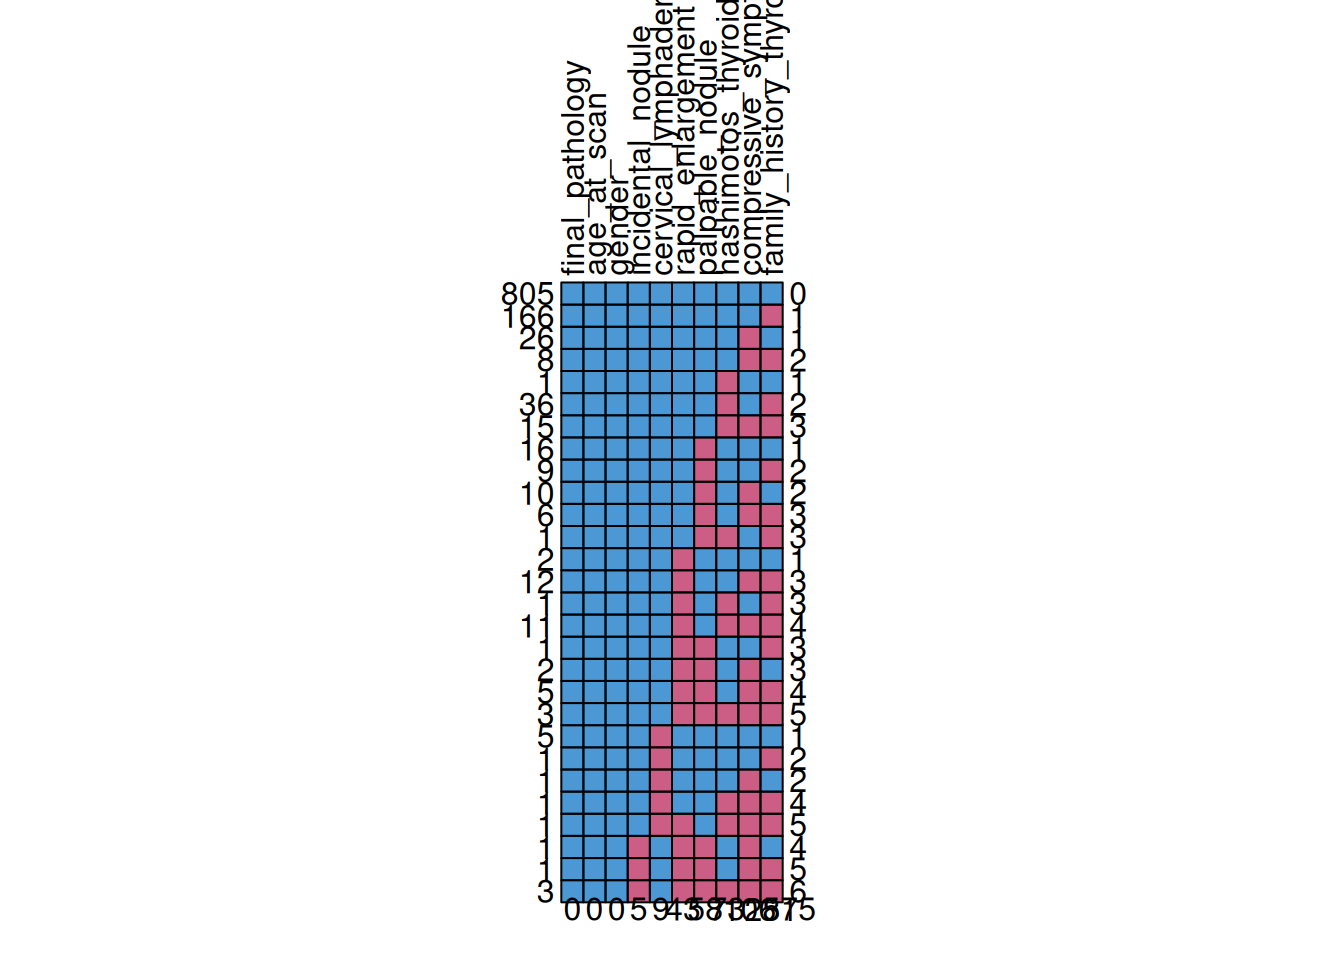
</figure>

## Biomarkers

``` r
mice_missing_biomarkers <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                tsh_value,
                albumin,
                lymphocytes,
                monocyte) |>
  mice::md.pattern(rotate.names = TRUE)
```

<figure id="fig-mice-vis-missing-biomarkers">
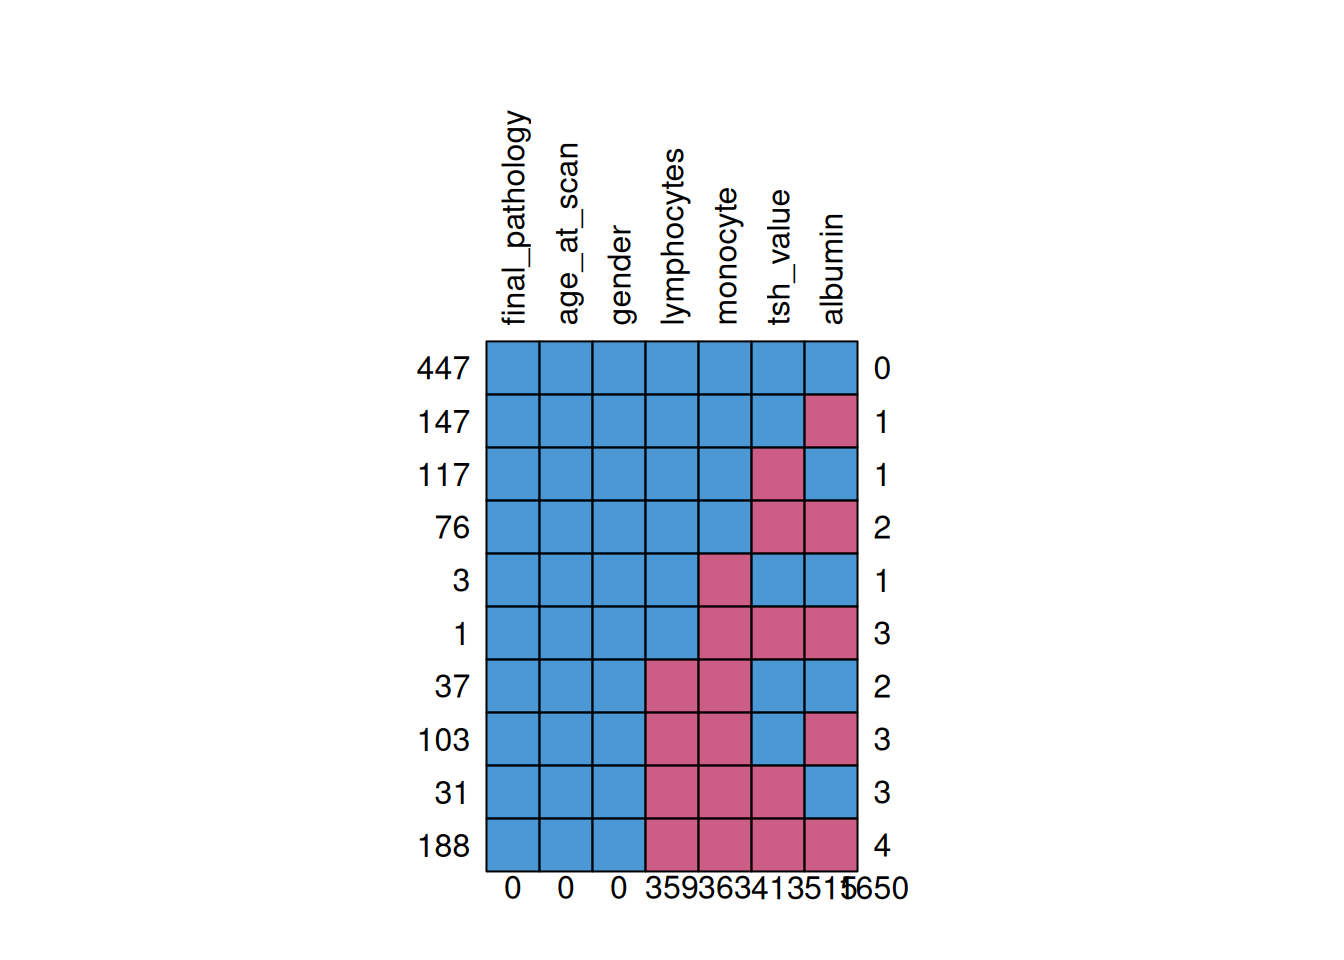
</figure>

## Ultrasound

``` r
mice_missing_ultrasound <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                bta_u_classification,
                thy_classification,
                size_nodule_mm,
                solitary_nodule) |>
  mice::md.pattern(rotate.names = TRUE)
```

<figure id="fig-mice-vis-missing-ultrasound">
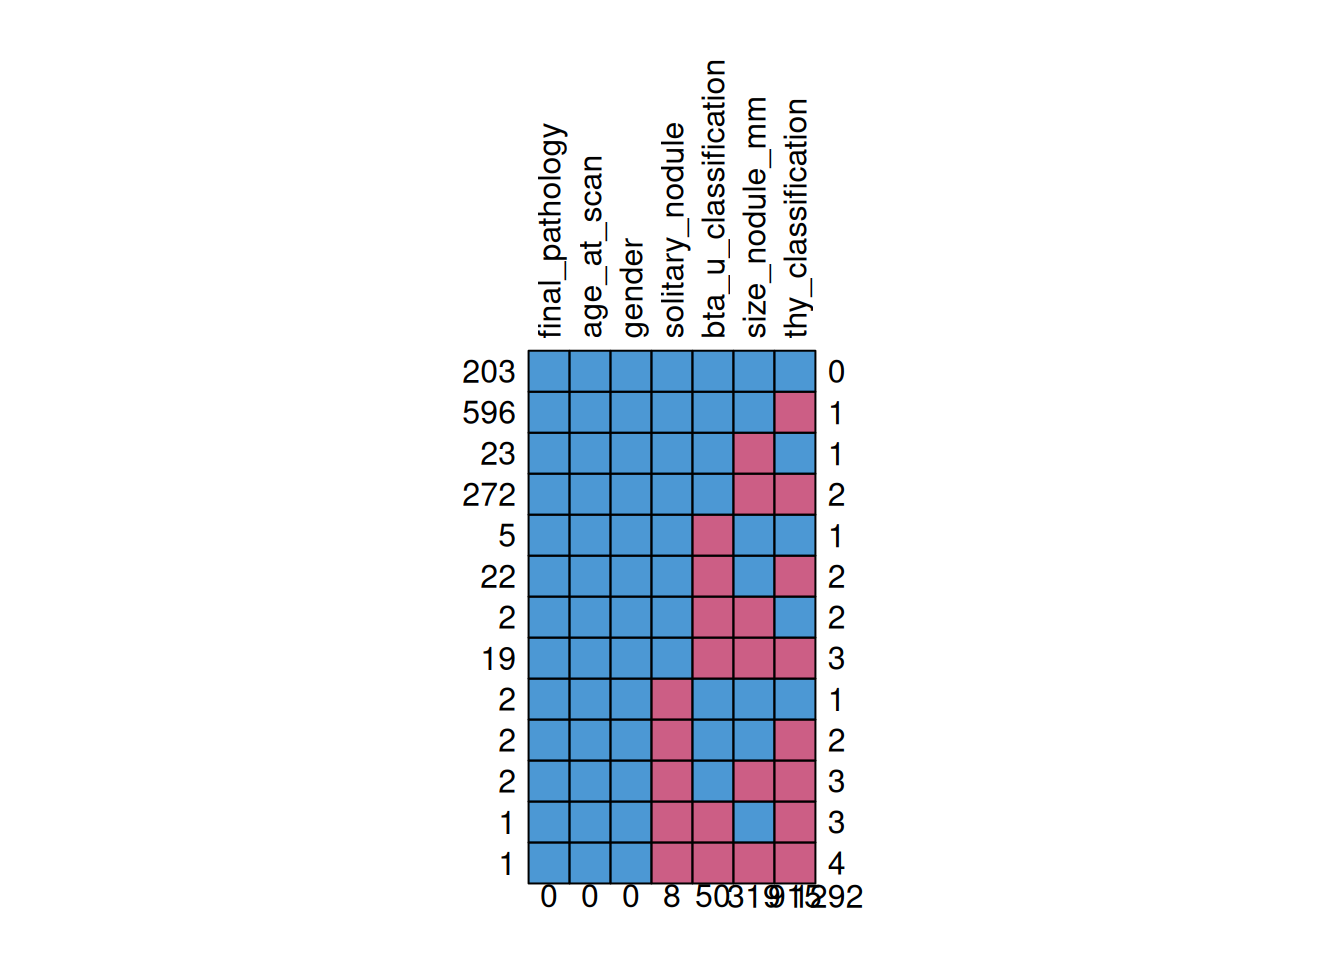
</figure>

## All

``` r
mice_missing_ultrasound <- df_complete |>
  dplyr::select(final_pathology,
                age_at_scan,
                gender,
                incidental_nodule,
                palpable_nodule,
                rapid_enlargement,
                compressive_symptoms,
                hashimotos_thyroiditis,
                family_history_thyroid_cancer,
                cervical_lymphadenopathy,
                tsh_value,
                albumin,
                lymphocytes,
                monocyte,
                bta_u_classification,
                thy_classification,
                size_nodule_mm,
                solitary_nodule) |>
  mice::md.pattern(rotate.names = TRUE)
```

<figure id="fig-mice-vis-missing-all">
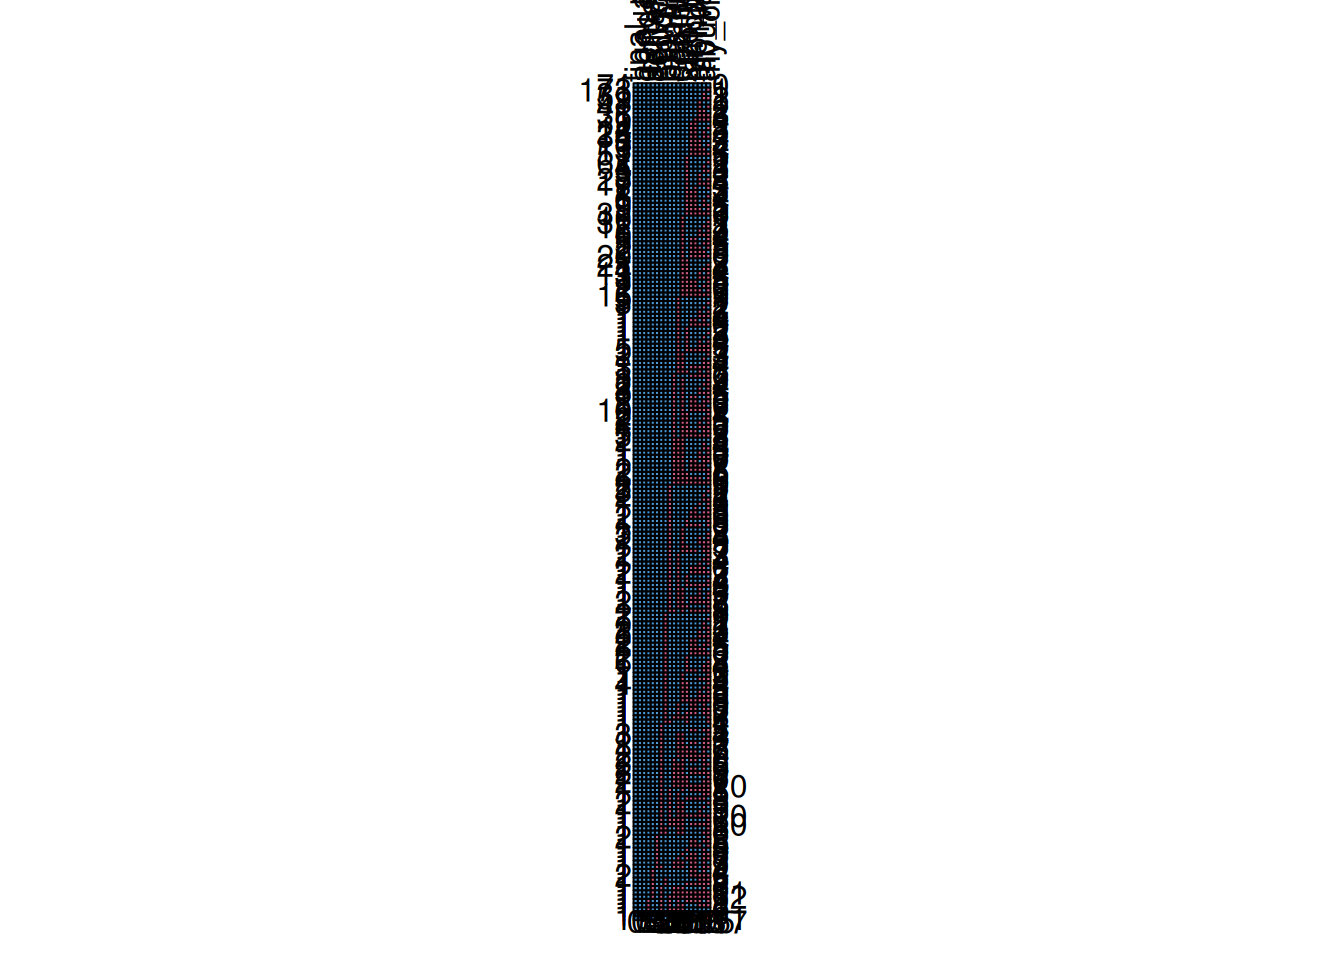
</figure>

#### 3.1.2 Imputation

The [MICE](https://amices.org/mice/) package@mice offers a number of different methods for imputing variables (see \[documentation\]\[mice_details\]) we have investigated Predictive Mean Matching (PMM), Classification and Regression Trees (CART) and Random Forests (RF). Four rounds of imputation using each method were made.

A comparison of distributions/proportions before and after imputation are presented below to allow assessment of the utility of each method.

In [ ]:
## Setup MICE mids for various methods
##

#' Impute missing data and plot the results using the mice package.
#'
#' This is a wrapper around the functionality of the \href{https://amices.org/mice}{mice} and
#' \href{https://amices.org/ggmice}{ggmice} packages for Multivariate Imputation by Chained Equations and visualisation
#' of the resulting imputed datasets. Users should refer to the documentation for details of the options available.
#'
#' The wrapper uses \code{\link[mice]{futuremice}} to perform imputation in parallel using the same number of cores as
#' the requested number of imputations. This speeds up the process but be wary if your computer has limited cores.
#'
#' @param df data.frame|tibble Data frame or tibble of original data.
#' @param imputations int Number of imputations to perform.
#' @param iterations int Number of iterations to perform for imputation.
#' @param method str Method of imputation to use, see the Details section of \code{\link[mice]{mice}}.
#' @param action str Action to take when running \code{\link[mice]{complete}}.
#' @param include bool Logical of whether to include the original dataset in the output.
#' @param seed int Seed for random number generation
#'
#'
impute_data <- function(df = df_complete,
                        outcome_var = "final_pathology",
                        imputations = 4,
                        iterations = 5,
                        method = "pmm",
                        action = "long",
                        include = TRUE,
                        continuous = c("albumin", "tsh_value", "lymphocytes", "monocyte", "size_nodule_mm"),
                        categorical = c("ethnicity",
                                        "incidental_nodule",
                                        "palpable_nodule",
                                        "rapid_enlargement",
                                        "compressive_symptoms",
                                        "hypertension",
                                        "vocal_cord_paresis",
                                        "graves_disease",
                                        "hashimotos_thyroiditis",
                                        "family_history_thyroid_cancer",
                                        "exposure_radiation",
                                        "bta_u_classification",
                                        "solitary_nodule",
                                        "cervical_lymphadenopathy",
                                        "thy_classification"),
                        seed = 123) {
    results <- list()
    ## Setup imputation
    results$mids <- df |>
        dplyr::select(-{{ outcome_var }}) |>
        mice::futuremice(m = imputations,
                         method = method,
                         n.core = imputations,
                         iterations = iterations,
                         parallelseed  = seed)
    ## Generate output dataset,
    results$imputed <- results$mids |>
        mice::complete(action = "long", include = include)
    ## Convert the .imp variable which indicates the imputation set to factor with original dataset labelled as such
    results$imputed <- results$imputed |>
         dplyr::mutate(.imp = factor(.imp,
                                     levels = seq(0, imputations, 1),
                                     labels = c("Original", as.character(seq(1, imputations, 1)))))
    ## We need to bind the outcome variable to each imputed dataset so they can be used in analyses
    outcome = df[[outcome_var]]
    n = imputations
    while(n > 0) {
        outcome = append(outcome, df[[outcome_var]])
        n <- n - 1
    }
    results$imputed <- cbind(results$imputed, outcome)
    colnames(results$imputed) <- stringr::str_replace(colnames(results$imputed), "outcome", outcome_var)
    ## Plot traces of the imputation over iteration
    results$trace <- ggmice::plot_trace(results$mid)
    ## Plot correlation between variables
    results$corr <- ggmice::plot_corr(df,
                                      label = TRUE,
                                      square = TRUE,
                                      rotate = TRUE,
                                      diagonal = FALSE)
    ## Plot histograms of continuous variables
    results$histogram <- list()
    for (var in continuous) {
        results$histogram[[var]] <- ggmice::ggmice(results$mids,
                                                   ggplot2::aes(x = .data[[var]],
                                                                group = .imp)) +
                                        ggplot2::geom_density()
    }
    ## Scatterplots and bar charts for categorical variables
    results$scatter <- list()
    results$bar_chart <- list()
    for (var in categorical) {
        results$scatter[[var]] <- ggmice::ggmice(results$mids,
                                                 ggplot2::aes(x = .imp,
                                                              y = .data[[var]])) +
                                        ggplot2::geom_jitter()
        results$bar_chart[[var]] <- ggmice::ggmice(results$mids,
                                                   ggplot2::aes(x = .data[[var]],
                                                                fill = .imp)) +
                                        ggplot2::geom_bar(position = "dodge")
    }
    results
}

## Impute using three different methods using the above impute_data() wrapper
mice_pmm <- impute_data(method = "pmm",
                        imputations = 5,
                        iterations = 5,
                        seed = 684613)

The convergence of the imputation methods are shown in figues **?@fig-mice-convergence-pmm**, **?@fig-mice-convergence-cart**, and **?@fig-mice-convergence-rf**.

## Albumin

``` r
cowplot::plot_grid(mice_pmm$histogram$albumin,
                   mice_cart$histogram$albumin,
                   mice_rf$histogram$albumin,
                   nrow = 1,
                   ncol = 3)
```

<figure id="fig-mice-imputation-albumin">
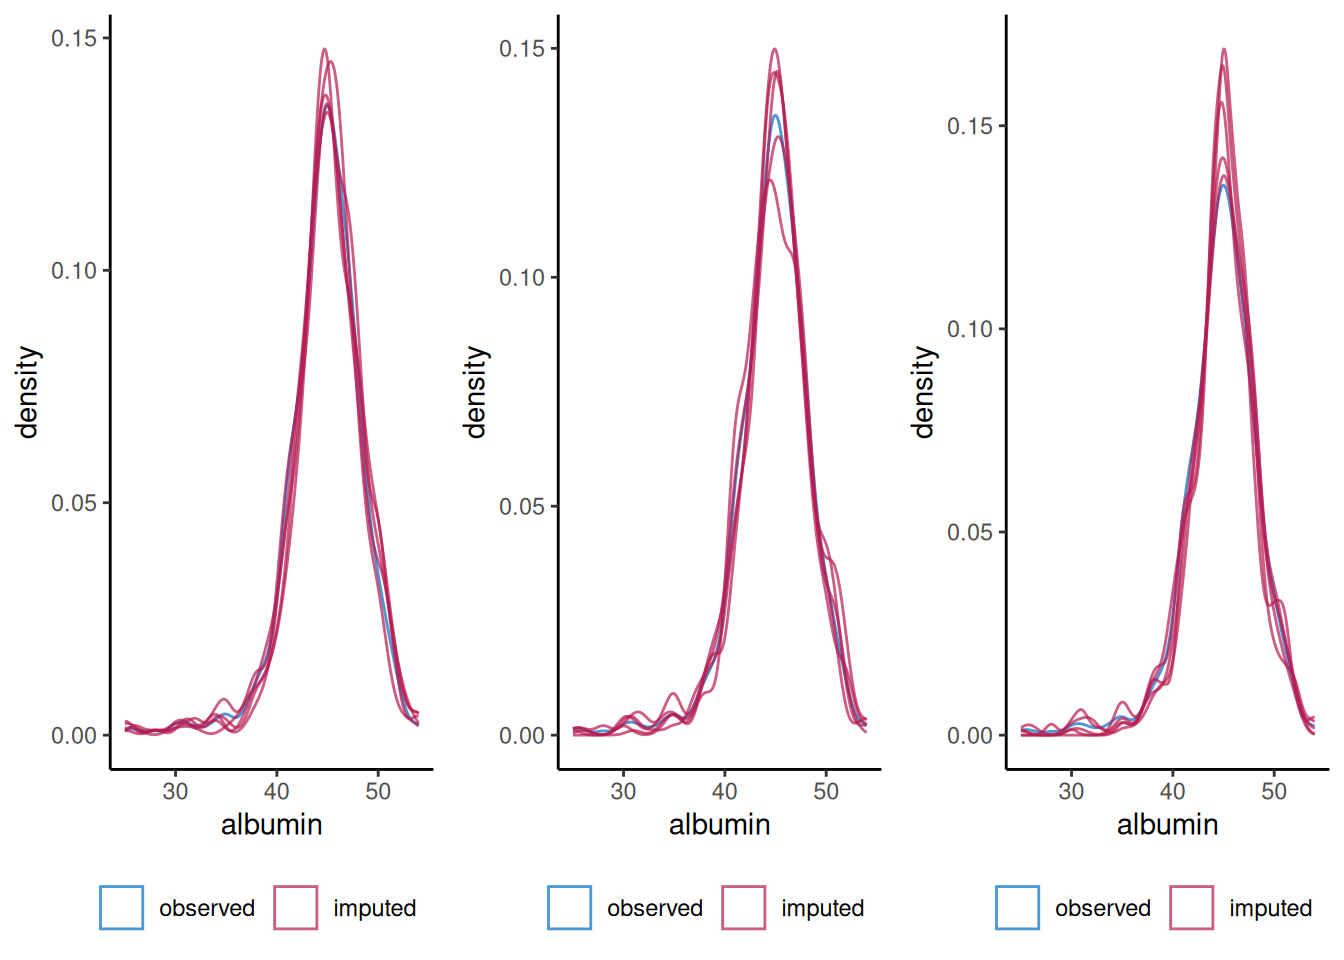
</figure>

## Monocyte

``` r
cowplot::plot_grid(mice_pmm$histogram$monocyte,
                   mice_cart$histogram$monocyte,
                   mice_rf$histogram$monocyte,
                   nrow = 1,
                   ncol = 3)
```

<figure id="fig-mice-imputation-monocyte">
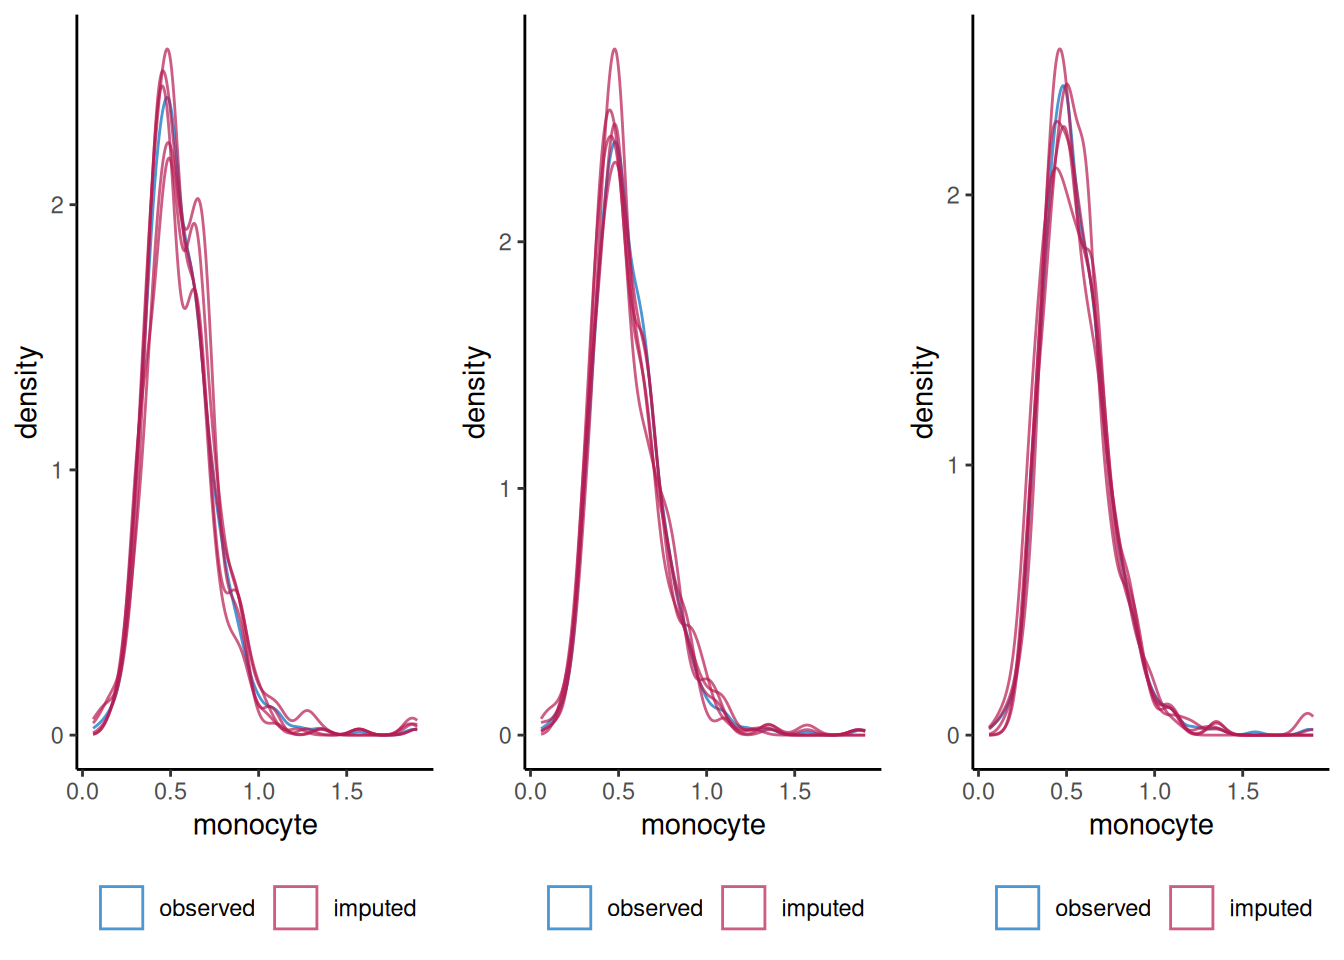
</figure>

## Lymphocytes

``` r
cowplot::plot_grid(mice_pmm$histogram$lymphocytes,
                   mice_cart$histogram$lymphocytes,
                   mice_rf$histogram$lymphocytes,
                   nrow = 1,
                   ncol = 3)
```

<figure id="fig-mice-imputation-lymphocytes">
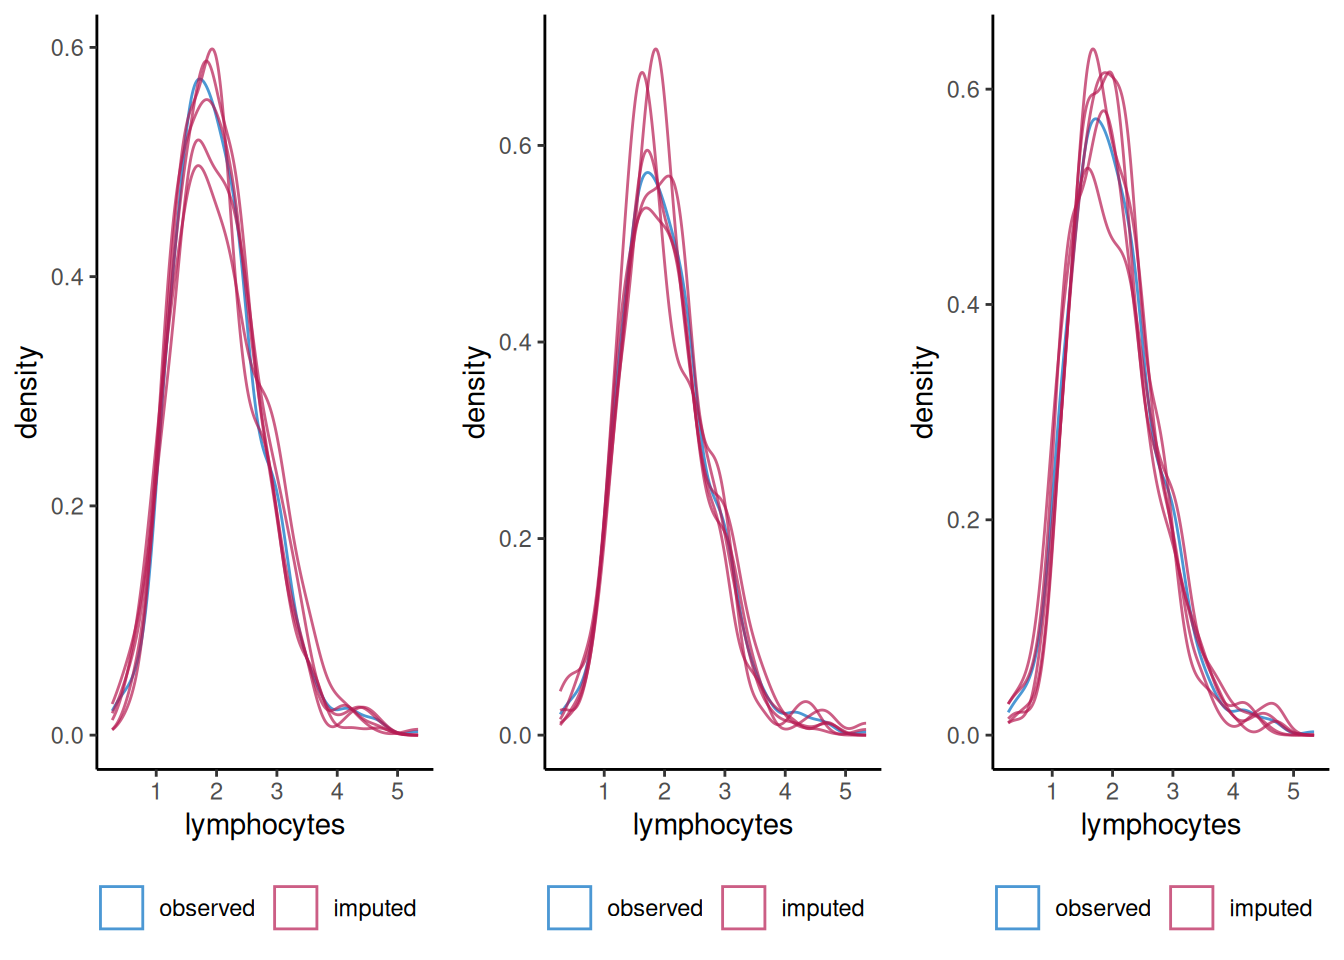
</figure>

## TSH Value

``` r
cowplot::plot_grid(mice_pmm$histogram$tsh_value,
                   mice_cart$histogram$tsh_value,
                   mice_rf$histogram$tsh_value,
                   nrow = 1,
                   ncol = 3)
```

<figure id="fig-mice-imputation-tsh-value">
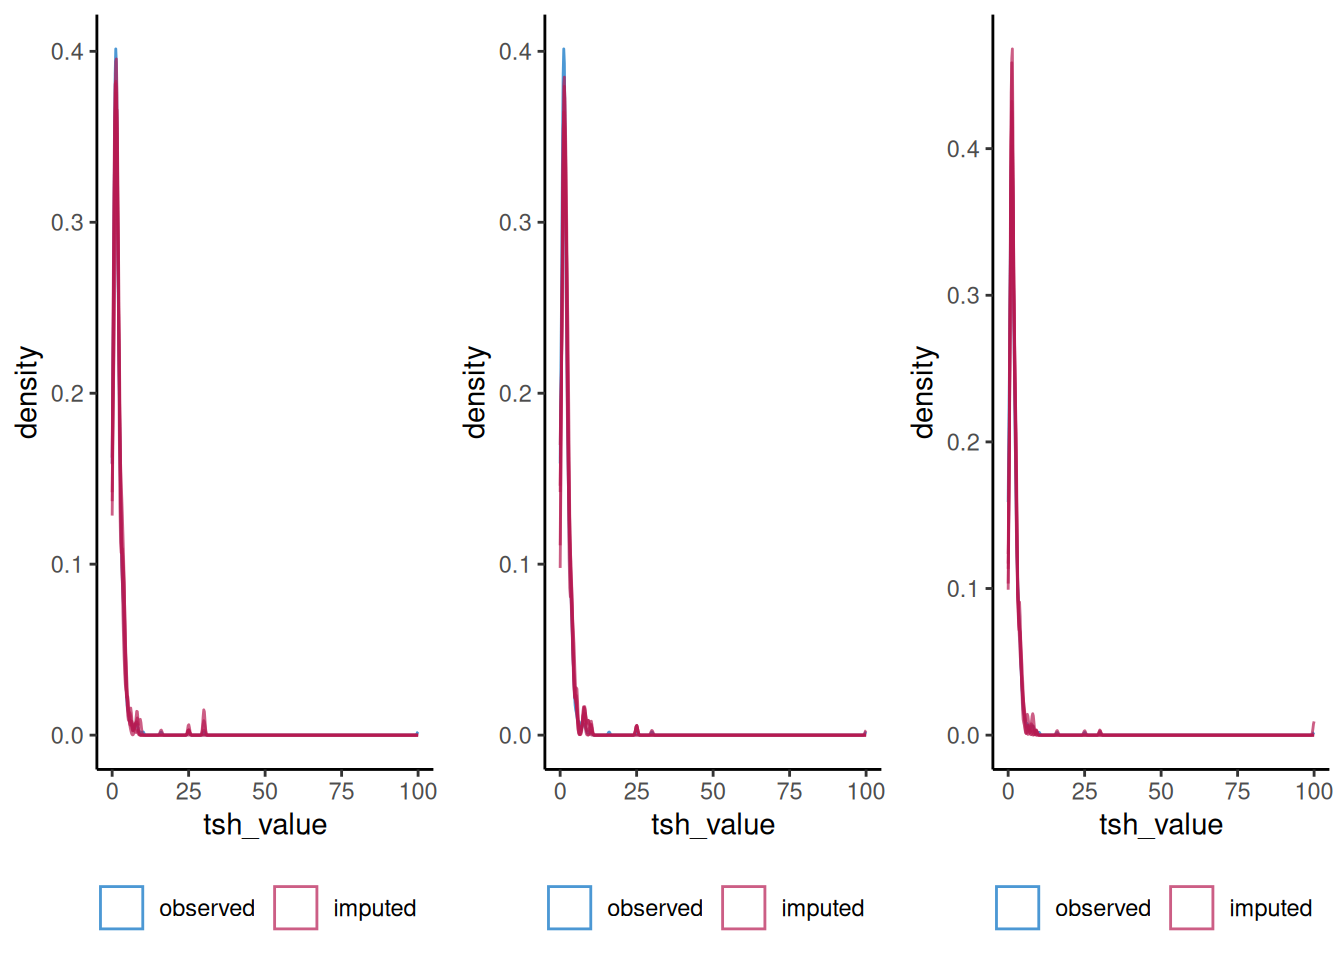
</figure>

## Nodule Size

``` r
cowplot::plot_grid(mice_pmm$histogram$size_nodule_mm,
                   mice_cart$histogram$size_nodule_mm,
                   mice_rf$histogram$size_nodule_mm,
                   nrow = 1,
                   ncol = 3)
```

<figure id="fig-mice-imputation-size-nodule-mm">
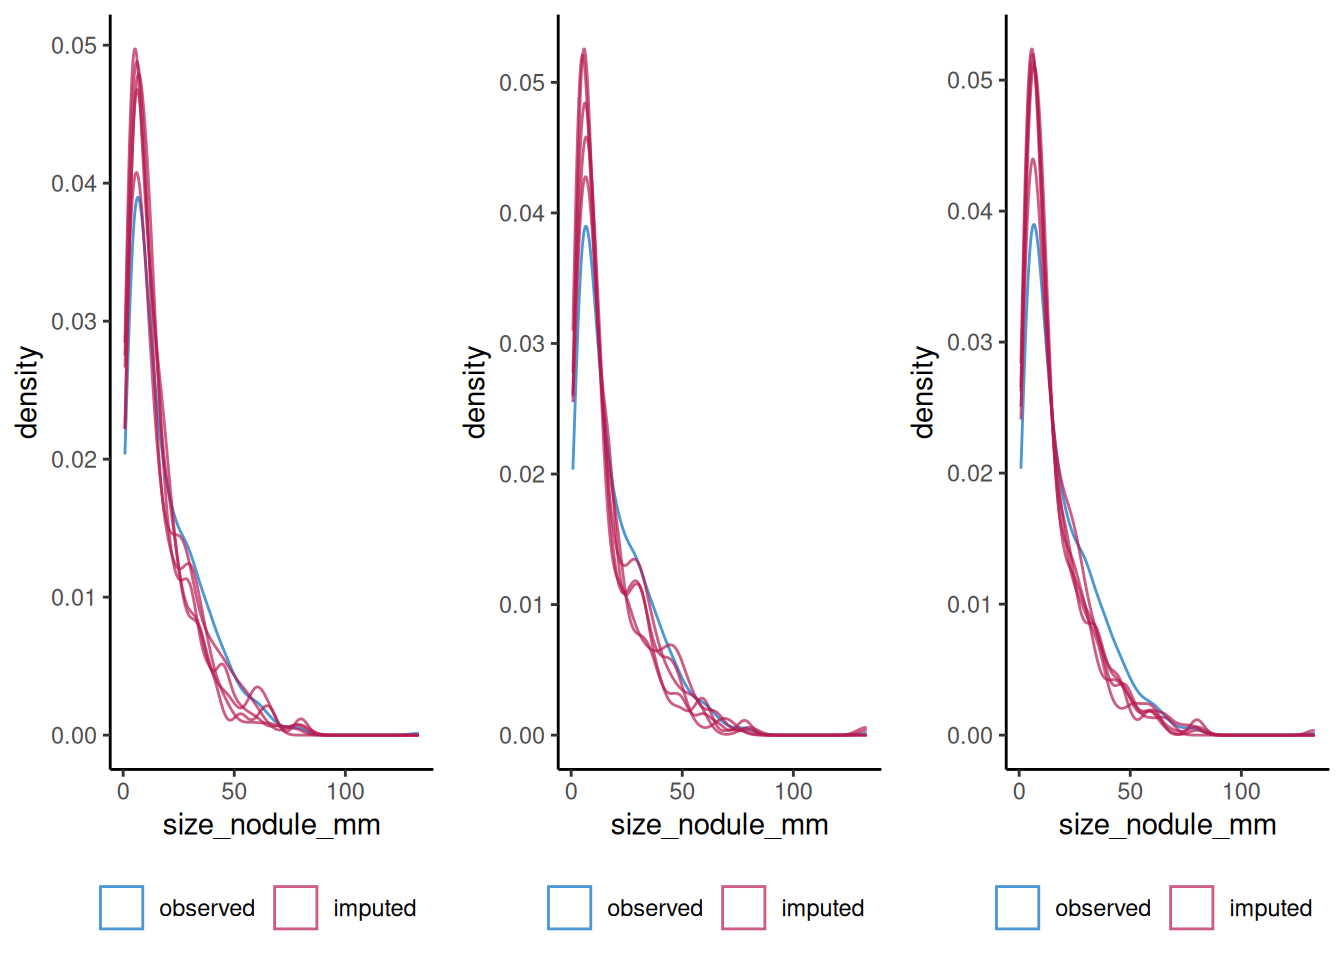
</figure>

**TODO** - Extract the legends from individual plots and add them to the end of each row, see the [cowplot shared legends article](https://wilkelab.org/cowplot/articles/shared_legends.html) for pointers on how to do this. Should ideally also get the `fill` colours to align with those used by `ggmice`.

## Incidental Nodule

``` r
cowplot::plot_grid(mice_pmm$scatter$incidental_nodule + theme(legend.position = "None"),
                   mice_cart$scatter$incidental_nodule + theme(legend.position = "None"),
                   mice_rf$scatter$incidental_nodule + theme(legend.position = "None"),
                   mice_pmm$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   mice_cart$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   mice_rf$bar_chart$incidental_nodule + theme(legend.position = "None"),
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-incidental-nodule">
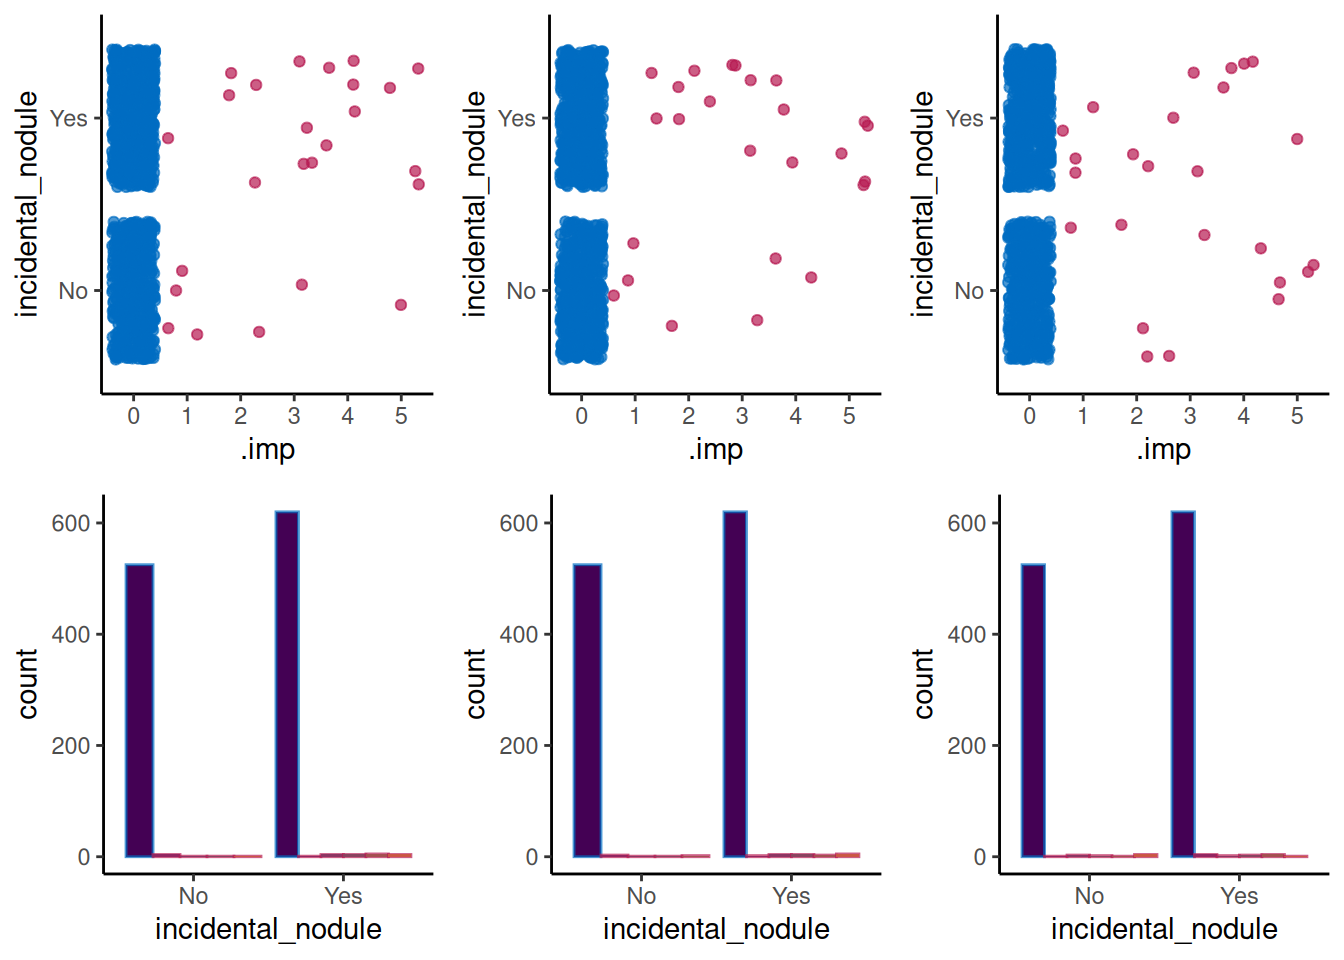
</figure>

## Palpable Nodule

``` r
cowplot::plot_grid(mice_pmm$scatter$palpable_nodule,
                   mice_cart$scatter$palpable_nodule,
                   mice_rf$scatter$palpable_nodule,
                   mice_pmm$bar_chart$palpable_nodule,
                   mice_cart$bar_chart$palpable_nodule,
                   mice_rf$bar_chart$palpable_nodule,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-palpable-nodule">
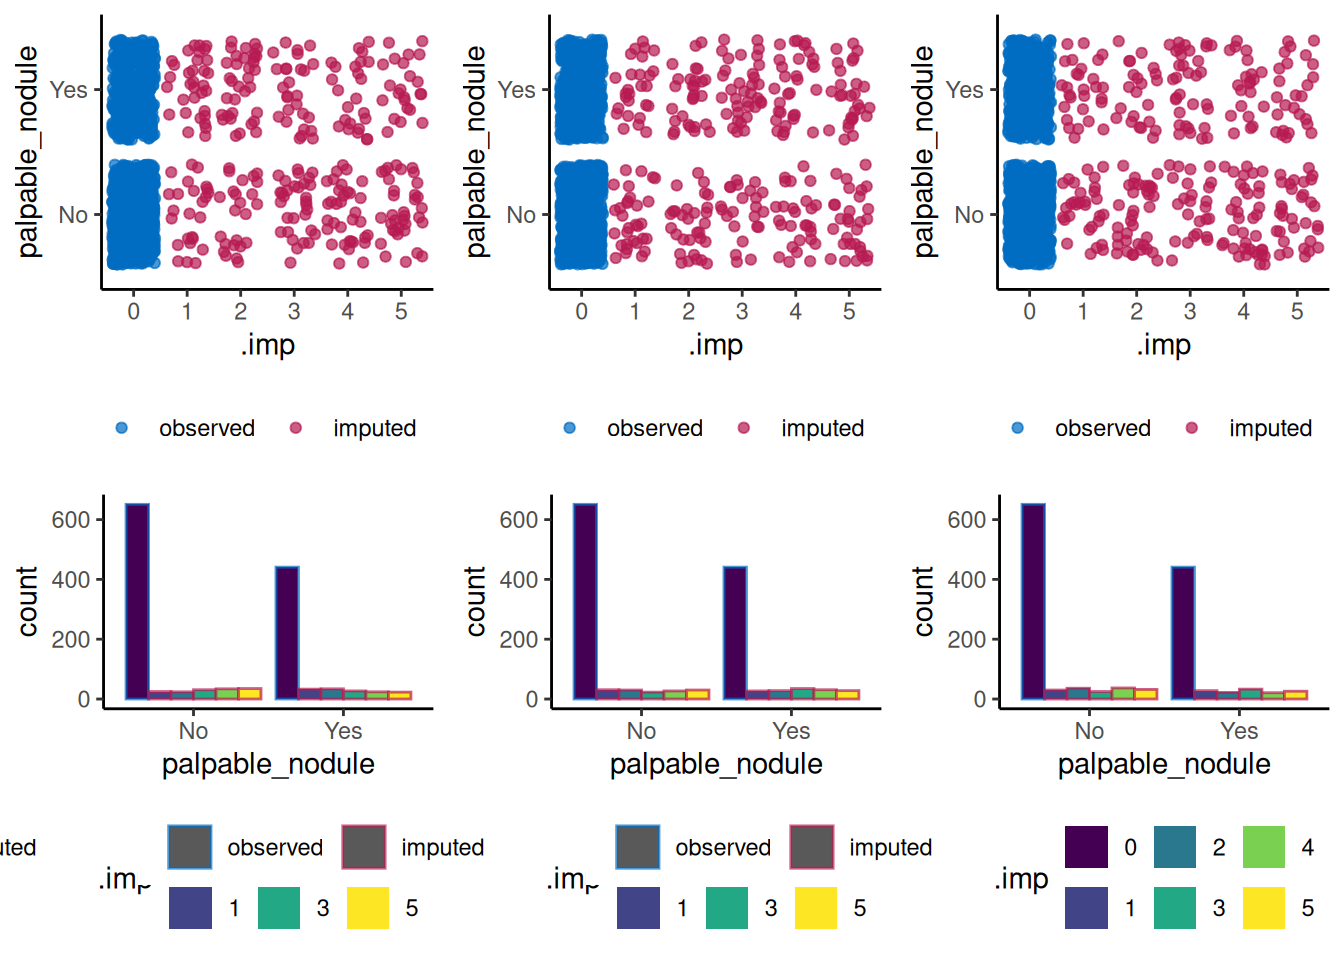
</figure>

## Rapid Enlargement

``` r
cowplot::plot_grid(mice_pmm$scatter$rapid_enlargement,
                   mice_cart$scatter$rapid_enlargement,
                   mice_rf$scatter$rapid_enlargement,
                   mice_pmm$bar_chart$rapid_enlargement,
                   mice_cart$bar_chart$rapid_enlargement,
                   mice_rf$bar_chart$rapid_enlargement,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-rapid-enlargement">
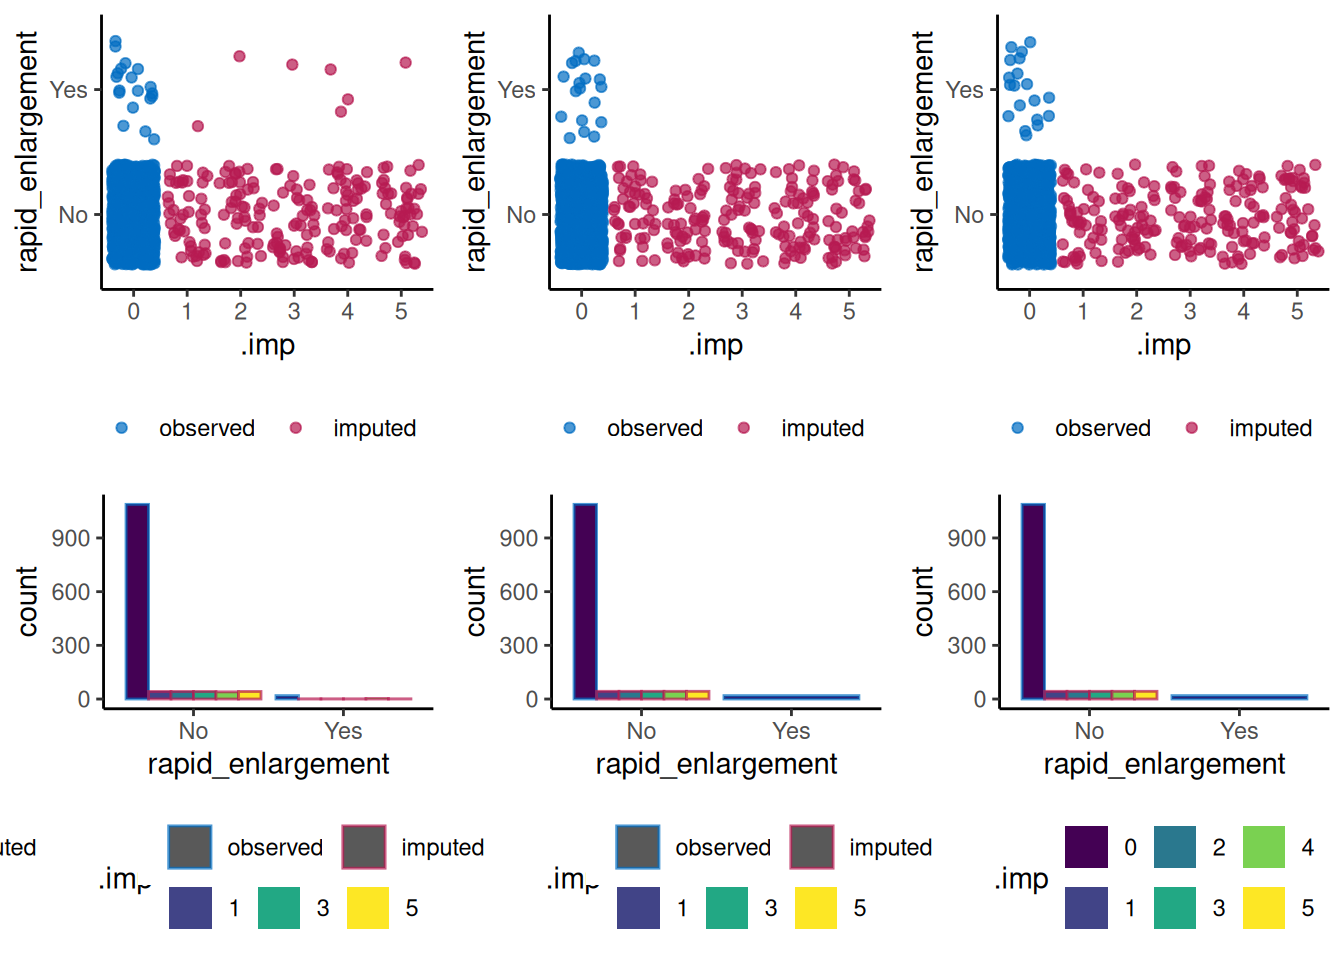
</figure>

## Compressive Symptoms

``` r
cowplot::plot_grid(mice_pmm$scatter$compressive_symptoms,
                   mice_cart$scatter$compressive_symptoms,
                   mice_rf$scatter$compressive_symptoms,
                   mice_pmm$bar_chart$compressive_symptoms,
                   mice_cart$bar_chart$compressive_symptoms,
                   mice_rf$bar_chart$compressive_symptoms,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-compressive-symptoms">
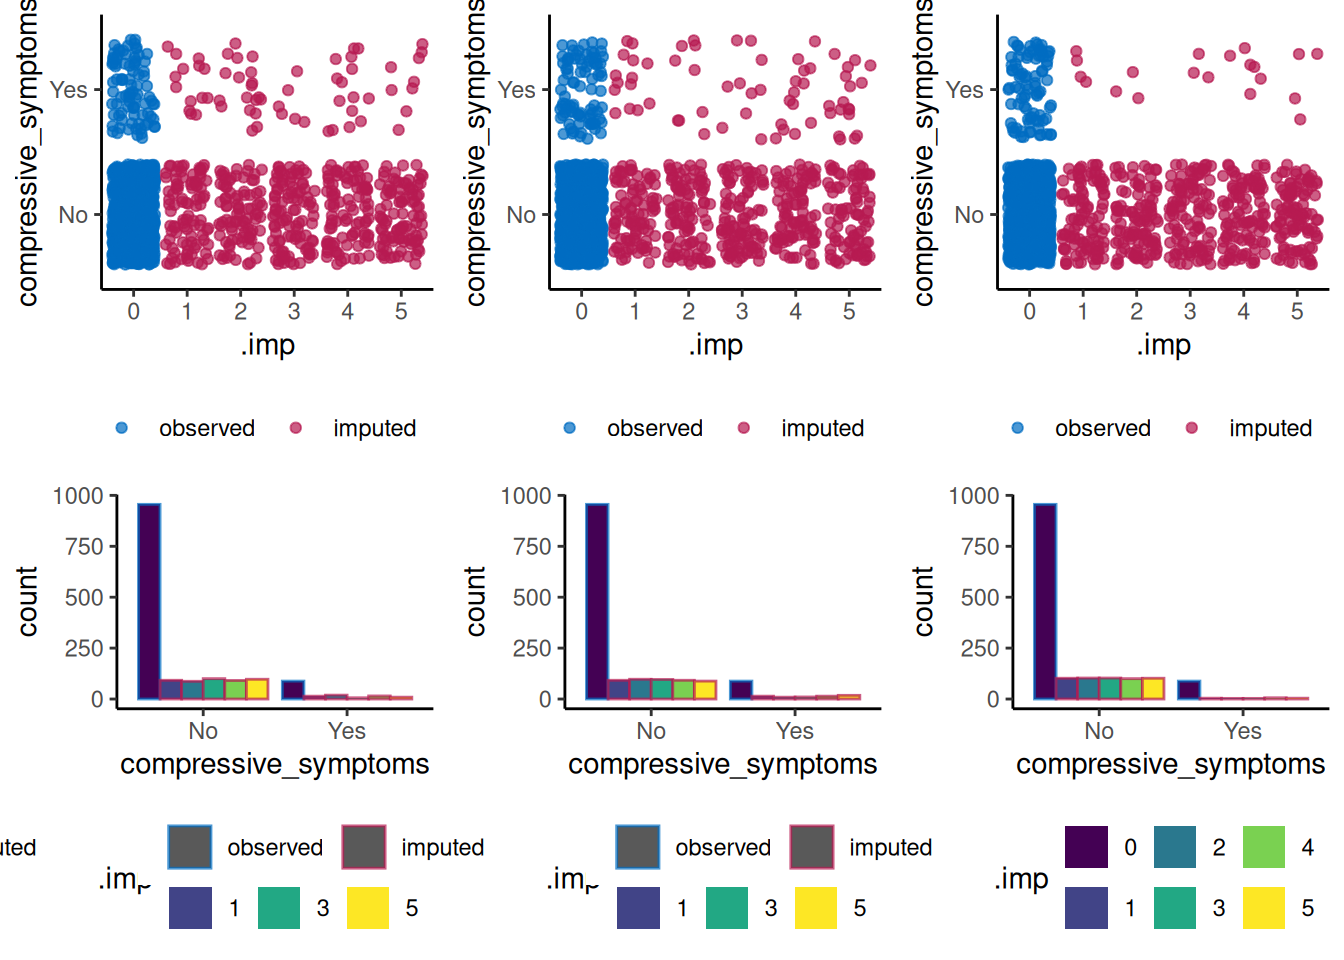
</figure>

## Hypertension

``` r
cowplot::plot_grid(mice_pmm$scatter$hypertension,
                   mice_cart$scatter$hypertension,
                   mice_rf$scatter$hypertension,
                   mice_pmm$bar_chart$hypertension,
                   mice_cart$bar_chart$hypertension,
                   mice_rf$bar_chart$hypertension,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-hypertension">
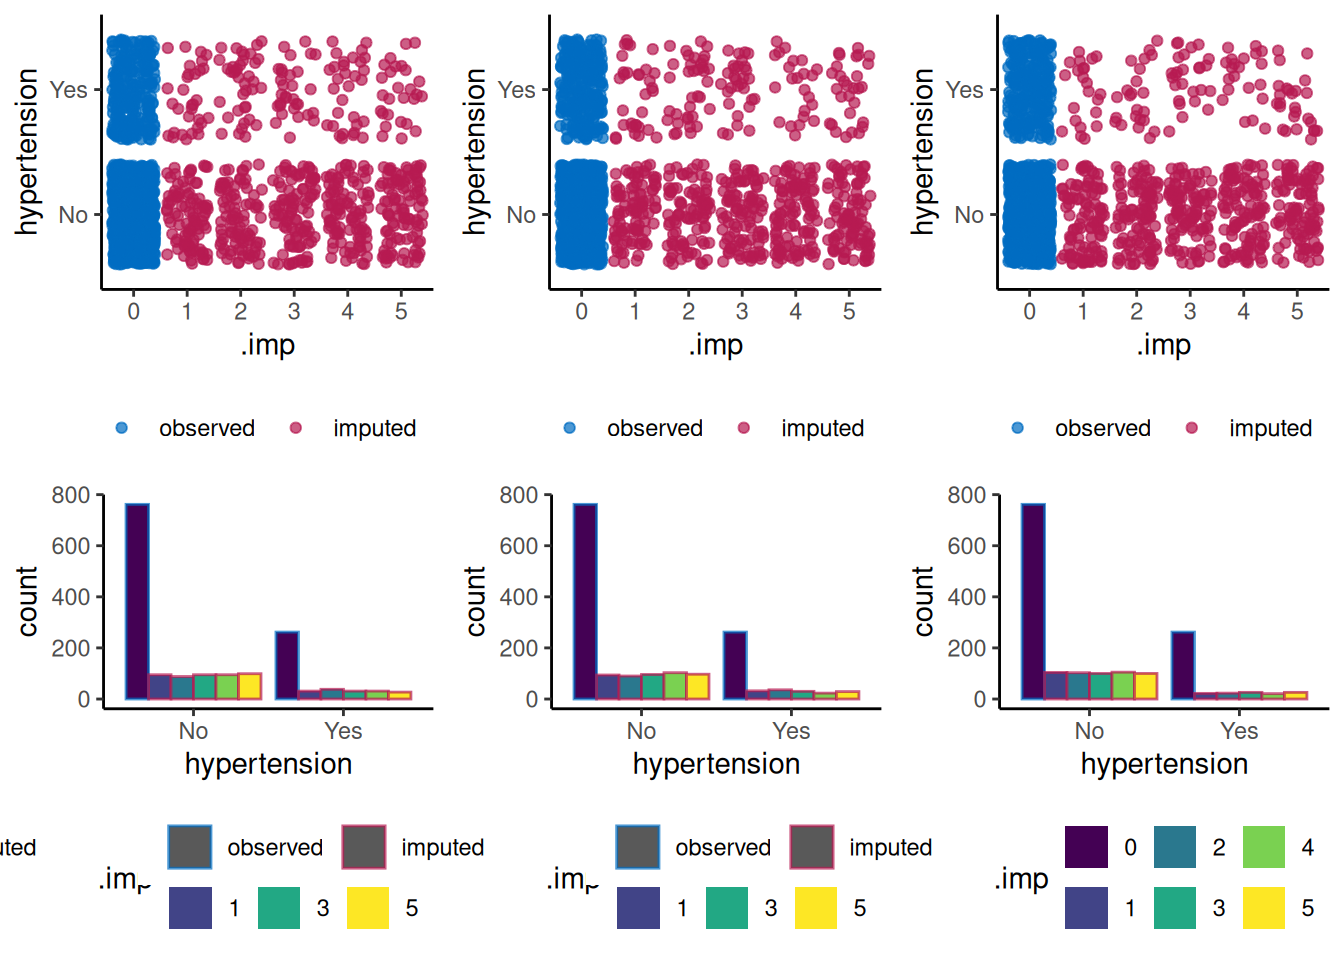
</figure>

## Vocal Cord Paresis

``` r
cowplot::plot_grid(mice_pmm$scatter$vocal_cord_paresis,
                   mice_cart$scatter$vocal_cord_paresis,
                   mice_rf$scatter$vocal_cord_paresis,
                   mice_pmm$bar_chart$vocal_cord_paresis,
                   mice_cart$bar_chart$vocal_cord_paresis,
                   mice_rf$bar_chart$vocal_cord_paresis,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-vocal-cord-paresis">
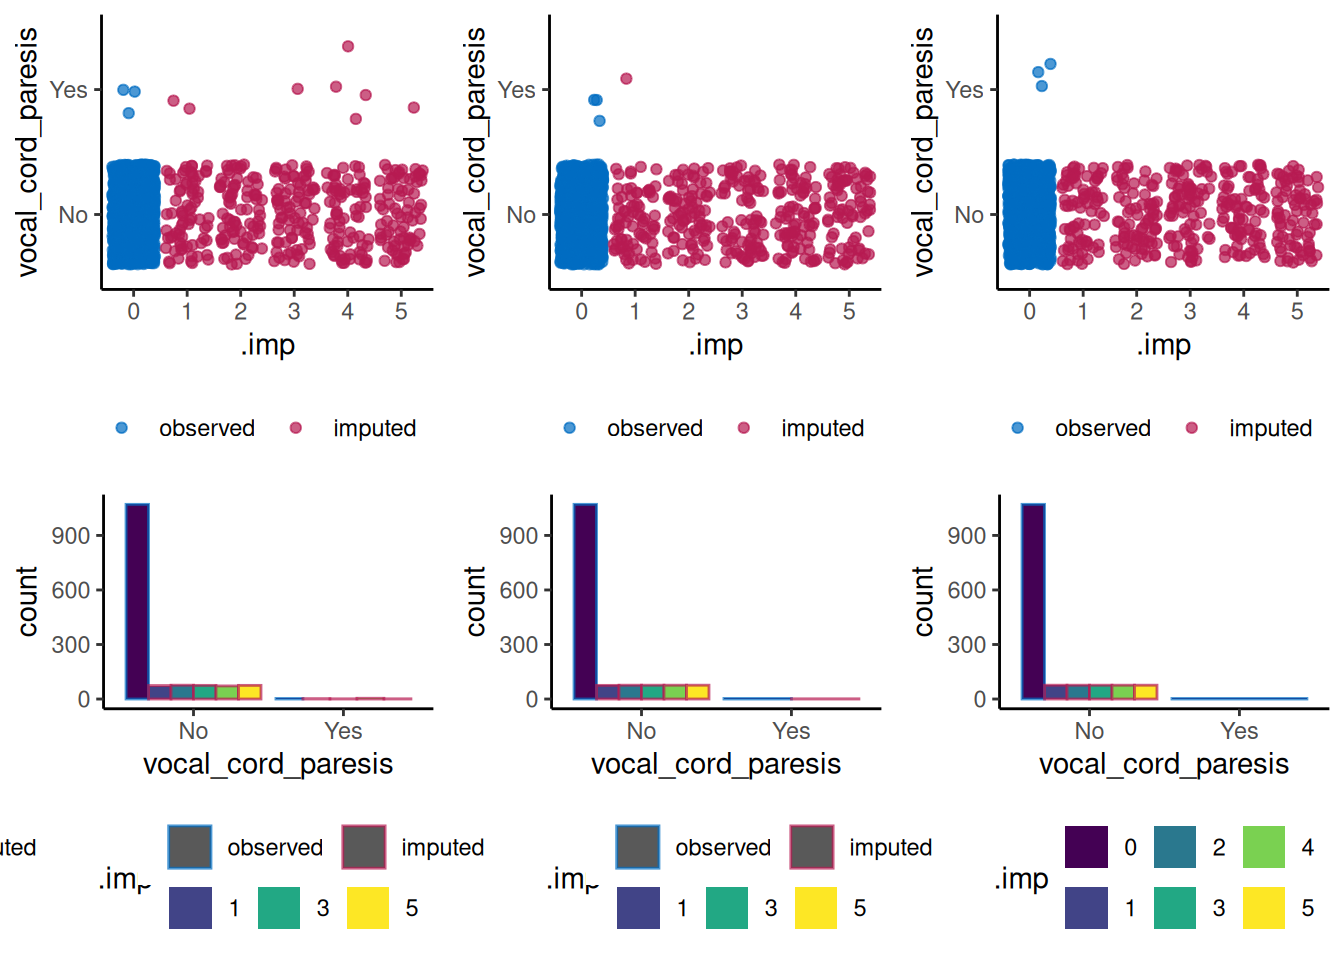
</figure>

## Graves Disease

``` r
cowplot::plot_grid(mice_pmm$scatter$graves_disease,
                   mice_cart$scatter$graves_disease,
                   mice_rf$scatter$graves_disease,
                   mice_pmm$bar_chart$graves_disease,
                   mice_cart$bar_chart$graves_disease,
                   mice_rf$bar_chart$graves_disease,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-graves-disease">
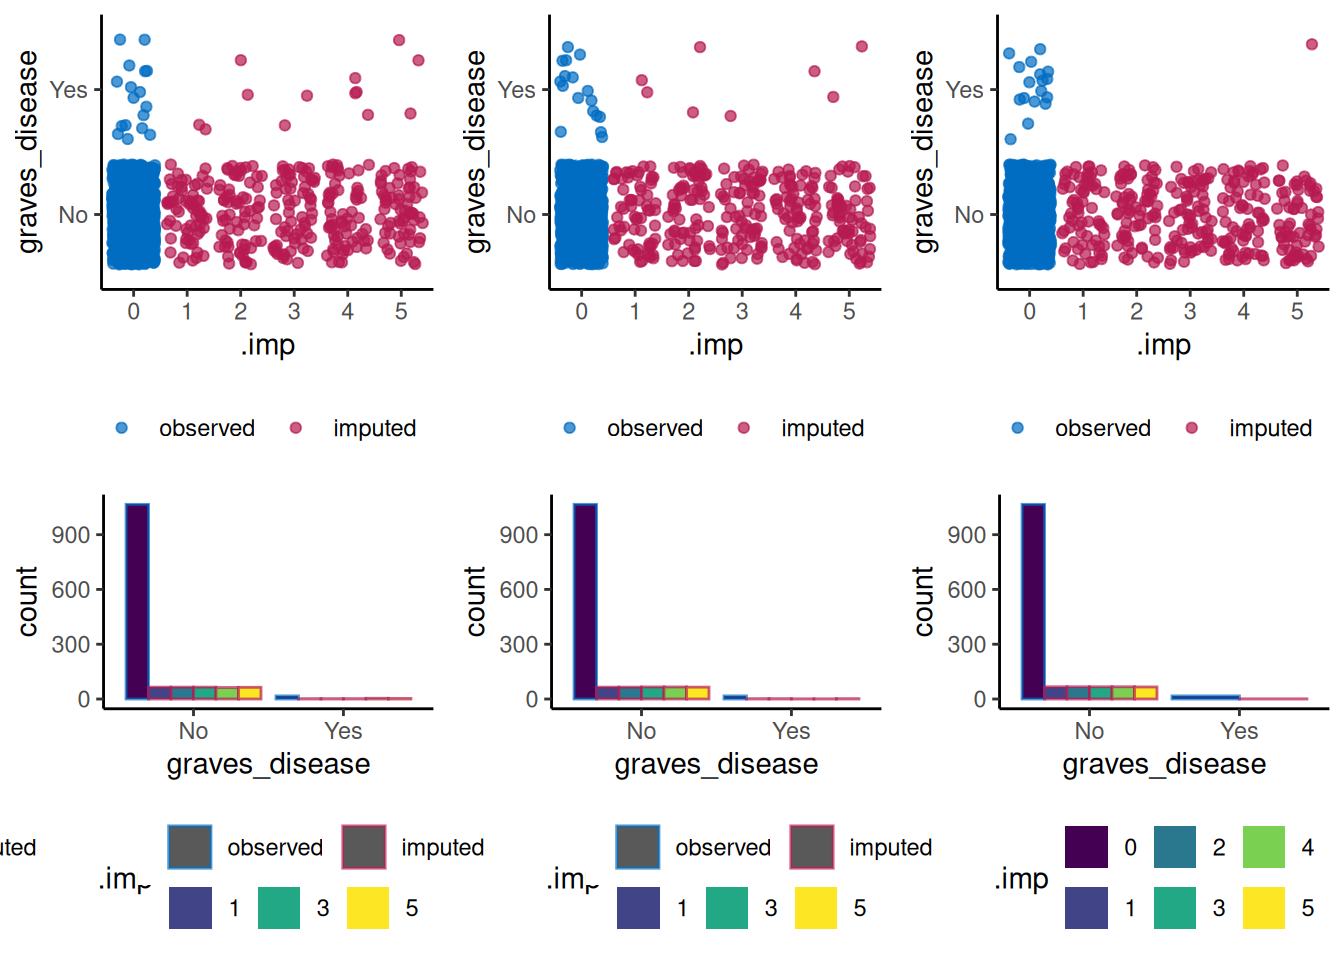
</figure>

## Hashimotos Thyroiditis

``` r
cowplot::plot_grid(mice_pmm$scatter$hashimotos_thyroiditis,
                   mice_cart$scatter$hashimotos_thyroiditis,
                   mice_rf$scatter$hashimotos_thyroiditis,
                   mice_pmm$bar_chart$hashimotos_thyroiditis,
                   mice_cart$bar_chart$hashimotos_thyroiditis,
                   mice_rf$bar_chart$hashimotos_thyroiditis,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-hashimotos-thyroiditis">
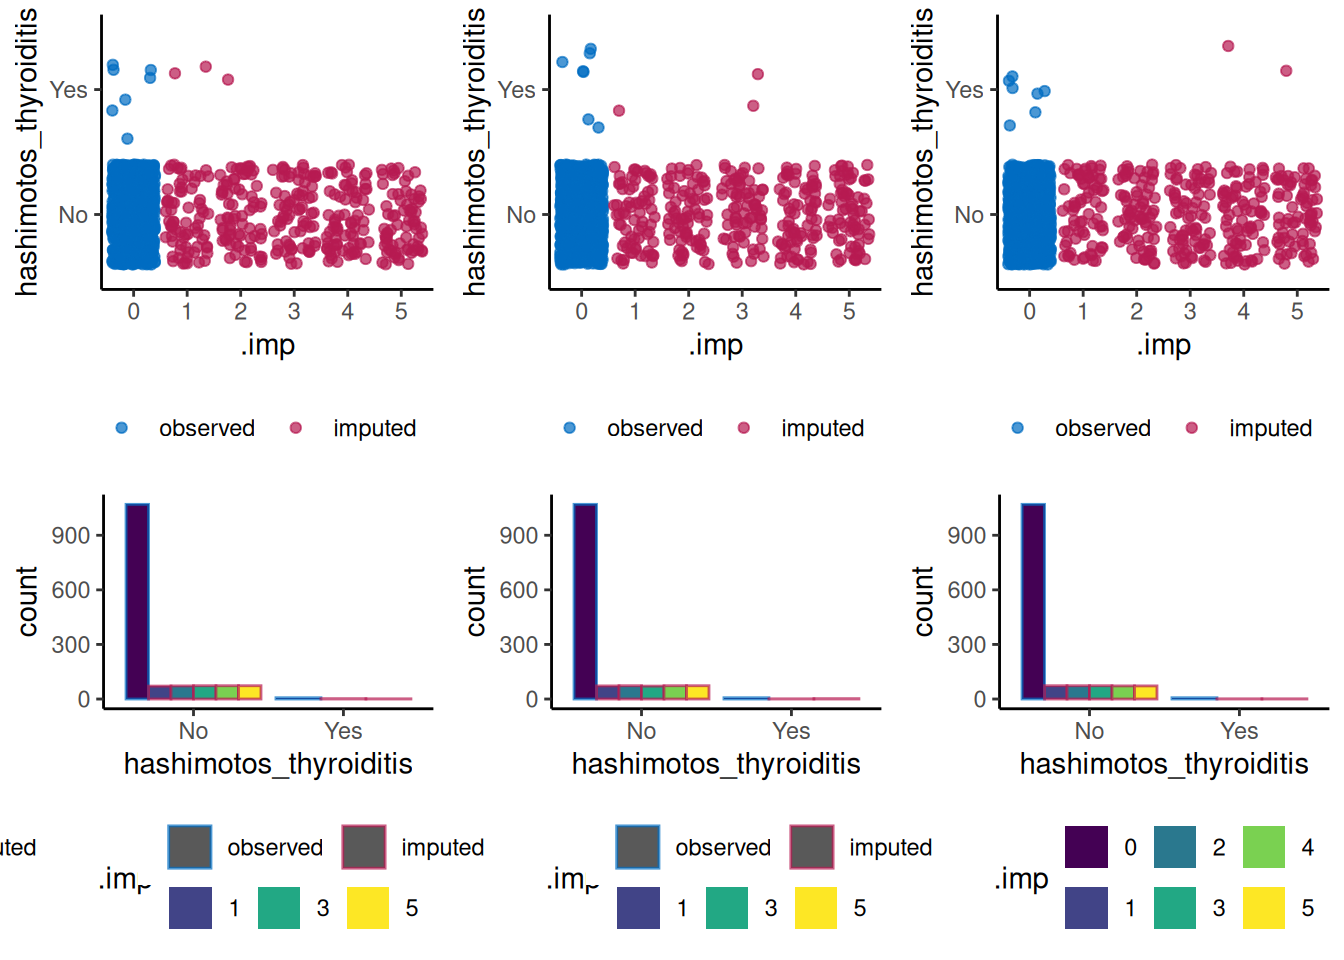
</figure>

## Family History

``` r
cowplot::plot_grid(mice_pmm$scatter$family_history,
                   mice_cart$scatter$family_history,
                   mice_rf$scatter$family_history,
                   mice_pmm$bar_chart$family_history,
                   mice_cart$bar_chart$family_history,
                   mice_rf$bar_chart$family_history,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-family-history-thyroid-cancer">
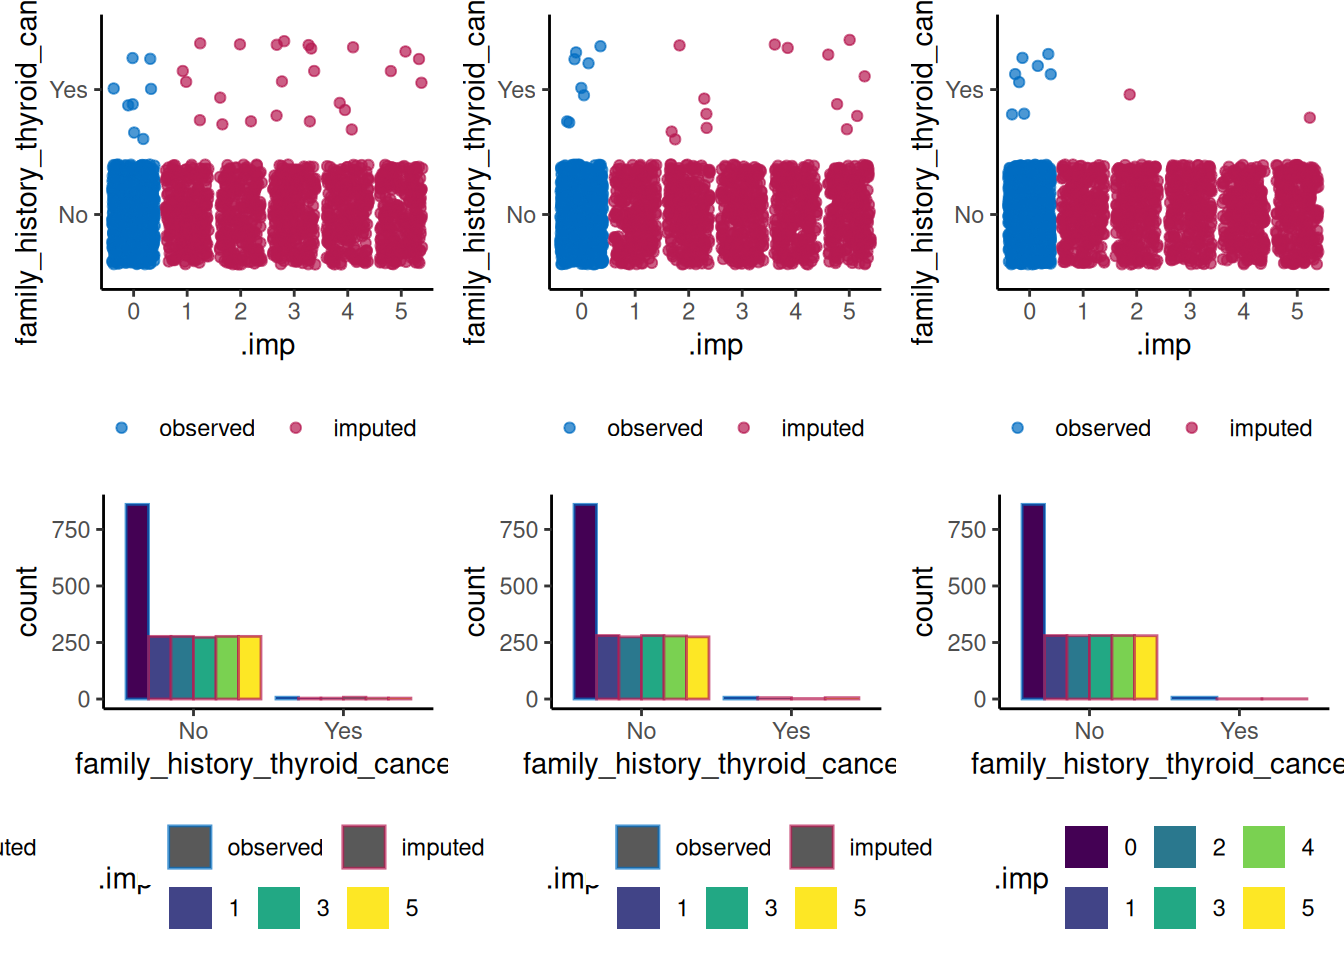
</figure>

## Exposure Radiation

``` r
cowplot::plot_grid(mice_pmm$scatter$exposure_radiation,
                   mice_cart$scatter$exposure_radiation,
                   mice_rf$scatter$exposure_radiation,
                   mice_pmm$bar_chart$exposure_radiation,
                   mice_cart$bar_chart$exposure_radiation,
                   mice_rf$bar_chart$exposure_radiation,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-exposure-radiation">
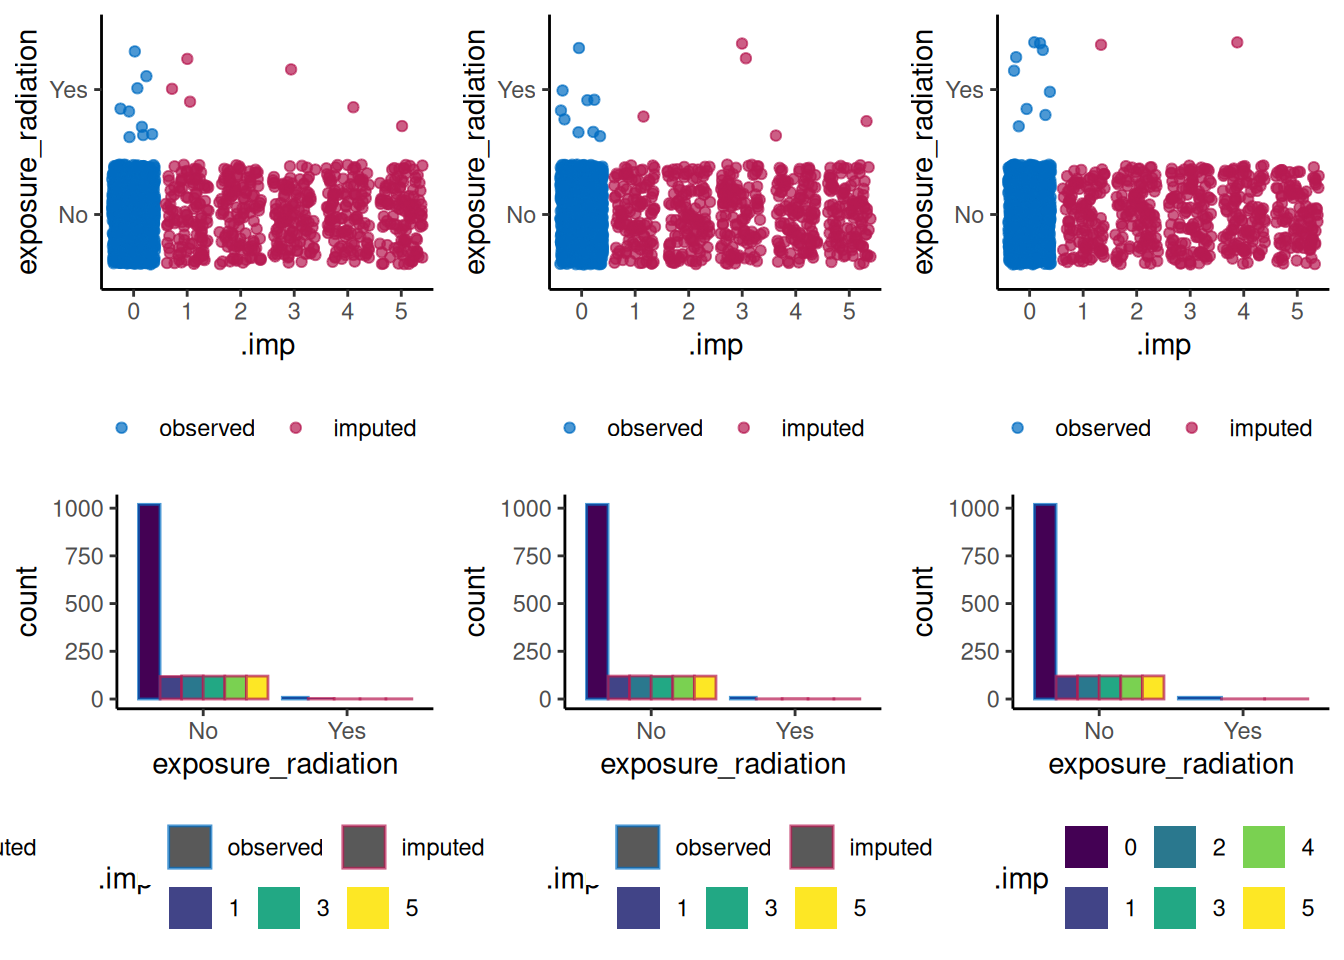
</figure>

## Solitary Nodule

``` r
cowplot::plot_grid(mice_pmm$scatter$solitary_nodule,
                   mice_cart$scatter$solitary_nodule,
                   mice_rf$scatter$solitary_nodule,
                   mice_pmm$bar_chart$solitary_nodule,
                   mice_cart$bar_chart$solitary_nodule,
                   mice_rf$bar_chart$solitary_nodule,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-solitary-nodule">
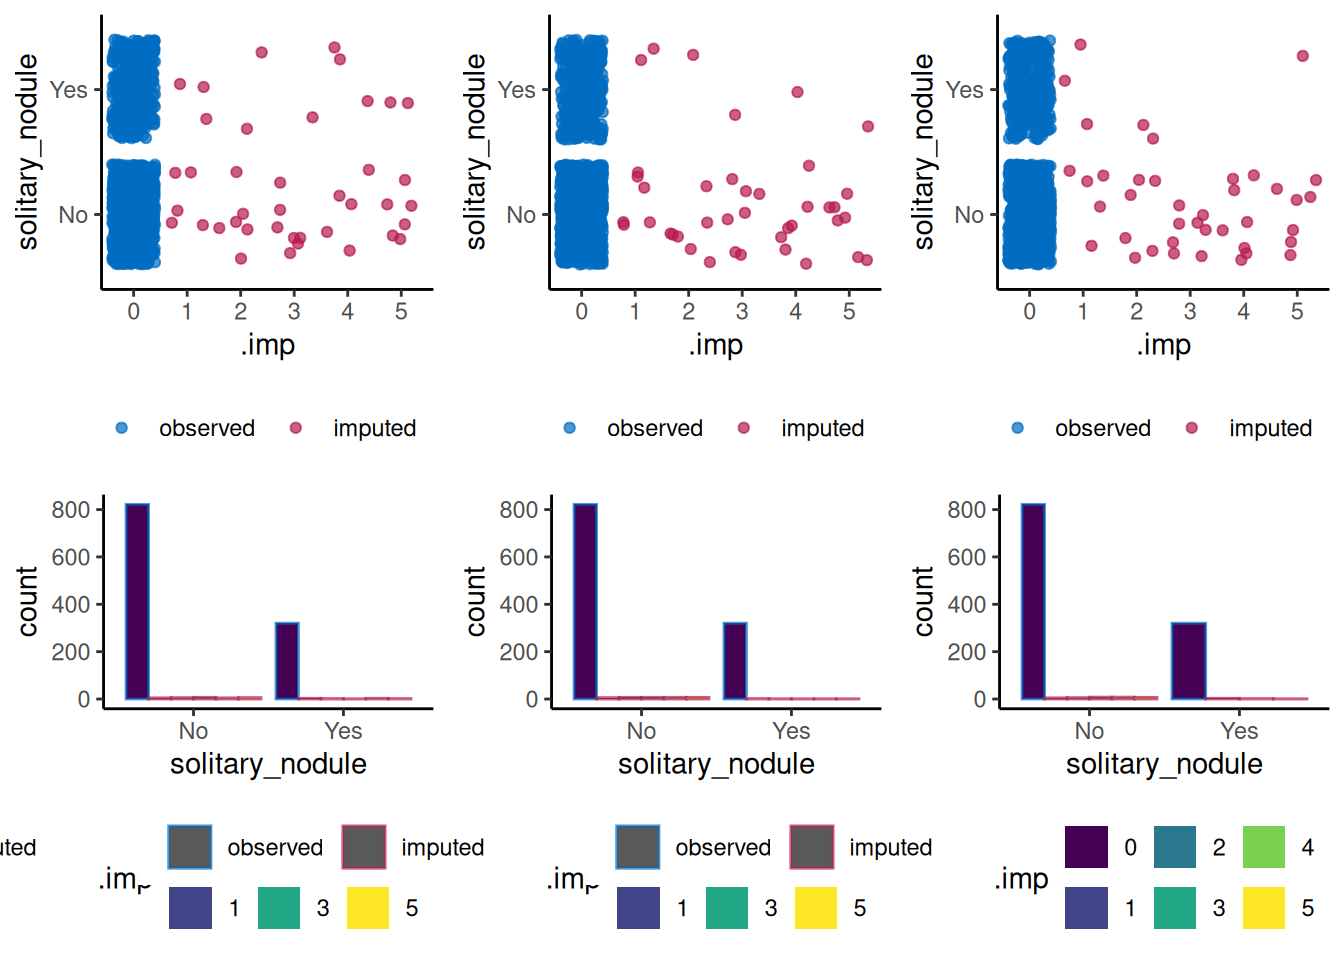
</figure>

## BTA U-Classification

``` r
cowplot::plot_grid(mice_pmm$scatter$bta_u_classification,
                   mice_cart$scatter$bta_u_classification,
                   mice_rf$scatter$bta_u_classification,
                   mice_pmm$bar_chart$bta_u_classification,
                   mice_cart$bar_chart$bta_u_classification,
                   mice_rf$bar_chart$bta_u_classification,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-bta-u-classification">
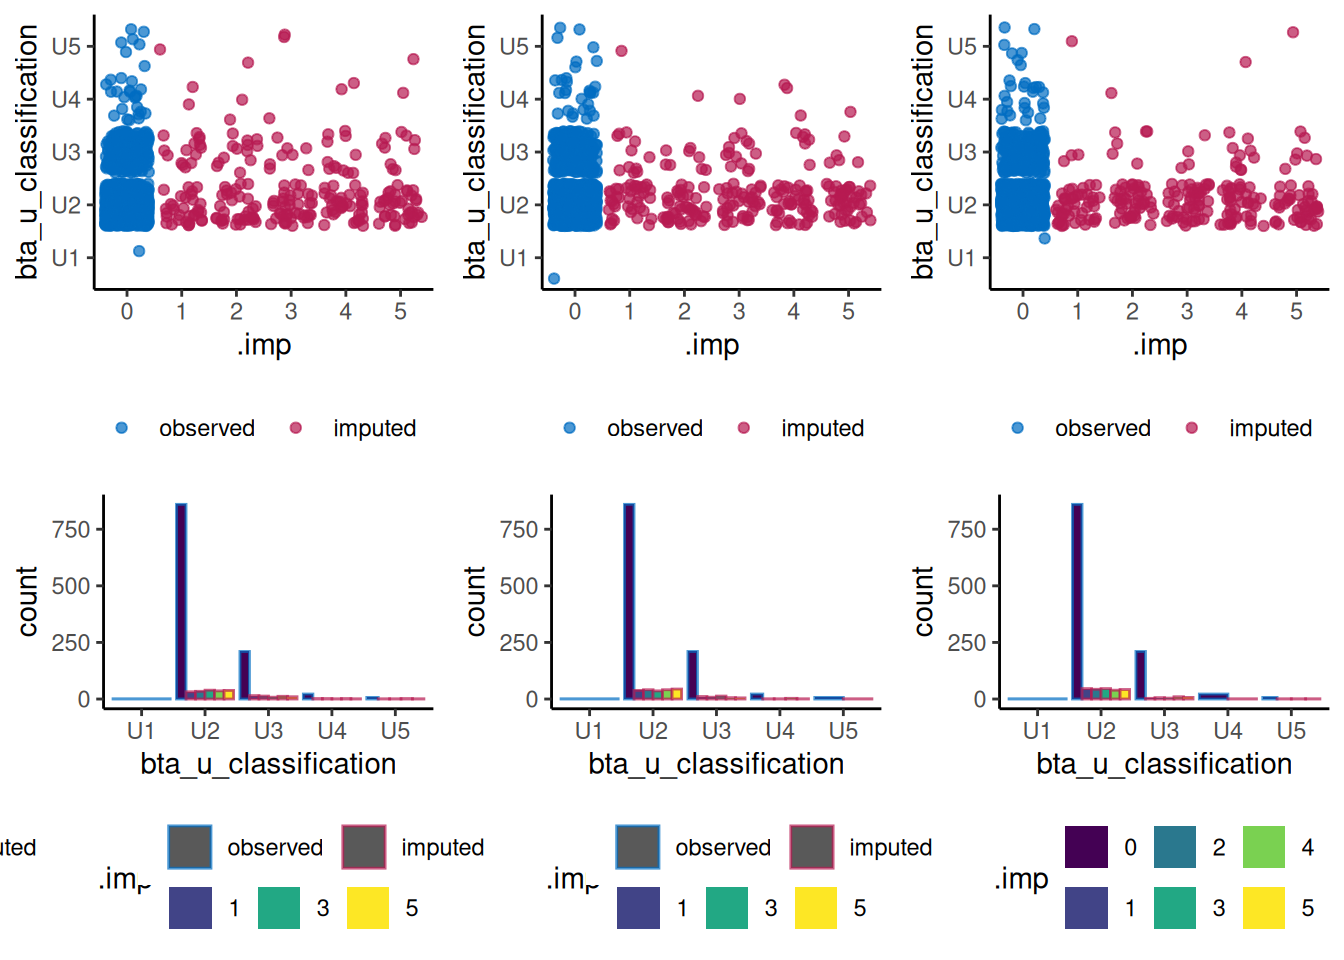
</figure>

## Cervical Lymphadenopathy

``` r
cowplot::plot_grid(mice_pmm$scatter$cervical_lymphadenopathy,
                   mice_cart$scatter$cervical_lymphadenopathy,
                   mice_rf$scatter$cervical_lymphadenopathy,
                   mice_pmm$bar_chart$cervical_lymphadenopathy,
                   mice_cart$bar_chart$cervical_lymphadenopathy,
                   mice_rf$bar_chart$cervical_lymphadenopathy,
                   nrow = 2,
                   ncol = 3)
```

<figure id="fig-mice-imputation-rapid-cervical-lymphadenopathy">
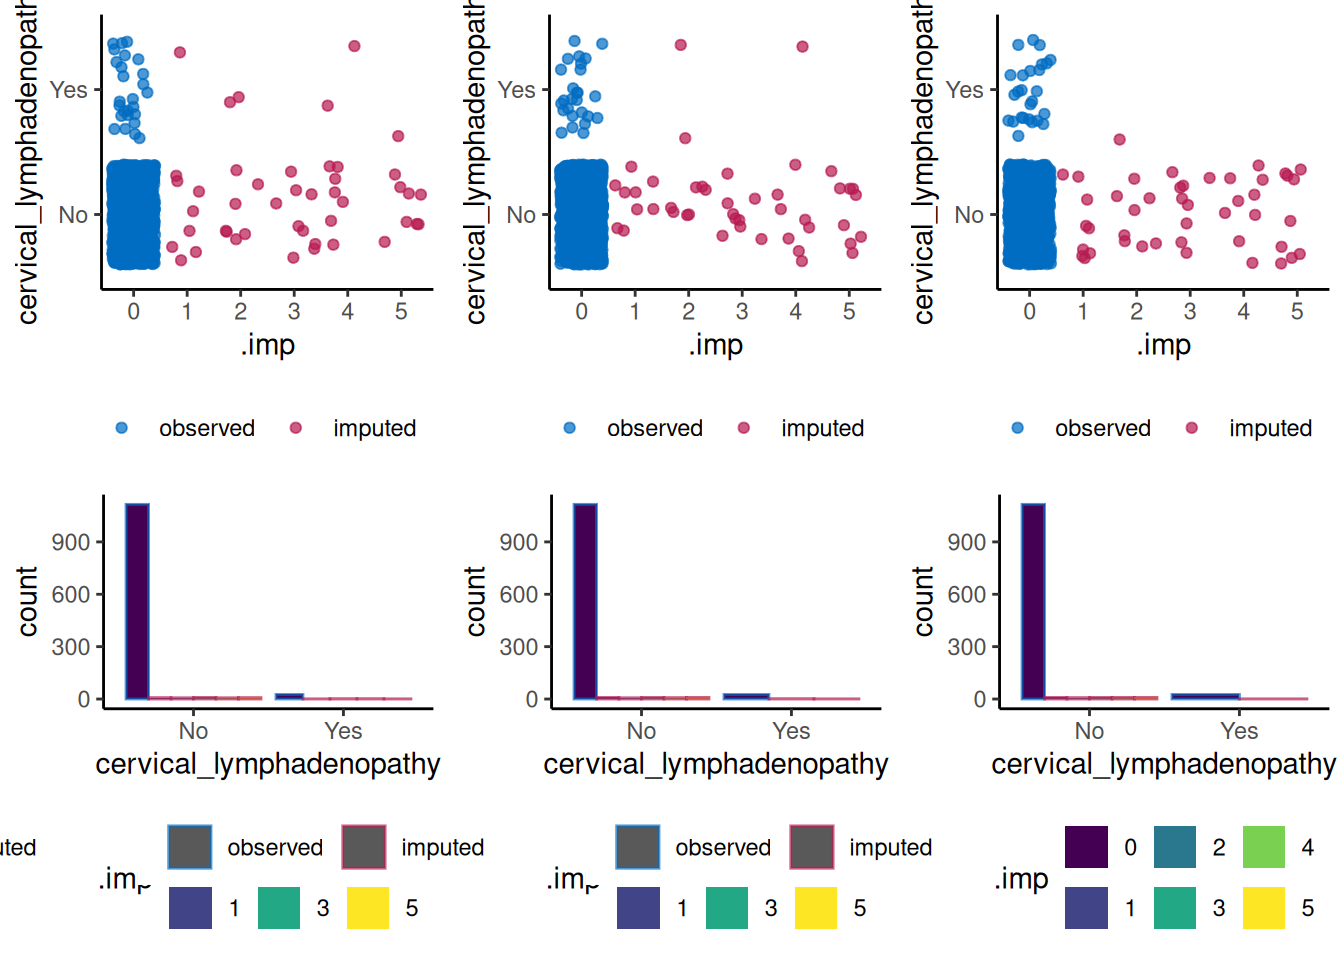
</figure>

## PMM

``` r
mice_pmm$imputed |> gtsummary::tbl_summary(by=".imp")
```

<div id="fkhvvgpqvr" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#fkhvvgpqvr table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#fkhvvgpqvr thead, #fkhvvgpqvr tbody, #fkhvvgpqvr tfoot, #fkhvvgpqvr tr, #fkhvvgpqvr td, #fkhvvgpqvr th {
  border-style: none;
}

#fkhvvgpqvr p {
  margin: 0;
  padding: 0;
}

#fkhvvgpqvr .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#fkhvvgpqvr .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#fkhvvgpqvr .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#fkhvvgpqvr .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#fkhvvgpqvr .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#fkhvvgpqvr .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#fkhvvgpqvr .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#fkhvvgpqvr .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#fkhvvgpqvr .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#fkhvvgpqvr .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#fkhvvgpqvr .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#fkhvvgpqvr .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#fkhvvgpqvr .gt_spanner_row {
  border-bottom-style: hidden;
}

#fkhvvgpqvr .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#fkhvvgpqvr .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#fkhvvgpqvr .gt_from_md > :first-child {
  margin-top: 0;
}

#fkhvvgpqvr .gt_from_md > :last-child {
  margin-bottom: 0;
}

#fkhvvgpqvr .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#fkhvvgpqvr .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#fkhvvgpqvr .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#fkhvvgpqvr .gt_row_group_first td {
  border-top-width: 2px;
}

#fkhvvgpqvr .gt_row_group_first th {
  border-top-width: 2px;
}

#fkhvvgpqvr .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#fkhvvgpqvr .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#fkhvvgpqvr .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#fkhvvgpqvr .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#fkhvvgpqvr .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#fkhvvgpqvr .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#fkhvvgpqvr .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#fkhvvgpqvr .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#fkhvvgpqvr .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#fkhvvgpqvr .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#fkhvvgpqvr .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#fkhvvgpqvr .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#fkhvvgpqvr .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#fkhvvgpqvr .gt_left {
  text-align: left;
}

#fkhvvgpqvr .gt_center {
  text-align: center;
}

#fkhvvgpqvr .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#fkhvvgpqvr .gt_font_normal {
  font-weight: normal;
}

#fkhvvgpqvr .gt_font_bold {
  font-weight: bold;
}

#fkhvvgpqvr .gt_font_italic {
  font-style: italic;
}

#fkhvvgpqvr .gt_super {
  font-size: 65%;
}

#fkhvvgpqvr .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#fkhvvgpqvr .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#fkhvvgpqvr .gt_indent_1 {
  text-indent: 5px;
}

#fkhvvgpqvr .gt_indent_2 {
  text-indent: 10px;
}

#fkhvvgpqvr .gt_indent_3 {
  text-indent: 15px;
}

#fkhvvgpqvr .gt_indent_4 {
  text-indent: 20px;
}

#fkhvvgpqvr .gt_indent_5 {
  text-indent: 25px;
}

#fkhvvgpqvr .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#fkhvvgpqvr div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

<table class="gt_table" style="width:100%;" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;div data-qmd-base64=&quot;KipDaGFyYWN0ZXJpc3RpYyoq&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Characteristic&lt;/strong&gt;&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><p><strong>Characteristic</strong></p></th>
<th id="&lt;div data-qmd-base64=&quot;KipPcmlnaW5hbCoqLCBOID0gMSwxNTA=&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Original&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>Original</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioxKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;1&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>1</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioyKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;2&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>2</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KiozKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;3&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>3</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio0KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;4&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>4</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio1KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;5&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>5</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">.id</td>
<td class="gt_row gt_center" headers="stat_1">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_2">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_3">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_4">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_5">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_6">576 (288, 863)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Age</td>
<td class="gt_row gt_center" headers="stat_1">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_2">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_3">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_4">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_5">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_6">55 (41, 68)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">gender</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_2">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_3">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_6">903 (79%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_2">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_3">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_4">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_5">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_6">247 (21%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">ethnicity</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    A</td>
<td class="gt_row gt_center" headers="stat_1">812 (74%)</td>
<td class="gt_row gt_center" headers="stat_2">841 (73%)</td>
<td class="gt_row gt_center" headers="stat_3">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_4">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_5">844 (73%)</td>
<td class="gt_row gt_center" headers="stat_6">844 (73%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    B</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_3">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">3 (0.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    C</td>
<td class="gt_row gt_center" headers="stat_1">44 (4.0%)</td>
<td class="gt_row gt_center" headers="stat_2">48 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_5">45 (3.9%)</td>
<td class="gt_row gt_center" headers="stat_6">46 (4.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    D</td>
<td class="gt_row gt_center" headers="stat_1">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_2">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_3">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_4">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_5">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_6">2 (0.2%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">4 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_2">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_3">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_4">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">4 (0.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    G</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_3">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">8 (0.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    H</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_6">9 (0.8%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    J</td>
<td class="gt_row gt_center" headers="stat_1">46 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_2">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">50 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_5">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_6">50 (4.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    K</td>
<td class="gt_row gt_center" headers="stat_1">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_2">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_6">12 (1.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    L</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_3">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_4">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_5">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_3">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_4">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_5">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    N</td>
<td class="gt_row gt_center" headers="stat_1">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_3">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_6">19 (1.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    P</td>
<td class="gt_row gt_center" headers="stat_1">14 (1.3%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    R</td>
<td class="gt_row gt_center" headers="stat_1">6 (0.5%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">7 (0.6%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    S</td>
<td class="gt_row gt_center" headers="stat_1">38 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_3">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_4">40 (3.5%)</td>
<td class="gt_row gt_center" headers="stat_5">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_6">40 (3.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Z</td>
<td class="gt_row gt_center" headers="stat_1">57 (5.2%)</td>
<td class="gt_row gt_center" headers="stat_2">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_3">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_4">59 (5.1%)</td>
<td class="gt_row gt_center" headers="stat_5">62 (5.4%)</td>
<td class="gt_row gt_center" headers="stat_6">59 (5.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">48</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">incidental_nodule</td>
<td class="gt_row gt_center" headers="stat_1">620 (54%)</td>
<td class="gt_row gt_center" headers="stat_2">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_3">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_4">625 (54%)</td>
<td class="gt_row gt_center" headers="stat_5">624 (54%)</td>
<td class="gt_row gt_center" headers="stat_6">623 (54%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">5</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">palpable_nodule</td>
<td class="gt_row gt_center" headers="stat_1">441 (40%)</td>
<td class="gt_row gt_center" headers="stat_2">468 (41%)</td>
<td class="gt_row gt_center" headers="stat_3">471 (41%)</td>
<td class="gt_row gt_center" headers="stat_4">470 (41%)</td>
<td class="gt_row gt_center" headers="stat_5">474 (41%)</td>
<td class="gt_row gt_center" headers="stat_6">477 (41%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">58</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">rapid_enlargement</td>
<td class="gt_row gt_center" headers="stat_1">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">21 (1.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">43</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">compressive_symptoms</td>
<td class="gt_row gt_center" headers="stat_1">88 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_2">104 (9.0%)</td>
<td class="gt_row gt_center" headers="stat_3">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_4">108 (9.4%)</td>
<td class="gt_row gt_center" headers="stat_5">109 (9.5%)</td>
<td class="gt_row gt_center" headers="stat_6">101 (8.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">106</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">hypertension</td>
<td class="gt_row gt_center" headers="stat_1">262 (26%)</td>
<td class="gt_row gt_center" headers="stat_2">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_3">298 (26%)</td>
<td class="gt_row gt_center" headers="stat_4">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_5">305 (27%)</td>
<td class="gt_row gt_center" headers="stat_6">298 (26%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">126</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">vocal_cord_paresis</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_6">5 (0.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">76</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">graves_disease</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    no</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_3">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_4">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_5">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_6">0 (0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    No</td>
<td class="gt_row gt_center" headers="stat_1">1,066 (98%)</td>
<td class="gt_row gt_center" headers="stat_2">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_3">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_4">1,131 (98%)</td>
<td class="gt_row gt_center" headers="stat_5">1,128 (98%)</td>
<td class="gt_row gt_center" headers="stat_6">1,128 (98%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Yes</td>
<td class="gt_row gt_center" headers="stat_1">17 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_6">22 (1.9%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">67</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">hashimotos_thyroiditis</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">73</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">family_history_thyroid_cancer</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">33 (2.9%)</td>
<td class="gt_row gt_center" headers="stat_3">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">32 (2.8%)</td>
<td class="gt_row gt_center" headers="stat_6">29 (2.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">281</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">exposure_radiation</td>
<td class="gt_row gt_center" headers="stat_1">9 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">121</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Albumin</td>
<td class="gt_row gt_center" headers="stat_1">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_2">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_3">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_4">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_5">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_6">45.0 (43.0, 47.0)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">515</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">TSH value</td>
<td class="gt_row gt_center" headers="stat_1">1.48 (0.85, 2.30)</td>
<td class="gt_row gt_center" headers="stat_2">1.50 (0.88, 2.40)</td>
<td class="gt_row gt_center" headers="stat_3">1.50 (0.87, 2.30)</td>
<td class="gt_row gt_center" headers="stat_4">1.50 (0.91, 2.50)</td>
<td class="gt_row gt_center" headers="stat_5">1.50 (0.88, 2.30)</td>
<td class="gt_row gt_center" headers="stat_6">1.40 (0.84, 2.30)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">413</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Lymphocytes</td>
<td class="gt_row gt_center" headers="stat_1">1.94 (1.51, 2.43)</td>
<td class="gt_row gt_center" headers="stat_2">1.93 (1.50, 2.42)</td>
<td class="gt_row gt_center" headers="stat_3">1.93 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_4">1.92 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_5">1.94 (1.51, 2.42)</td>
<td class="gt_row gt_center" headers="stat_6">1.95 (1.54, 2.45)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">359</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Monocytes</td>
<td class="gt_row gt_center" headers="stat_1">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_2">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_3">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_4">0.53 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_5">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_6">0.53 (0.42, 0.66)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">363</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">bta_u_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U1</td>
<td class="gt_row gt_center" headers="stat_1">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_3">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_6">1 (&lt;0.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U2</td>
<td class="gt_row gt_center" headers="stat_1">860 (78%)</td>
<td class="gt_row gt_center" headers="stat_2">897 (78%)</td>
<td class="gt_row gt_center" headers="stat_3">895 (78%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">893 (78%)</td>
<td class="gt_row gt_center" headers="stat_6">895 (78%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U3</td>
<td class="gt_row gt_center" headers="stat_1">210 (19%)</td>
<td class="gt_row gt_center" headers="stat_2">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_3">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_4">214 (19%)</td>
<td class="gt_row gt_center" headers="stat_5">222 (19%)</td>
<td class="gt_row gt_center" headers="stat_6">221 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U4</td>
<td class="gt_row gt_center" headers="stat_1">22 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_2">24 (2.1%)</td>
<td class="gt_row gt_center" headers="stat_3">23 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_4">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_5">25 (2.2%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U5</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_6">10 (0.9%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">50</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">solitary_nodule</td>
<td class="gt_row gt_center" headers="stat_1">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_2">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_3">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_4">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_5">323 (28%)</td>
<td class="gt_row gt_center" headers="stat_6">323 (28%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">8</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Nodule size (mm)</td>
<td class="gt_row gt_center" headers="stat_1">14 (7, 28)</td>
<td class="gt_row gt_center" headers="stat_2">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_3">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_4">13 (6, 26)</td>
<td class="gt_row gt_center" headers="stat_5">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_6">13 (6, 28)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">319</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">cervical_lymphadenopathy</td>
<td class="gt_row gt_center" headers="stat_1">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_2">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_3">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_4">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">26 (2.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">9</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">thy_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy1</td>
<td class="gt_row gt_center" headers="stat_1">34 (14%)</td>
<td class="gt_row gt_center" headers="stat_2">88 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_3">90 (7.8%)</td>
<td class="gt_row gt_center" headers="stat_4">77 (6.7%)</td>
<td class="gt_row gt_center" headers="stat_5">71 (6.2%)</td>
<td class="gt_row gt_center" headers="stat_6">74 (6.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy1c</td>
<td class="gt_row gt_center" headers="stat_1">8 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">101 (8.8%)</td>
<td class="gt_row gt_center" headers="stat_3">189 (16%)</td>
<td class="gt_row gt_center" headers="stat_4">192 (17%)</td>
<td class="gt_row gt_center" headers="stat_5">148 (13%)</td>
<td class="gt_row gt_center" headers="stat_6">152 (13%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy2</td>
<td class="gt_row gt_center" headers="stat_1">63 (27%)</td>
<td class="gt_row gt_center" headers="stat_2">133 (12%)</td>
<td class="gt_row gt_center" headers="stat_3">264 (23%)</td>
<td class="gt_row gt_center" headers="stat_4">227 (20%)</td>
<td class="gt_row gt_center" headers="stat_5">196 (17%)</td>
<td class="gt_row gt_center" headers="stat_6">258 (22%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy2c</td>
<td class="gt_row gt_center" headers="stat_1">11 (4.7%)</td>
<td class="gt_row gt_center" headers="stat_2">250 (22%)</td>
<td class="gt_row gt_center" headers="stat_3">113 (9.8%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_6">143 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy3a</td>
<td class="gt_row gt_center" headers="stat_1">18 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_2">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_3">164 (14%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">94 (8.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy3f</td>
<td class="gt_row gt_center" headers="stat_1">74 (31%)</td>
<td class="gt_row gt_center" headers="stat_2">126 (11%)</td>
<td class="gt_row gt_center" headers="stat_3">153 (13%)</td>
<td class="gt_row gt_center" headers="stat_4">151 (13%)</td>
<td class="gt_row gt_center" headers="stat_5">143 (12%)</td>
<td class="gt_row gt_center" headers="stat_6">138 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy4</td>
<td class="gt_row gt_center" headers="stat_1">10 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_2">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_3">66 (5.7%)</td>
<td class="gt_row gt_center" headers="stat_4">55 (4.8%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">73 (6.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy5</td>
<td class="gt_row gt_center" headers="stat_1">17 (7.2%)</td>
<td class="gt_row gt_center" headers="stat_2">175 (15%)</td>
<td class="gt_row gt_center" headers="stat_3">111 (9.7%)</td>
<td class="gt_row gt_center" headers="stat_4">274 (24%)</td>
<td class="gt_row gt_center" headers="stat_5">208 (18%)</td>
<td class="gt_row gt_center" headers="stat_6">218 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">915</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">final_pathology</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Benign</td>
<td class="gt_row gt_center" headers="stat_1">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_2">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_3">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_4">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_5">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_6">1,050 (91%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Cancer</td>
<td class="gt_row gt_center" headers="stat_1">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_2">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_3">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_4">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_5">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_6">100 (8.7%)</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="7" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span>
<p>Median (IQR); n (%)</p></td>
</tr>
</tfoot>
&#10;</table>

</div>

## CART

``` r
mice_cart$imputed |> gtsummary::tbl_summary(by=".imp")
```

<div id="qnvchnsoxq" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#qnvchnsoxq table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#qnvchnsoxq thead, #qnvchnsoxq tbody, #qnvchnsoxq tfoot, #qnvchnsoxq tr, #qnvchnsoxq td, #qnvchnsoxq th {
  border-style: none;
}

#qnvchnsoxq p {
  margin: 0;
  padding: 0;
}

#qnvchnsoxq .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#qnvchnsoxq .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#qnvchnsoxq .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#qnvchnsoxq .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#qnvchnsoxq .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#qnvchnsoxq .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#qnvchnsoxq .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#qnvchnsoxq .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#qnvchnsoxq .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#qnvchnsoxq .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#qnvchnsoxq .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#qnvchnsoxq .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#qnvchnsoxq .gt_spanner_row {
  border-bottom-style: hidden;
}

#qnvchnsoxq .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#qnvchnsoxq .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#qnvchnsoxq .gt_from_md > :first-child {
  margin-top: 0;
}

#qnvchnsoxq .gt_from_md > :last-child {
  margin-bottom: 0;
}

#qnvchnsoxq .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#qnvchnsoxq .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#qnvchnsoxq .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#qnvchnsoxq .gt_row_group_first td {
  border-top-width: 2px;
}

#qnvchnsoxq .gt_row_group_first th {
  border-top-width: 2px;
}

#qnvchnsoxq .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#qnvchnsoxq .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#qnvchnsoxq .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#qnvchnsoxq .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#qnvchnsoxq .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#qnvchnsoxq .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#qnvchnsoxq .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#qnvchnsoxq .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#qnvchnsoxq .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#qnvchnsoxq .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#qnvchnsoxq .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#qnvchnsoxq .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#qnvchnsoxq .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#qnvchnsoxq .gt_left {
  text-align: left;
}

#qnvchnsoxq .gt_center {
  text-align: center;
}

#qnvchnsoxq .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#qnvchnsoxq .gt_font_normal {
  font-weight: normal;
}

#qnvchnsoxq .gt_font_bold {
  font-weight: bold;
}

#qnvchnsoxq .gt_font_italic {
  font-style: italic;
}

#qnvchnsoxq .gt_super {
  font-size: 65%;
}

#qnvchnsoxq .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#qnvchnsoxq .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#qnvchnsoxq .gt_indent_1 {
  text-indent: 5px;
}

#qnvchnsoxq .gt_indent_2 {
  text-indent: 10px;
}

#qnvchnsoxq .gt_indent_3 {
  text-indent: 15px;
}

#qnvchnsoxq .gt_indent_4 {
  text-indent: 20px;
}

#qnvchnsoxq .gt_indent_5 {
  text-indent: 25px;
}

#qnvchnsoxq .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#qnvchnsoxq div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

<table class="gt_table" style="width:100%;" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;div data-qmd-base64=&quot;KipDaGFyYWN0ZXJpc3RpYyoq&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Characteristic&lt;/strong&gt;&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><p><strong>Characteristic</strong></p></th>
<th id="&lt;div data-qmd-base64=&quot;KipPcmlnaW5hbCoqLCBOID0gMSwxNTA=&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Original&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>Original</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioxKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;1&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>1</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioyKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;2&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>2</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KiozKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;3&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>3</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio0KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;4&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>4</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio1KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;5&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>5</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">.id</td>
<td class="gt_row gt_center" headers="stat_1">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_2">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_3">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_4">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_5">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_6">576 (288, 863)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Age</td>
<td class="gt_row gt_center" headers="stat_1">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_2">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_3">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_4">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_5">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_6">55 (41, 68)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">gender</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_2">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_3">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_6">903 (79%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_2">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_3">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_4">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_5">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_6">247 (21%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">ethnicity</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    A</td>
<td class="gt_row gt_center" headers="stat_1">812 (74%)</td>
<td class="gt_row gt_center" headers="stat_2">841 (73%)</td>
<td class="gt_row gt_center" headers="stat_3">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_4">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_5">844 (73%)</td>
<td class="gt_row gt_center" headers="stat_6">844 (73%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    B</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_3">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">3 (0.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    C</td>
<td class="gt_row gt_center" headers="stat_1">44 (4.0%)</td>
<td class="gt_row gt_center" headers="stat_2">48 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_5">45 (3.9%)</td>
<td class="gt_row gt_center" headers="stat_6">46 (4.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    D</td>
<td class="gt_row gt_center" headers="stat_1">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_2">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_3">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_4">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_5">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_6">2 (0.2%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">4 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_2">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_3">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_4">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">4 (0.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    G</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_3">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">8 (0.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    H</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_6">9 (0.8%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    J</td>
<td class="gt_row gt_center" headers="stat_1">46 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_2">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">50 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_5">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_6">50 (4.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    K</td>
<td class="gt_row gt_center" headers="stat_1">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_2">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_6">12 (1.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    L</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_3">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_4">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_5">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_3">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_4">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_5">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    N</td>
<td class="gt_row gt_center" headers="stat_1">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_3">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_6">19 (1.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    P</td>
<td class="gt_row gt_center" headers="stat_1">14 (1.3%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    R</td>
<td class="gt_row gt_center" headers="stat_1">6 (0.5%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">7 (0.6%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    S</td>
<td class="gt_row gt_center" headers="stat_1">38 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_3">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_4">40 (3.5%)</td>
<td class="gt_row gt_center" headers="stat_5">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_6">40 (3.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Z</td>
<td class="gt_row gt_center" headers="stat_1">57 (5.2%)</td>
<td class="gt_row gt_center" headers="stat_2">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_3">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_4">59 (5.1%)</td>
<td class="gt_row gt_center" headers="stat_5">62 (5.4%)</td>
<td class="gt_row gt_center" headers="stat_6">59 (5.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">48</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">incidental_nodule</td>
<td class="gt_row gt_center" headers="stat_1">620 (54%)</td>
<td class="gt_row gt_center" headers="stat_2">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_3">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_4">625 (54%)</td>
<td class="gt_row gt_center" headers="stat_5">624 (54%)</td>
<td class="gt_row gt_center" headers="stat_6">623 (54%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">5</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">palpable_nodule</td>
<td class="gt_row gt_center" headers="stat_1">441 (40%)</td>
<td class="gt_row gt_center" headers="stat_2">468 (41%)</td>
<td class="gt_row gt_center" headers="stat_3">471 (41%)</td>
<td class="gt_row gt_center" headers="stat_4">470 (41%)</td>
<td class="gt_row gt_center" headers="stat_5">474 (41%)</td>
<td class="gt_row gt_center" headers="stat_6">477 (41%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">58</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">rapid_enlargement</td>
<td class="gt_row gt_center" headers="stat_1">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">21 (1.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">43</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">compressive_symptoms</td>
<td class="gt_row gt_center" headers="stat_1">88 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_2">104 (9.0%)</td>
<td class="gt_row gt_center" headers="stat_3">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_4">108 (9.4%)</td>
<td class="gt_row gt_center" headers="stat_5">109 (9.5%)</td>
<td class="gt_row gt_center" headers="stat_6">101 (8.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">106</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">hypertension</td>
<td class="gt_row gt_center" headers="stat_1">262 (26%)</td>
<td class="gt_row gt_center" headers="stat_2">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_3">298 (26%)</td>
<td class="gt_row gt_center" headers="stat_4">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_5">305 (27%)</td>
<td class="gt_row gt_center" headers="stat_6">298 (26%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">126</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">vocal_cord_paresis</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_6">5 (0.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">76</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">graves_disease</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    no</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_3">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_4">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_5">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_6">0 (0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    No</td>
<td class="gt_row gt_center" headers="stat_1">1,066 (98%)</td>
<td class="gt_row gt_center" headers="stat_2">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_3">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_4">1,131 (98%)</td>
<td class="gt_row gt_center" headers="stat_5">1,128 (98%)</td>
<td class="gt_row gt_center" headers="stat_6">1,128 (98%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Yes</td>
<td class="gt_row gt_center" headers="stat_1">17 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_6">22 (1.9%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">67</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">hashimotos_thyroiditis</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">73</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">family_history_thyroid_cancer</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">33 (2.9%)</td>
<td class="gt_row gt_center" headers="stat_3">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">32 (2.8%)</td>
<td class="gt_row gt_center" headers="stat_6">29 (2.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">281</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">exposure_radiation</td>
<td class="gt_row gt_center" headers="stat_1">9 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">121</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Albumin</td>
<td class="gt_row gt_center" headers="stat_1">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_2">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_3">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_4">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_5">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_6">45.0 (43.0, 47.0)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">515</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">TSH value</td>
<td class="gt_row gt_center" headers="stat_1">1.48 (0.85, 2.30)</td>
<td class="gt_row gt_center" headers="stat_2">1.50 (0.88, 2.40)</td>
<td class="gt_row gt_center" headers="stat_3">1.50 (0.87, 2.30)</td>
<td class="gt_row gt_center" headers="stat_4">1.50 (0.91, 2.50)</td>
<td class="gt_row gt_center" headers="stat_5">1.50 (0.88, 2.30)</td>
<td class="gt_row gt_center" headers="stat_6">1.40 (0.84, 2.30)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">413</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Lymphocytes</td>
<td class="gt_row gt_center" headers="stat_1">1.94 (1.51, 2.43)</td>
<td class="gt_row gt_center" headers="stat_2">1.93 (1.50, 2.42)</td>
<td class="gt_row gt_center" headers="stat_3">1.93 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_4">1.92 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_5">1.94 (1.51, 2.42)</td>
<td class="gt_row gt_center" headers="stat_6">1.95 (1.54, 2.45)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">359</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Monocytes</td>
<td class="gt_row gt_center" headers="stat_1">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_2">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_3">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_4">0.53 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_5">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_6">0.53 (0.42, 0.66)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">363</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">bta_u_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U1</td>
<td class="gt_row gt_center" headers="stat_1">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_3">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_6">1 (&lt;0.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U2</td>
<td class="gt_row gt_center" headers="stat_1">860 (78%)</td>
<td class="gt_row gt_center" headers="stat_2">897 (78%)</td>
<td class="gt_row gt_center" headers="stat_3">895 (78%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">893 (78%)</td>
<td class="gt_row gt_center" headers="stat_6">895 (78%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U3</td>
<td class="gt_row gt_center" headers="stat_1">210 (19%)</td>
<td class="gt_row gt_center" headers="stat_2">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_3">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_4">214 (19%)</td>
<td class="gt_row gt_center" headers="stat_5">222 (19%)</td>
<td class="gt_row gt_center" headers="stat_6">221 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U4</td>
<td class="gt_row gt_center" headers="stat_1">22 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_2">24 (2.1%)</td>
<td class="gt_row gt_center" headers="stat_3">23 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_4">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_5">25 (2.2%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U5</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_6">10 (0.9%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">50</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">solitary_nodule</td>
<td class="gt_row gt_center" headers="stat_1">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_2">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_3">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_4">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_5">323 (28%)</td>
<td class="gt_row gt_center" headers="stat_6">323 (28%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">8</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Nodule size (mm)</td>
<td class="gt_row gt_center" headers="stat_1">14 (7, 28)</td>
<td class="gt_row gt_center" headers="stat_2">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_3">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_4">13 (6, 26)</td>
<td class="gt_row gt_center" headers="stat_5">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_6">13 (6, 28)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">319</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">cervical_lymphadenopathy</td>
<td class="gt_row gt_center" headers="stat_1">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_2">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_3">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_4">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">26 (2.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">9</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">thy_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy1</td>
<td class="gt_row gt_center" headers="stat_1">34 (14%)</td>
<td class="gt_row gt_center" headers="stat_2">88 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_3">90 (7.8%)</td>
<td class="gt_row gt_center" headers="stat_4">77 (6.7%)</td>
<td class="gt_row gt_center" headers="stat_5">71 (6.2%)</td>
<td class="gt_row gt_center" headers="stat_6">74 (6.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy1c</td>
<td class="gt_row gt_center" headers="stat_1">8 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">101 (8.8%)</td>
<td class="gt_row gt_center" headers="stat_3">189 (16%)</td>
<td class="gt_row gt_center" headers="stat_4">192 (17%)</td>
<td class="gt_row gt_center" headers="stat_5">148 (13%)</td>
<td class="gt_row gt_center" headers="stat_6">152 (13%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy2</td>
<td class="gt_row gt_center" headers="stat_1">63 (27%)</td>
<td class="gt_row gt_center" headers="stat_2">133 (12%)</td>
<td class="gt_row gt_center" headers="stat_3">264 (23%)</td>
<td class="gt_row gt_center" headers="stat_4">227 (20%)</td>
<td class="gt_row gt_center" headers="stat_5">196 (17%)</td>
<td class="gt_row gt_center" headers="stat_6">258 (22%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy2c</td>
<td class="gt_row gt_center" headers="stat_1">11 (4.7%)</td>
<td class="gt_row gt_center" headers="stat_2">250 (22%)</td>
<td class="gt_row gt_center" headers="stat_3">113 (9.8%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_6">143 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy3a</td>
<td class="gt_row gt_center" headers="stat_1">18 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_2">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_3">164 (14%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">94 (8.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy3f</td>
<td class="gt_row gt_center" headers="stat_1">74 (31%)</td>
<td class="gt_row gt_center" headers="stat_2">126 (11%)</td>
<td class="gt_row gt_center" headers="stat_3">153 (13%)</td>
<td class="gt_row gt_center" headers="stat_4">151 (13%)</td>
<td class="gt_row gt_center" headers="stat_5">143 (12%)</td>
<td class="gt_row gt_center" headers="stat_6">138 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy4</td>
<td class="gt_row gt_center" headers="stat_1">10 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_2">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_3">66 (5.7%)</td>
<td class="gt_row gt_center" headers="stat_4">55 (4.8%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">73 (6.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy5</td>
<td class="gt_row gt_center" headers="stat_1">17 (7.2%)</td>
<td class="gt_row gt_center" headers="stat_2">175 (15%)</td>
<td class="gt_row gt_center" headers="stat_3">111 (9.7%)</td>
<td class="gt_row gt_center" headers="stat_4">274 (24%)</td>
<td class="gt_row gt_center" headers="stat_5">208 (18%)</td>
<td class="gt_row gt_center" headers="stat_6">218 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">915</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">final_pathology</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Benign</td>
<td class="gt_row gt_center" headers="stat_1">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_2">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_3">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_4">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_5">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_6">1,050 (91%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Cancer</td>
<td class="gt_row gt_center" headers="stat_1">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_2">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_3">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_4">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_5">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_6">100 (8.7%)</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="7" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span>
<p>Median (IQR); n (%)</p></td>
</tr>
</tfoot>
&#10;</table>

</div>

## RF

``` r
mice_rf$imputed |> gtsummary::tbl_summary(by = ".imp")
```

<div id="typxvkpthc" style="padding-left:0px;padding-right:0px;padding-top:10px;padding-bottom:10px;overflow-x:auto;overflow-y:auto;width:auto;height:auto;">
<style>#typxvkpthc table {
  font-family: system-ui, 'Segoe UI', Roboto, Helvetica, Arial, sans-serif, 'Apple Color Emoji', 'Segoe UI Emoji', 'Segoe UI Symbol', 'Noto Color Emoji';
  -webkit-font-smoothing: antialiased;
  -moz-osx-font-smoothing: grayscale;
}

#typxvkpthc thead, #typxvkpthc tbody, #typxvkpthc tfoot, #typxvkpthc tr, #typxvkpthc td, #typxvkpthc th {
  border-style: none;
}

#typxvkpthc p {
  margin: 0;
  padding: 0;
}

#typxvkpthc .gt_table {
  display: table;
  border-collapse: collapse;
  line-height: normal;
  margin-left: auto;
  margin-right: auto;
  color: #333333;
  font-size: 16px;
  font-weight: normal;
  font-style: normal;
  background-color: #FFFFFF;
  width: auto;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #A8A8A8;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #A8A8A8;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
}

#typxvkpthc .gt_caption {
  padding-top: 4px;
  padding-bottom: 4px;
}

#typxvkpthc .gt_title {
  color: #333333;
  font-size: 125%;
  font-weight: initial;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-color: #FFFFFF;
  border-bottom-width: 0;
}

#typxvkpthc .gt_subtitle {
  color: #333333;
  font-size: 85%;
  font-weight: initial;
  padding-top: 3px;
  padding-bottom: 5px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-color: #FFFFFF;
  border-top-width: 0;
}

#typxvkpthc .gt_heading {
  background-color: #FFFFFF;
  text-align: center;
  border-bottom-color: #FFFFFF;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#typxvkpthc .gt_bottom_border {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#typxvkpthc .gt_col_headings {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
}

#typxvkpthc .gt_col_heading {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 6px;
  padding-left: 5px;
  padding-right: 5px;
  overflow-x: hidden;
}

#typxvkpthc .gt_column_spanner_outer {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: normal;
  text-transform: inherit;
  padding-top: 0;
  padding-bottom: 0;
  padding-left: 4px;
  padding-right: 4px;
}

#typxvkpthc .gt_column_spanner_outer:first-child {
  padding-left: 0;
}

#typxvkpthc .gt_column_spanner_outer:last-child {
  padding-right: 0;
}

#typxvkpthc .gt_column_spanner {
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: bottom;
  padding-top: 5px;
  padding-bottom: 5px;
  overflow-x: hidden;
  display: inline-block;
  width: 100%;
}

#typxvkpthc .gt_spanner_row {
  border-bottom-style: hidden;
}

#typxvkpthc .gt_group_heading {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  text-align: left;
}

#typxvkpthc .gt_empty_group_heading {
  padding: 0.5px;
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  vertical-align: middle;
}

#typxvkpthc .gt_from_md > :first-child {
  margin-top: 0;
}

#typxvkpthc .gt_from_md > :last-child {
  margin-bottom: 0;
}

#typxvkpthc .gt_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  margin: 10px;
  border-top-style: solid;
  border-top-width: 1px;
  border-top-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 1px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 1px;
  border-right-color: #D3D3D3;
  vertical-align: middle;
  overflow-x: hidden;
}

#typxvkpthc .gt_stub {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
}

#typxvkpthc .gt_stub_row_group {
  color: #333333;
  background-color: #FFFFFF;
  font-size: 100%;
  font-weight: initial;
  text-transform: inherit;
  border-right-style: solid;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
  padding-left: 5px;
  padding-right: 5px;
  vertical-align: top;
}

#typxvkpthc .gt_row_group_first td {
  border-top-width: 2px;
}

#typxvkpthc .gt_row_group_first th {
  border-top-width: 2px;
}

#typxvkpthc .gt_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#typxvkpthc .gt_first_summary_row {
  border-top-style: solid;
  border-top-color: #D3D3D3;
}

#typxvkpthc .gt_first_summary_row.thick {
  border-top-width: 2px;
}

#typxvkpthc .gt_last_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#typxvkpthc .gt_grand_summary_row {
  color: #333333;
  background-color: #FFFFFF;
  text-transform: inherit;
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
}

#typxvkpthc .gt_first_grand_summary_row {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-top-style: double;
  border-top-width: 6px;
  border-top-color: #D3D3D3;
}

#typxvkpthc .gt_last_grand_summary_row_top {
  padding-top: 8px;
  padding-bottom: 8px;
  padding-left: 5px;
  padding-right: 5px;
  border-bottom-style: double;
  border-bottom-width: 6px;
  border-bottom-color: #D3D3D3;
}

#typxvkpthc .gt_striped {
  background-color: rgba(128, 128, 128, 0.05);
}

#typxvkpthc .gt_table_body {
  border-top-style: solid;
  border-top-width: 2px;
  border-top-color: #D3D3D3;
  border-bottom-style: solid;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
}

#typxvkpthc .gt_footnotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#typxvkpthc .gt_footnote {
  margin: 0px;
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#typxvkpthc .gt_sourcenotes {
  color: #333333;
  background-color: #FFFFFF;
  border-bottom-style: none;
  border-bottom-width: 2px;
  border-bottom-color: #D3D3D3;
  border-left-style: none;
  border-left-width: 2px;
  border-left-color: #D3D3D3;
  border-right-style: none;
  border-right-width: 2px;
  border-right-color: #D3D3D3;
}

#typxvkpthc .gt_sourcenote {
  font-size: 90%;
  padding-top: 4px;
  padding-bottom: 4px;
  padding-left: 5px;
  padding-right: 5px;
}

#typxvkpthc .gt_left {
  text-align: left;
}

#typxvkpthc .gt_center {
  text-align: center;
}

#typxvkpthc .gt_right {
  text-align: right;
  font-variant-numeric: tabular-nums;
}

#typxvkpthc .gt_font_normal {
  font-weight: normal;
}

#typxvkpthc .gt_font_bold {
  font-weight: bold;
}

#typxvkpthc .gt_font_italic {
  font-style: italic;
}

#typxvkpthc .gt_super {
  font-size: 65%;
}

#typxvkpthc .gt_footnote_marks {
  font-size: 75%;
  vertical-align: 0.4em;
  position: initial;
}

#typxvkpthc .gt_asterisk {
  font-size: 100%;
  vertical-align: 0;
}

#typxvkpthc .gt_indent_1 {
  text-indent: 5px;
}

#typxvkpthc .gt_indent_2 {
  text-indent: 10px;
}

#typxvkpthc .gt_indent_3 {
  text-indent: 15px;
}

#typxvkpthc .gt_indent_4 {
  text-indent: 20px;
}

#typxvkpthc .gt_indent_5 {
  text-indent: 25px;
}

#typxvkpthc .katex-display {
  display: inline-flex !important;
  margin-bottom: 0.75em !important;
}

#typxvkpthc div.Reactable > div.rt-table > div.rt-thead > div.rt-tr.rt-tr-group-header > div.rt-th-group:after {
  height: 0px !important;
}
</style>

<table class="gt_table" style="width:100%;" data-quarto-postprocess="true" data-quarto-disable-processing="false" data-quarto-bootstrap="false">
<colgroup>
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
<col style="width: 14%" />
</colgroup>
<thead>
<tr class="header gt_col_headings">
<th id="&lt;div data-qmd-base64=&quot;KipDaGFyYWN0ZXJpc3RpYyoq&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Characteristic&lt;/strong&gt;&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;" class="gt_col_heading gt_columns_bottom_border gt_left" data-quarto-table-cell-role="th" scope="col"><p><strong>Characteristic</strong></p></th>
<th id="&lt;div data-qmd-base64=&quot;KipPcmlnaW5hbCoqLCBOID0gMSwxNTA=&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;Original&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>Original</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioxKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;1&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>1</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KioyKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;2&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>2</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;KiozKiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;3&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>3</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio0KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;4&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>4</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
<th id="&lt;div data-qmd-base64=&quot;Kio1KiosIE4gPSAxLDE1MA==&quot;&gt;&lt;div class=&#39;gt_from_md&#39;&gt;&lt;p&gt;&lt;strong&gt;5&lt;/strong&gt;, N = 1,150&lt;/p&gt;
&lt;/div&gt;&lt;/div&gt;&lt;span class=&quot;gt_footnote_marks&quot; style=&quot;white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;&quot;&gt;&lt;sup&gt;1&lt;/sup&gt;&lt;/span&gt;" class="gt_col_heading gt_columns_bottom_border gt_center" data-quarto-table-cell-role="th" scope="col"><p><strong>5</strong>, N = 1,150</p>
<span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span></th>
</tr>
</thead>
<tbody class="gt_table_body">
<tr class="odd">
<td class="gt_row gt_left" headers="label">.id</td>
<td class="gt_row gt_center" headers="stat_1">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_2">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_3">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_4">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_5">576 (288, 863)</td>
<td class="gt_row gt_center" headers="stat_6">576 (288, 863)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Age</td>
<td class="gt_row gt_center" headers="stat_1">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_2">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_3">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_4">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_5">55 (41, 68)</td>
<td class="gt_row gt_center" headers="stat_6">55 (41, 68)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">gender</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_2">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_3">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_6">903 (79%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_2">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_3">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_4">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_5">247 (21%)</td>
<td class="gt_row gt_center" headers="stat_6">247 (21%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">ethnicity</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    A</td>
<td class="gt_row gt_center" headers="stat_1">812 (74%)</td>
<td class="gt_row gt_center" headers="stat_2">841 (73%)</td>
<td class="gt_row gt_center" headers="stat_3">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_4">842 (73%)</td>
<td class="gt_row gt_center" headers="stat_5">844 (73%)</td>
<td class="gt_row gt_center" headers="stat_6">844 (73%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    B</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_3">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">3 (0.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    C</td>
<td class="gt_row gt_center" headers="stat_1">44 (4.0%)</td>
<td class="gt_row gt_center" headers="stat_2">48 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_5">45 (3.9%)</td>
<td class="gt_row gt_center" headers="stat_6">46 (4.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    D</td>
<td class="gt_row gt_center" headers="stat_1">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_2">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_3">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_4">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_5">2 (0.2%)</td>
<td class="gt_row gt_center" headers="stat_6">2 (0.2%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    F</td>
<td class="gt_row gt_center" headers="stat_1">4 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_2">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_3">5 (0.4%)</td>
<td class="gt_row gt_center" headers="stat_4">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">4 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_6">4 (0.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    G</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_3">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">8 (0.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    H</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_6">9 (0.8%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    J</td>
<td class="gt_row gt_center" headers="stat_1">46 (4.2%)</td>
<td class="gt_row gt_center" headers="stat_2">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_3">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_4">50 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_5">47 (4.1%)</td>
<td class="gt_row gt_center" headers="stat_6">50 (4.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    K</td>
<td class="gt_row gt_center" headers="stat_1">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_2">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_6">12 (1.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    L</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_3">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_4">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_5">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    M</td>
<td class="gt_row gt_center" headers="stat_1">16 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_2">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_3">17 (1.5%)</td>
<td class="gt_row gt_center" headers="stat_4">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_5">16 (1.4%)</td>
<td class="gt_row gt_center" headers="stat_6">16 (1.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    N</td>
<td class="gt_row gt_center" headers="stat_1">18 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_3">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_6">19 (1.7%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    P</td>
<td class="gt_row gt_center" headers="stat_1">14 (1.3%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    R</td>
<td class="gt_row gt_center" headers="stat_1">6 (0.5%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_5">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_6">7 (0.6%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    S</td>
<td class="gt_row gt_center" headers="stat_1">38 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_3">41 (3.6%)</td>
<td class="gt_row gt_center" headers="stat_4">40 (3.5%)</td>
<td class="gt_row gt_center" headers="stat_5">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_6">40 (3.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Z</td>
<td class="gt_row gt_center" headers="stat_1">57 (5.2%)</td>
<td class="gt_row gt_center" headers="stat_2">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_3">57 (5.0%)</td>
<td class="gt_row gt_center" headers="stat_4">59 (5.1%)</td>
<td class="gt_row gt_center" headers="stat_5">62 (5.4%)</td>
<td class="gt_row gt_center" headers="stat_6">59 (5.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">48</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">incidental_nodule</td>
<td class="gt_row gt_center" headers="stat_1">620 (54%)</td>
<td class="gt_row gt_center" headers="stat_2">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_3">623 (54%)</td>
<td class="gt_row gt_center" headers="stat_4">625 (54%)</td>
<td class="gt_row gt_center" headers="stat_5">624 (54%)</td>
<td class="gt_row gt_center" headers="stat_6">623 (54%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">5</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">palpable_nodule</td>
<td class="gt_row gt_center" headers="stat_1">441 (40%)</td>
<td class="gt_row gt_center" headers="stat_2">468 (41%)</td>
<td class="gt_row gt_center" headers="stat_3">471 (41%)</td>
<td class="gt_row gt_center" headers="stat_4">470 (41%)</td>
<td class="gt_row gt_center" headers="stat_5">474 (41%)</td>
<td class="gt_row gt_center" headers="stat_6">477 (41%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">58</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">rapid_enlargement</td>
<td class="gt_row gt_center" headers="stat_1">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">21 (1.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">43</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">compressive_symptoms</td>
<td class="gt_row gt_center" headers="stat_1">88 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_2">104 (9.0%)</td>
<td class="gt_row gt_center" headers="stat_3">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_4">108 (9.4%)</td>
<td class="gt_row gt_center" headers="stat_5">109 (9.5%)</td>
<td class="gt_row gt_center" headers="stat_6">101 (8.8%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">106</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">hypertension</td>
<td class="gt_row gt_center" headers="stat_1">262 (26%)</td>
<td class="gt_row gt_center" headers="stat_2">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_3">298 (26%)</td>
<td class="gt_row gt_center" headers="stat_4">299 (26%)</td>
<td class="gt_row gt_center" headers="stat_5">305 (27%)</td>
<td class="gt_row gt_center" headers="stat_6">298 (26%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">126</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">vocal_cord_paresis</td>
<td class="gt_row gt_center" headers="stat_1">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_2">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_3">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_4">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_5">12 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_6">5 (0.4%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">76</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">graves_disease</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    no</td>
<td class="gt_row gt_center" headers="stat_1">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_2">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_3">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_4">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_5">0 (0%)</td>
<td class="gt_row gt_center" headers="stat_6">0 (0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    No</td>
<td class="gt_row gt_center" headers="stat_1">1,066 (98%)</td>
<td class="gt_row gt_center" headers="stat_2">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_3">1,129 (98%)</td>
<td class="gt_row gt_center" headers="stat_4">1,131 (98%)</td>
<td class="gt_row gt_center" headers="stat_5">1,128 (98%)</td>
<td class="gt_row gt_center" headers="stat_6">1,128 (98%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Yes</td>
<td class="gt_row gt_center" headers="stat_1">17 (1.6%)</td>
<td class="gt_row gt_center" headers="stat_2">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_3">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_4">19 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_6">22 (1.9%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">67</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">hashimotos_thyroiditis</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">14 (1.2%)</td>
<td class="gt_row gt_center" headers="stat_5">21 (1.8%)</td>
<td class="gt_row gt_center" headers="stat_6">15 (1.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">73</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">family_history_thyroid_cancer</td>
<td class="gt_row gt_center" headers="stat_1">8 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">33 (2.9%)</td>
<td class="gt_row gt_center" headers="stat_3">42 (3.7%)</td>
<td class="gt_row gt_center" headers="stat_4">20 (1.7%)</td>
<td class="gt_row gt_center" headers="stat_5">32 (2.8%)</td>
<td class="gt_row gt_center" headers="stat_6">29 (2.5%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">281</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">exposure_radiation</td>
<td class="gt_row gt_center" headers="stat_1">9 (0.9%)</td>
<td class="gt_row gt_center" headers="stat_2">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_3">13 (1.1%)</td>
<td class="gt_row gt_center" headers="stat_4">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">121</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Albumin</td>
<td class="gt_row gt_center" headers="stat_1">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_2">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_3">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_4">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_5">45.0 (43.0, 47.0)</td>
<td class="gt_row gt_center" headers="stat_6">45.0 (43.0, 47.0)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">515</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">TSH value</td>
<td class="gt_row gt_center" headers="stat_1">1.48 (0.85, 2.30)</td>
<td class="gt_row gt_center" headers="stat_2">1.50 (0.88, 2.40)</td>
<td class="gt_row gt_center" headers="stat_3">1.50 (0.87, 2.30)</td>
<td class="gt_row gt_center" headers="stat_4">1.50 (0.91, 2.50)</td>
<td class="gt_row gt_center" headers="stat_5">1.50 (0.88, 2.30)</td>
<td class="gt_row gt_center" headers="stat_6">1.40 (0.84, 2.30)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">413</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Lymphocytes</td>
<td class="gt_row gt_center" headers="stat_1">1.94 (1.51, 2.43)</td>
<td class="gt_row gt_center" headers="stat_2">1.93 (1.50, 2.42)</td>
<td class="gt_row gt_center" headers="stat_3">1.93 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_4">1.92 (1.51, 2.41)</td>
<td class="gt_row gt_center" headers="stat_5">1.94 (1.51, 2.42)</td>
<td class="gt_row gt_center" headers="stat_6">1.95 (1.54, 2.45)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">359</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">Monocytes</td>
<td class="gt_row gt_center" headers="stat_1">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_2">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_3">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_4">0.53 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_5">0.52 (0.42, 0.66)</td>
<td class="gt_row gt_center" headers="stat_6">0.53 (0.42, 0.66)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">363</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">bta_u_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U1</td>
<td class="gt_row gt_center" headers="stat_1">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_2">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_3">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_4">3 (0.3%)</td>
<td class="gt_row gt_center" headers="stat_5">1 (&lt;0.1%)</td>
<td class="gt_row gt_center" headers="stat_6">1 (&lt;0.1%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U2</td>
<td class="gt_row gt_center" headers="stat_1">860 (78%)</td>
<td class="gt_row gt_center" headers="stat_2">897 (78%)</td>
<td class="gt_row gt_center" headers="stat_3">895 (78%)</td>
<td class="gt_row gt_center" headers="stat_4">903 (79%)</td>
<td class="gt_row gt_center" headers="stat_5">893 (78%)</td>
<td class="gt_row gt_center" headers="stat_6">895 (78%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U3</td>
<td class="gt_row gt_center" headers="stat_1">210 (19%)</td>
<td class="gt_row gt_center" headers="stat_2">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_3">220 (19%)</td>
<td class="gt_row gt_center" headers="stat_4">214 (19%)</td>
<td class="gt_row gt_center" headers="stat_5">222 (19%)</td>
<td class="gt_row gt_center" headers="stat_6">221 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    U4</td>
<td class="gt_row gt_center" headers="stat_1">22 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_2">24 (2.1%)</td>
<td class="gt_row gt_center" headers="stat_3">23 (2.0%)</td>
<td class="gt_row gt_center" headers="stat_4">22 (1.9%)</td>
<td class="gt_row gt_center" headers="stat_5">25 (2.2%)</td>
<td class="gt_row gt_center" headers="stat_6">23 (2.0%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    U5</td>
<td class="gt_row gt_center" headers="stat_1">7 (0.6%)</td>
<td class="gt_row gt_center" headers="stat_2">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_3">11 (1.0%)</td>
<td class="gt_row gt_center" headers="stat_4">8 (0.7%)</td>
<td class="gt_row gt_center" headers="stat_5">9 (0.8%)</td>
<td class="gt_row gt_center" headers="stat_6">10 (0.9%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">50</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">solitary_nodule</td>
<td class="gt_row gt_center" headers="stat_1">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_2">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_3">320 (28%)</td>
<td class="gt_row gt_center" headers="stat_4">321 (28%)</td>
<td class="gt_row gt_center" headers="stat_5">323 (28%)</td>
<td class="gt_row gt_center" headers="stat_6">323 (28%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">8</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">Nodule size (mm)</td>
<td class="gt_row gt_center" headers="stat_1">14 (7, 28)</td>
<td class="gt_row gt_center" headers="stat_2">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_3">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_4">13 (6, 26)</td>
<td class="gt_row gt_center" headers="stat_5">13 (6, 27)</td>
<td class="gt_row gt_center" headers="stat_6">13 (6, 28)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">319</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">cervical_lymphadenopathy</td>
<td class="gt_row gt_center" headers="stat_1">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_2">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_3">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_4">26 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_5">27 (2.3%)</td>
<td class="gt_row gt_center" headers="stat_6">26 (2.3%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">9</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">thy_classification</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy1</td>
<td class="gt_row gt_center" headers="stat_1">34 (14%)</td>
<td class="gt_row gt_center" headers="stat_2">88 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_3">90 (7.8%)</td>
<td class="gt_row gt_center" headers="stat_4">77 (6.7%)</td>
<td class="gt_row gt_center" headers="stat_5">71 (6.2%)</td>
<td class="gt_row gt_center" headers="stat_6">74 (6.4%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy1c</td>
<td class="gt_row gt_center" headers="stat_1">8 (3.4%)</td>
<td class="gt_row gt_center" headers="stat_2">101 (8.8%)</td>
<td class="gt_row gt_center" headers="stat_3">189 (16%)</td>
<td class="gt_row gt_center" headers="stat_4">192 (17%)</td>
<td class="gt_row gt_center" headers="stat_5">148 (13%)</td>
<td class="gt_row gt_center" headers="stat_6">152 (13%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy2</td>
<td class="gt_row gt_center" headers="stat_1">63 (27%)</td>
<td class="gt_row gt_center" headers="stat_2">133 (12%)</td>
<td class="gt_row gt_center" headers="stat_3">264 (23%)</td>
<td class="gt_row gt_center" headers="stat_4">227 (20%)</td>
<td class="gt_row gt_center" headers="stat_5">196 (17%)</td>
<td class="gt_row gt_center" headers="stat_6">258 (22%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy2c</td>
<td class="gt_row gt_center" headers="stat_1">11 (4.7%)</td>
<td class="gt_row gt_center" headers="stat_2">250 (22%)</td>
<td class="gt_row gt_center" headers="stat_3">113 (9.8%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_6">143 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy3a</td>
<td class="gt_row gt_center" headers="stat_1">18 (7.7%)</td>
<td class="gt_row gt_center" headers="stat_2">97 (8.4%)</td>
<td class="gt_row gt_center" headers="stat_3">164 (14%)</td>
<td class="gt_row gt_center" headers="stat_4">87 (7.6%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">94 (8.2%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy3f</td>
<td class="gt_row gt_center" headers="stat_1">74 (31%)</td>
<td class="gt_row gt_center" headers="stat_2">126 (11%)</td>
<td class="gt_row gt_center" headers="stat_3">153 (13%)</td>
<td class="gt_row gt_center" headers="stat_4">151 (13%)</td>
<td class="gt_row gt_center" headers="stat_5">143 (12%)</td>
<td class="gt_row gt_center" headers="stat_6">138 (12%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Thy4</td>
<td class="gt_row gt_center" headers="stat_1">10 (4.3%)</td>
<td class="gt_row gt_center" headers="stat_2">180 (16%)</td>
<td class="gt_row gt_center" headers="stat_3">66 (5.7%)</td>
<td class="gt_row gt_center" headers="stat_4">55 (4.8%)</td>
<td class="gt_row gt_center" headers="stat_5">102 (8.9%)</td>
<td class="gt_row gt_center" headers="stat_6">73 (6.3%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Thy5</td>
<td class="gt_row gt_center" headers="stat_1">17 (7.2%)</td>
<td class="gt_row gt_center" headers="stat_2">175 (15%)</td>
<td class="gt_row gt_center" headers="stat_3">111 (9.7%)</td>
<td class="gt_row gt_center" headers="stat_4">274 (24%)</td>
<td class="gt_row gt_center" headers="stat_5">208 (18%)</td>
<td class="gt_row gt_center" headers="stat_6">218 (19%)</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Unknown</td>
<td class="gt_row gt_center" headers="stat_1">915</td>
<td class="gt_row gt_center" headers="stat_2">0</td>
<td class="gt_row gt_center" headers="stat_3">0</td>
<td class="gt_row gt_center" headers="stat_4">0</td>
<td class="gt_row gt_center" headers="stat_5">0</td>
<td class="gt_row gt_center" headers="stat_6">0</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">final_pathology</td>
<td class="gt_row gt_center" headers="stat_1"><br />
</td>
<td class="gt_row gt_center" headers="stat_2"><br />
</td>
<td class="gt_row gt_center" headers="stat_3"><br />
</td>
<td class="gt_row gt_center" headers="stat_4"><br />
</td>
<td class="gt_row gt_center" headers="stat_5"><br />
</td>
<td class="gt_row gt_center" headers="stat_6"><br />
</td>
</tr>
<tr class="odd">
<td class="gt_row gt_left" headers="label">    Benign</td>
<td class="gt_row gt_center" headers="stat_1">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_2">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_3">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_4">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_5">1,050 (91%)</td>
<td class="gt_row gt_center" headers="stat_6">1,050 (91%)</td>
</tr>
<tr class="even">
<td class="gt_row gt_left" headers="label">    Cancer</td>
<td class="gt_row gt_center" headers="stat_1">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_2">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_3">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_4">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_5">100 (8.7%)</td>
<td class="gt_row gt_center" headers="stat_6">100 (8.7%)</td>
</tr>
</tbody><tfoot class="gt_footnotes">
<tr class="odd">
<td colspan="7" class="gt_footnote"><span class="gt_footnote_marks" style="white-space:nowrap;font-style:italic;font-weight:normal;line-height: 0;"><sup>1</sup></span>
<p>Median (IQR); n (%)</p></td>
</tr>
</tfoot>
&#10;</table>

</div>

### 3.2 Modelling

**TODO** - And in light of having removed **?@tbl-data-completness** in favour of the imputed datesets this too has been removed? (`@ns-rse` 2024-07-11). **TODO** - This table feels like duplication of **?@tbl-data-completeness**, perhaps have just one? (`@ns-rse` 2024-07-11).

In [ ]:
## @ns-rse (2024-07-18) - I've disabled this table from being evaluated.
#| label: tbl-predictors
#| purl: true
#| eval: false
#| echo: false
#| warning: false
#| tbl-caption: "Predictors evaluated in modelling."

df_predictors_evaluated <- df_complete |>
  dplyr::ungroup() |>
  gtsummary::tbl_summary(
    type = all_continuous() ~ "continuous2",
    statistic = all_continuous() ~ c(
      "{N_nonmiss}",
      "{mean} ({sd})",
      "{median} ({p25}, {p75})",
      "{min}, {max}"
    ),
    percent="column",      # Include percentages for categorical variables by "column", "row" or "cell"
    missing="always"           # Exclude missing, options are "no", "ifany" and "always"
  ) |>
  gtsummary::modify_caption("Variables evaluated in the model")
df_predictors_evaluated

In [ ]:
## Prefer tidymodel commands (although in most places we use the convention <pkg>::<function>())
library(tidyverse)
library(tidymodels)
tidymodels::tidymodels_prefer()
set.seed(5039378)

## Use df_complete rather than df as this subset have data for all the variables of interest.
## split <- rsample::initial_split(df_complete, prop = 0.75)
## @ns-rse (2024-07-18) - Use an imputed dataset instead
print(mice_rf |> colnames())

 [1] ".imp"                          ".id"                          
 [3] "age_at_scan"                   "gender"                       
 [5] "ethnicity"                     "incidental_nodule"            
 [7] "palpable_nodule"               "rapid_enlargement"            
 [9] "compressive_symptoms"          "hypertension"                 
[11] "vocal_cord_paresis"            "graves_disease"               
[13] "hashimotos_thyroiditis"        "family_history_thyroid_cancer"
[15] "exposure_radiation"            "albumin"                      
[17] "tsh_value"                     "lymphocytes"                  
[19] "monocyte"                      "bta_u_classification"         
[21] "solitary_nodule"               "size_nodule_mm"               
[23] "cervical_lymphadenopathy"      "thy_classification"           
[25] "final_pathology"              

[1] "train cols"

 [1] "age_at_scan"                   "gender"                       
 [3] "ethnicity"                     "incidental_nodule"            
 [5] "palpable_nodule"               "rapid_enlargement"            
 [7] "compressive_symptoms"          "hypertension"                 
 [9] "vocal_cord_paresis"            "graves_disease"               
[11] "hashimotos_thyroiditis"        "family_history_thyroid_cancer"
[13] "exposure_radiation"            "albumin"                      
[15] "tsh_value"                     "lymphocytes"                  
[17] "monocyte"                      "bta_u_classification"         
[19] "solitary_nodule"               "size_nodule_mm"               
[21] "cervical_lymphadenopathy"      "thy_classification"           
[23] "final_pathology"              

In [ ]:
cv_folds <- rsample::vfold_cv(train, v = 10, repeats = 10)

In [ ]:
cv_loo <- rsample::loo_cv(train)

In [ ]:
## NB This is the key section where the variables that are to be used in the model are defined. A dependent variable
## (the outcome of interest) is in this case the `final_pathology`, whether individuals have malignant or benign tumors,
## this appears on the left-hand side of the equation (before the tilde `~`). On the right of the equation are the
## predictor or dependant variables
##
## @ns-rse 2024-06-14 :
## Because we have used dplyr::select() to choose _just_ the columns of interest we can use the '.'
## notation to refer to "all other variables" as being predictors. This is useful as it saves duplication of writing
## everything out which leaves scope for some being missed.
thyroid_recipe <- recipes::recipe(final_pathology ~ ., data = train) |>
  ## @ns-rse 2024-06-14 :
  ## This step can be used to filter observations with missing data, see the manual pages for more details
  ## https://recipes.tidymodels.org/reference/step_filter_missing.html
  recipes::step_filter_missing(recipes::all_predictors(), threshold = 0) |>
  ## @ns-rse 2024-06-14 :
  ## We first normalise the data _before_ we generate dummies otherwise the dummies, which are numerical, get normalised
  ## too
  recipes::step_normalize(recipes::all_numeric_predictors()) |>
  recipes::step_dummy(recipes::all_nominal_predictors())

In [ ]:
thyroid_workflow <- workflows::workflow() |>
  workflows::add_recipe(thyroid_recipe)
saveRDS(thyroid_workflow, file = paste(r_dir, "thyroid_workflow.rds", sep = "/"))

The following section is output from a Tidymodel approach to logistic regression to try and work out why variables are not being included.

In [ ]:
## define binary logistic regression model
logistic_model <- logistic_reg() |>
  set_engine("glm")
## add the binary logistic regression model to the thyroid workflow
log_thyroid_workflow <- thyroid_workflow |>
  add_model(logistic_model)
## fit the the workflow to the training data
log_thyroid_fit <- fit(log_thyroid_workflow, data = train)
log_thyroid_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: logistic_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
3 Recipe Steps

• step_filter_missing()
• step_normalize()
• step_dummy()

── Model ───────────────────────────────────────────────────────────────────────

Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
(Intercept)  age_at_scan     gender_M  
     -2.486       -0.372        0.602  

Degrees of Freedom: 861 Total (i.e. Null);  859 Residual
Null Deviance:      537 
Residual Deviance: 522  AIC: 528

List of 4
 $ pre    :List of 3
  ..$ actions     :List of 1
  .. ..$ recipe:List of 2
  .. .. ..$ recipe   :List of 8
  .. .. .. ..$ var_info    : tibble [23 × 4] (S3: tbl_df/tbl/data.frame)
  .. .. .. .. ..$ variable: chr [1:23] "age_at_scan" "gender" "ethnicity" "incidental_nodule" ...
  .. .. .. .. ..$ type    :List of 23
  .. .. .. .. .. ..$ : chr [1:2] "double" "numeric"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "unordered" "nominal"
  .. .. .. .. .. ..$ : chr [1:3] "factor" "un

── Recipe ──────────────────────────────────────────────────────────────────────

── Inputs 

Number of variables by role

outcome:    1
predictor: 22

── Training information 

Training data contained 862 data points and 811 incomplete rows.

── Operations 

• Missing value column filter removed: ethnicity, ... | Trained

• Centering and scaling for: age_at_scan | Trained

• Dummy variables from: gender | Trained

parsnip model object


Call:  stats::glm(formula = ..y ~ ., family = stats::binomial, data = data)

Coefficients:
(Intercept)  age_at_scan     gender_M  
     -2.486       -0.372        0.602  

Degrees of Freedom: 861 Total (i.e. Null);  859 Residual
Null Deviance:      537 
Residual Deviance: 522  AIC: 528

[1] TRUE

A total of 1150 patients had complete data for the selected predictor variables (see **?@tbl-predictors**).

Results of the various modelling go here. Each section will show the results along with…

-   LIME/Shaply analysis for explanability of models

#### 3.2.1 Logistic Regression

#### 3.2.2 LASSO

In [ ]:
## Specify the LASSO model using parsnip, the key here is the use of the glmnet engine which is the R package for
## fitting LASSO regression. Technically the package fits Elastic Net but with a mixture value of 1 it is equivalent to
## a plain LASSO (mixture value of 0 is equivalent to Ridge Regression in an Elastic Net)
tune_spec_lasso <- parsnip::logistic_reg(penalty = hardhat::tune(), mixture = 1) |>
  parsnip::set_engine("glmnet")

## Tune the LASSO parameters via cross-validation
lasso_grid <- tune::tune_grid(
  object = workflows::add_model(thyroid_workflow, tune_spec_lasso),
  resamples = cv_folds,
  grid = dials::grid_regular(penalty(), levels = 50)
)

In [ ]:
## Plot the tuning search results, see https://tune.tidymodels.org/reference/autoplot.tune_results.html
##
## This shows how the evaluation metrics change over time with each iteration of the Lasso (we know we are running a
## LASSO because when we setup tune_spec_lasso the mixture = 1 when we define parsnip::logistic_reg()
tune::autoplot(lasso_grid)

In [ ]:
lasso_kfold_roc_auc <- lasso_grid |>
  tune::select_best(metric = "roc_auc")

In [ ]:
final_lasso_kfold <- tune::finalize_workflow(
  workflows::add_model(thyroid_workflow, tune_spec_lasso),
  lasso_kfold_roc_auc)

In [ ]:
final_lasso_kfold |>
  fit(train) |>
  hardhat::extract_fit_parsnip() |>
  vip::vi(lambda = lasso_kfold_roc_auc$penalty) |>
  dplyr::mutate(
    Importance = abs(Importance),
    Variable = fct_reorder(Variable, Importance)
  ) |>
  ggplot(mapping = aes(x = Importance, y = Variable, fill = Sign)) +
  geom_col()

**NB** - We may wish to inspect the coefficients at each step of tuning. A related example of how to do this can be found in the [Tidymodels documentation](https://www.tidymodels.org/learn/) under the [Tuning a `glmnet` model](https://www.tidymodels.org/learn/models/coefficients/#tuning-a-glmnet-model). This would be desirable as it looks like only two features are selected as being important by this method and so rather than just accepting this I would want to investigate and see how the coefficients changed over iterations. Another useful resource is the [glmnet](https://glmnet.stanford.edu/articles/glmnet.html) documentation, although note that since we are using the Tidymodels framework the model `fit` is wrapped up inside (hence the above article on how to extract this information).

In [ ]:
save(tune_spec_lasso, lasso_grid, final_lasso_kfold, lasso_kfold_roc_auc,
  file = "data/r/lasso.RData"
)

#### 3.2.3 Elastic Net

In [ ]:
## Specify the Elastic Net model using parsnip, the key here is the use of the glmnet engine which is the R package for
## fitting Elastic Net regression. Technically the package fits Elastic Net but with a mixture value of 1 it is equivalent to
## a plain Elastic Net (mixture value of 0 is equivalent to Ridge Regression in an Elastic Net)
tune_spec_elastic <- parsnip::logistic_reg(penalty = hardhat::tune(), mixture = 0.5) |>
  parsnip::set_engine("glmnet")

## Tune the Elastic Net parameters via cross-validation
lasso_grid <- tune::tune_grid(
  object = workflows::add_model(thyroid_workflow, tune_spec_elastic),
  resamples = cv_folds,
  grid = dials::grid_regular(penalty(), levels = 50)
)

In [ ]:
## Plot the tuning search results, see https://tune.tidymodels.org/reference/autoplot.tune_results.html
##
## This shows how the evaluation metrics change over time with each iteration of the Lasso (we know we are running a
## Elastic Net because when we setup tune_spec_elastic the mixture = 1 when we define parsnip::logistic_reg()
tune::autoplot(lasso_grid)

In [ ]:
## K-fold best fit for Elastic Net
lasso_kfold_roc_auc <- lasso_grid |>
  tune::select_best(metric = "roc_auc")

In [ ]:
## Fit the final Elastic Net model
final_elastic_kfold <- tune::finalize_workflow(
  workflows::add_model(thyroid_workflow, tune_spec_elastic),
  lasso_kfold_roc_auc
)

In [ ]:
final_elastic_kfold |>
  fit(train) |>
  hardhat::extract_fit_parsnip() |>
  vip::vi(lambda = lasso_kfold_roc_auc$penalty) |>
  dplyr::mutate(
    Importance = abs(Importance),
    Variable = fct_reorder(Variable, Importance)
  ) |>
  ggplot(mapping = aes(x = Importance, y = Variable, fill = Sign)) +
  geom_col() +
  dark_theme_minimal()

Inverted geom defaults of fill and color/colour.
To change them back, use invert_geom_defaults().

**NB** - We may wish to inspect the coefficients at each step of tuning. A related example of how to do this can be found in the [Tidymodels documentation](https://www.tidymodels.org/learn/) under the [Tuning a `glmnet` model](https://www.tidymodels.org/learn/models/coefficients/#tuning-a-glmnet-model). This would be desirable as it looks like only two features are selected as being important by this method and so rather than just accepting this I would want to investigate and see how the coefficients changed over iterations. Another useful resource is the [glmnet](https://glmnet.stanford.edu/articles/glmnet.html) documentation, although note that since we are using the Tidymodels framework the model `fit` is wrapped up inside (hence the above article on how to extract this information).

In [ ]:
save(tune_spec_elastic, lasso_grid, final_elastic_kfold, lasso_kfold_roc_auc,
  file = "data/r/lasso.RData"
)

#### 3.2.4 Random Forest

In [ ]:
## Specify the Random Forest model
rf_tune <- parsnip::rand_forest(
  mtry = tune(),
  trees = 100,
  min_n = tune()
) |>
  set_mode("classification") |>
  set_engine("ranger", importance = "impurity")


## Tune the parameters via Cross-validation
rf_grid <- tune::tune_grid(
  add_model(thyroid_workflow, rf_tune),
  resamples = cv_folds, ## cv_loo,
  grid = grid_regular(mtry(range = c(5, 10)), # smaller ranges will run quicker
    min_n(range = c(2, 25)),
    levels = 3
  )
)

→ A | warning: 5 columns were requested but there were 2 predictors in the data. 2 will be used.

There were issues with some computations   A: x1

→ B | warning: 7 columns were requested but there were 2 predictors in the data. 2 will be used.

There were issues with some computations   A: x1
→ C | warning: 10 columns were requested but there were 2 predictors in the data. 2 will be used.
There were issues with some computations   A: x1
There were issues with some computations   A: x3   B: x2   C: x2
There were issues with some computations   A: x15   B: x15   C: x14
There were issues with some computations   A: x27   B: x27   C: x27
There were issues with some computations   A: x40   B: x39   C: x39
There were issues with some computations   A: x52   B: x52   C: x51
There were issues with some computations   A: x65   B: x64   C: x64
There were issues with some computations   A: x77   B: x76   C: x76
There were issues with some computations   A: x89   B: x89   C: x89
There were issues with some computations   A: x102   B: x102   C: x102
There were issues with some computations   A: x115   B: x115   C: x114
There were issues with some computations   A: x128   B: x127   C: x127
There were issues with some computations   A: x140

Warning in select_best(rf_grid): No value of `metric` was given; "roc_auc" will
be used.

In [ ]:
final_rf |>
  fit(train) |>
  hardhat::extract_fit_parsnip() |>
  vip::vi(lambda = final_rf$penalty) |>
  dplyr::mutate(
    Importance = abs(Importance),
    Variable = fct_reorder(Variable, Importance)
  ) |>
  ggplot(mapping = aes(x = Importance, y = Variable, fill = Importance)) +
  geom_col() +
  dark_theme_minimal()

In [ ]:
save(rf_tune, rf_grid, final_rf, rf_highest_roc_auc,
  file = "data/r/random_forest.RData"
)

#### 3.2.5 Gradient Boosting

In [ ]:
## Specify the Gradient boosting model
xgboost_model <- parsnip::boost_tree(
  mode = "classification",
  trees = 100,
  min_n = tune(),
  tree_depth = tune(),
  learn_rate = tune(),
  loss_reduction = tune()
) |>
  set_engine("xgboost", objective = "binary:logistic")

## Specify the models tuning parameters using the `dials` package along (https://dials.tidymodels.org/) with the grid
## space. This helps identify the hyperparameters with the lowest prediction error.
xgboost_params <- dials::parameters(
  min_n(),
  tree_depth(),
  learn_rate(),
  loss_reduction()
)
xgboost_grid <- dials::grid_max_entropy(
  xgboost_params,
  size = 10
)

## Tune the model via cross-validation
xgboost_tuned <- tune::tune_grid(workflows::add_model(thyroid_workflow, spec = xgboost_model),
  resamples = cv_folds,
  grid = xgboost_grid,
  metrics = yardstick::metric_set(roc_auc, accuracy, ppv),
  control = tune::control_grid(verbose = FALSE)
)

In [ ]:
## We get the best final fit from the Gradient Boosting model.
xgboost_highest_roc_auc <- xgboost_tuned |>
  tune::select_best()

Warning in tune::select_best(xgboost_tuned): No value of `metric` was given;
"roc_auc" will be used.

        Length Class      Mode   
pre     3      stage_pre  list   
fit     2      stage_fit  list   
post    1      stage_post list   
trained 1      -none-     logical

# A tibble: 23 × 4
   variable             type      role      source  
   <chr>                <list>    <chr>     <chr>   
 1 age_at_scan          <chr [2]> predictor original
 2 gender               <chr [3]> predictor original
 3 ethnicity            <chr [3]> predictor original
 4 incidental_nodule    <chr [3]> predictor original
 5 palpable_nodule      <chr [3]> predictor original
 6 rapid_enlargement    <chr [3]> predictor original
 7 compressive_symptoms <chr [3]> predictor original
 8 hypertension         <chr [3]> predictor original
 9 vocal_cord_paresis   <chr [3]> predictor original
10 graves_disease       <chr [3]> predictor original
# ℹ 13 more rows

               Length Class              Mode       
handle             1  xgb.Booster.handle externalptr
raw            79921  -none-             raw        
niter              1  -none-             numeric    
evaluation_log     2  data.table         list       
call               8  -none-             call       
params            10  -none-             list       
callbacks          1  -none-             list       
feature_names     46  -none-             character  
nfeatures          1  -none-             numeric    

                   Feature  Gain Cover Frequency
                    <char> <num> <num>     <num>
1: bta_u_classification_U2     1     1         1

 [1] ".pred_Benign"                  ".pred_Cancer"                 
 [3] ".pred_class"                   "age_at_scan"                  
 [5] "gender"                        "ethnicity"                    
 [7] "incidental_nodule"             "palpable_nodule"              
 [9] "rapid_enlargement"             "compressive_symptoms"         
[11] "hypertension"                  "vocal_cord_paresis"           
[13] "graves_disease"                "hashimotos_thyroiditis"       
[15] "family_history_thyroid_cancer" "exposure_radiation"           
[17] "albumin"                       "tsh_value"                    
[19] "lymphocytes"                   "monocyte"                     
[21] "bta_u_classification"          "solitary_nodule"              
[23] "size_nodule_mm"                "cervical_lymphadenopathy"     
[25] "thy_classification"            "final_pathology"              

In [ ]:
save(xgboost_tuned, xgboost_grid, final_xgboost, xgboost_highest_roc_auc,
  file = "data/r/xgboost.RData"
)

#### 3.2.6 SVM

#### 3.2.7 Explainability

Which factors are important to classification can be assessed not just by the “importance” but by methods know as [LIME](https://search.r-project.org/CRAN/refmans/lime/html/lime-package.html) (Local Interpretable Model-Agnostic Explanations) Ribeiro, Singh, and Guestrin ([2016](#ref-ribeiro2016)) and [Shapley values](https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html) Lundberg and Lee ([2017](#ref-lundberg2017))

#### 3.2.8 Comparision

Comparing the sensitivity of the different models goes here.

-   Table of sensitivity/specificity/other metrics.
-   ROC curves

## 4 Conclusion

The take-away message is….these things are hard!

## 5 Appendix

### 5.1 Data Dictionary

In [ ]:
var_labels |>
  as.data.frame() |>
  kable(col.names = c("Description"),
        caption="Description of variables in the Sheffield Thyroid dataset.")

Buuren, Stef van, and Karin Groothuis-Oudshoorn. 2011. “<span class="nocase">mice: Multivariate Imputation by Chained Equations in R</span>.” *J. Stat. Soft.* 45 (December): 1–67. <https://doi.org/10.18637/jss.v045.i03>.

Kuhn, Max, and Hadley Wickham. 2020. *Tidymodels: A Collection of Packages for Modeling and Machine Learning Using Tidyverse Principles.* <https://www.tidymodels.org>.

Lundberg, Scott M, and Su-In Lee. 2017. “A Unified Approach to Interpreting Model Predictions.” Edited by I. Guyon, U. V. Luxburg, S. Bengio, H. Wallach, R. Fergus, S. Vishwanathan, and R. Garnett, 4765–74. <http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions.pdf>.

R Core Team. 2023. *R: A Language and Environment for Statistical Computing*. Vienna, Austria: R Foundation for Statistical Computing. <https://www.R-project.org/>.

“<span class="nocase">Regression Shrinkage and Selection via the Lasso</span>.” 1996. *Journal of the Royal Statistical Society. Series B (Methodological)*. <https://www.jstor.org/stable/2346178>.

Ribeiro, Marco Tulio, Sameer Singh, and Carlos Guestrin. 2016. “<span class="nocase">"Why Should I Trust You?": Explaining the Predictions of Any Classifier</span>.” *arXiv*, February. <https://doi.org/10.48550/arXiv.1602.04938>.

Smith, Gary. 2018. “<span class="nocase">Step away from stepwise</span>.” *J. Big Data* 5 (1): 1–12. <https://doi.org/10.1186/s40537-018-0143-6>.

Steyerberg, Ewout W., Marinus J. C. Eijkemans, Frank E. Harrell, and Dik. 2001. “Prognostic Modeling with Logistic Regression Analysis.” *Medical Decision Making* 21 (1): 45–56. <https://doi.org/10.1177/0272989x0102100106>.

Thompson, Bruce. 1995. “Stepwise Regression and Stepwise Discriminant Analysis Need Not Apply Here: A Guidelines Editorial.” *Educational and Psychological Measurement* 55 (4): 525–34. <https://doi.org/10.1177/0013164495055004001>.

Wickham, Hadley, Mara Averick, Jennifer Bryan, Winston Chang, Lucy D’Agostino McGowan, Romain François, Garrett Grolemund, et al. 2019. “Welcome to the <span class="nocase">tidyverse</span>.” *Journal of Open Source Software* 4 (43): 1686. <https://doi.org/10.21105/joss.01686>.

Zou, Hui, and Trevor Hastie. 2005. “<span class="nocase">Regularization and Variable Selection Via the Elastic Net</span>.” *J. R. Stat. Soc. Ser. B. Stat. Methodol.* 67 (2): 301–20. <https://doi.org/10.1111/j.1467-9868.2005.00503.x>.